In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from IPython.display import Image
import copy

class Figure:
    
    
    def __init__(self, sheet_path=r'C:\Users\HassanEldeeb\Documents\GitHub\AutoMLBenchmarking\Complete_Sheet.xlsx',
                sheet_names=['10 Min', '30 Min', '60 Min', '4 Hours', 'meta-features']):
        self.sheet = pd.read_excel(sheet_path,
                              null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
                              sheet_name=sheet_names)
    def get_sheet(self):
        return self.sheet
    
    def check(self):
        return pd.DataFrame({ 'diff': self.diff, 'va11': self.var1, 'var2': self.var2 })
        
    def compare_acc_scatter(self, var1, var2, x_label, y_label, title,
                           legend_missing='Failed Run', legend_negative='Negative Difference',
                           legend_zero='Zero Difference', legend_positive='Positive Difference',
                           fig_size = (8, 8), legend_ncols=4, legend_x_shift=0, y_limit=None,
                           x_axis_grid=False, divide_data=False):
        
        result = copy.deepcopy(self.sheet)
        for (case, condition) in zip(['All Datasets', 'Binary Classification', 'Multiclass Classification', 'Small # (features and instances)',
             'Small # features and Large # instances', 'Large # features and Small # instances',
             'Large # (features and instances)'],
         [result['meta-features'].nr_classes > -1, result['meta-features'].nr_classes == 2,
         result['meta-features'].nr_classes >2,
         (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median()),
         (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median())
         ]):
            result = copy.deepcopy(self.sheet)
            for tt in ['10 Min', '30 Min', '60 Min', '4 Hours']:
                result[tt] = result[tt][condition]
                
            self.var1, self.var2 = var1[condition].reset_index(drop=True).fillna(0), var2[condition].reset_index(drop=True).fillna(0)
            argsort = (self.var1 - self.var2).argsort()
            self.var1 = self.var1[argsort].reset_index(drop=True)
            self.var2 = self.var2[argsort].reset_index(drop=True)

            self.diff = (self.var1 - self.var2).reset_index(drop=True)
            y_limit = [0.9* min(self.diff), 1.1 * max(self.diff)]
            fig, ax = plt.subplots(figsize=fig_size)


            yy = self.diff[(self.diff < -0.01) & (self.var1 != 0.0) & (self.var2 != 0)]
            ax.scatter(x=yy.index, 
                   y=yy,
                   color= 'red',
                   marker ='v',
                   label = 'Negative Difference')

            yy = self.diff[(self.diff > -0.01) & (self.diff < 0.01) & (self.var1 != 0.0) & (self.var2 != 0)]
            ax.scatter(x=yy.index, 
                   y=yy,
                   color= 'blue',
                   marker ='.',
                   label = 'Zero Difference')

            yy = self.diff[(self.diff > 0.01)  & (self.var1 != 0.0) & (self.var2 != 0)]
            ax.scatter(x=yy.index, 
                   y=yy,
                   color= 'green',
                   marker ='^',
                   label = 'Positive Difference')

            yy = self.diff[(self.var1 == 0.0) | (self.var2 == 0)]
            ax.scatter(x=yy.index, 
                   y=yy,
                   color= 'darkorange',
                   marker ='x',
                   label = 'Failed Run')

            l = ax.legend( ncol=legend_ncols, bbox_to_anchor=(legend_x_shift, 1), loc='lower left')
            ax.set(xlabel=x_label, ylabel=y_label)
            ax.yaxis.grid() # horizontal lines
            if x_axis_grid:
                ax.xaxis.grid()
            plt.ylim(y_limit)
            plt.xlim([-1,1+self.var1.shape[0]])
            plt.xticks(np.arange(0, 1+self.var1.shape[0], 10))
            plt.title(label = title+' (' + case + ')', pad = 25)
            plt.show()
            if not divide_data:
                return
    
    def compare_acc_bar( self, acc1, acc2, x_label, y_label, title,
                           legend_missing='Failed Run', legend_negative='Negative Difference',
                           legend_zero='Zero Difference', legend_positive='Positive Difference',
                           fig_size = (8, 8), legend_ncols=4, legend_x_shift=0, y_limit=None,
                           x_axis_grid=False, divide_data=False):
        result = copy.deepcopy(self.sheet)
        for (case, condition) in zip(['All Datasets', 'Binary Classification', 'Multiclass Classification', 'Small # (features and instances)',
             'Small # features and Large # instances', 'Large # features and Small # instances',
             'Large # (features and instances)'],
         [result['meta-features'].nr_classes > -1, result['meta-features'].nr_classes == 2,
         result['meta-features'].nr_classes >2,
         (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median()),
         (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median())
         ]):
            result = copy.deepcopy(self.sheet)
            for tt in ['10 Min', '30 Min', '60 Min', '4 Hours']:
                result[tt] = result[tt][condition]

            no_improved_datasets = [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
            indxs = []
            for time in ['10 Min', '30 Min', '60 Min', '4 Hours']:
                var1 = result[time].loc[:, acc1].fillna(0)
                var2 = result[time].loc[:, acc2].fillna(0)
                argsort = (var1 - var2).argsort()
                var1 = var1[argsort]
                var2 = var2[argsort]

                diff = (var1 - var2)
                indxs.append(np.array(np.where(diff>0.01)))
            no_improved_datasets[0][0] = indxs[0].shape[1]
            no_improved_datasets[0][1] = np.array(np.intersect1d(indxs[0], indxs[1])).shape[0]
            no_improved_datasets[1][1] = indxs[1].shape[1]

            no_improved_datasets[0][2] = np.array(np.intersect1d(indxs[0], indxs[2])).shape[0]
            no_improved_datasets[1][2] = no_improved_datasets[0][2] + np.array(np.intersect1d(indxs[2], np.setdiff1d(indxs[1], indxs[0]))).shape[0]
            no_improved_datasets[2][2] = indxs[2].shape[1]

            no_improved_datasets[0][3] = np.array(np.intersect1d(indxs[0], indxs[3])).shape[0]
            no_improved_datasets[1][3] = no_improved_datasets[0][3] + np.array(np.intersect1d(indxs[3], np.setdiff1d(indxs[1], indxs[0]))).shape[0]
            no_improved_datasets[2][3] = no_improved_datasets[1][3] + np.array(np.intersect1d(indxs[3], np.setdiff1d(indxs[3], indxs[1]))).shape[0]
            no_improved_datasets[3][3] = indxs[3].shape[1]
            #print(indxs[0].shape[1], indxs[1].shape[1], indxs[2].shape[1], indxs[3].shape[1])
            #print(no_improved_datasets)
            y_lim = (1 + max(map(max, no_improved_datasets))//5) * 5
            #no_improved_datasets = [[20, 20, 20, 20], [40, 40, 40, 40], [40, 40, 40, 40], [50, 50, 50, 50]]
            fig, ax = plt.subplots(figsize=(4,8))
            for k in range(len(experiment_time)-1,-1,-1):
                plt.bar(np.arange(len(experiment_time)), np.array(no_improved_datasets[k]))

            ax.set(xlabel='Time Budget', ylabel='No. of data sets',title=title+'(' + case + ')')
            ax.yaxis.grid()
            #plt.xlim([-1, 4])
            plt.ylim([(min(map(min, s))//5) * 5, y_lim])
            #plt.legend(loc='upper left', ncol=4, bbox_to_anchor=(0, 1))
            ax.set_xticklabels(['', '10 Min', '30 Min', '60 Min', '4 Hours'])
            #plt.xticks(rotation=70)
            plt.show()
            if not divide_data:
                return
            
            
    def draw_heat_map(self, tool_acc, tool_name, divide_data=False):
        time_budgets =['10 Min', '30 Min', '60 Min', '4 Hours']


        result = copy.deepcopy(self.sheet)
        for (case, condition) in zip(['All Datasets', 'Binary Classification', 'Multiclass Classification', 'Small # (features and instances)',
             'Small # features and Large # instances', 'Large # features and Small # instances',
             'Large # (features and instances)'],
             [result['meta-features'].nr_classes > -1, result['meta-features'].nr_classes == 2,
             result['meta-features'].nr_classes >2,
             (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
              (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median()),
             (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
              (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median())
             ]):
            result = copy.deepcopy(self.sheet)
            for tt in ['10 Min', '30 Min', '60 Min', '4 Hours']:
                result[tt] = result[tt][condition]


            heat_df = pd.DataFrame()
            for t in time_budgets:
                heat_df[t] = result[t].loc[:, tool_acc].value_counts()

            matrix = heat_df.fillna(0).values.T

            classifiers = list(heat_df.index)

            fig, ax = plt.subplots()
            im = ax.imshow(matrix, cmap='YlGn')
            plt.colorbar(im)
            # We want to show all ticks...
            ax.set_xticks(np.arange(len(classifiers)))
            ax.set_yticks(np.arange(len(time_budgets)))
            # ... and label them with the respective list entries
            ax.set_xticklabels(classifiers)
            ax.set_yticklabels(time_budgets)

            # Rotate the tick labels and set their alignment.
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                     rotation_mode="anchor")

            # Loop over data dimensions and create text annotations.
            for i in range(len(time_budgets)):
                for j in range(len(classifiers)):
                    text = ax.text(j, i, int(matrix[i, j]),
                                   ha="center", va="center", color="black")

            ax.set_title("Heat map for each classifier ("+ tool_name + ")\n" + " ("+ case + ")")
            fig.tight_layout()
            plt.show()
            if not divide_data:
                return

# How often each tool succeeded to deliver a pipeline within the given time budget?

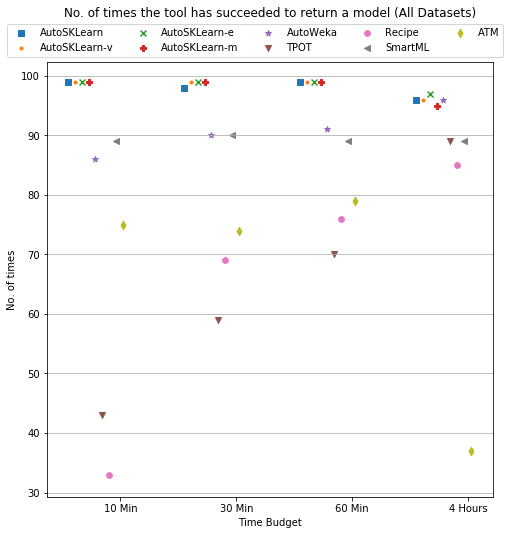

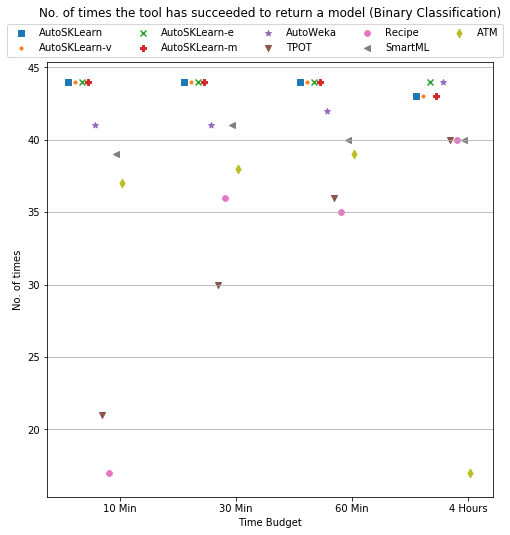

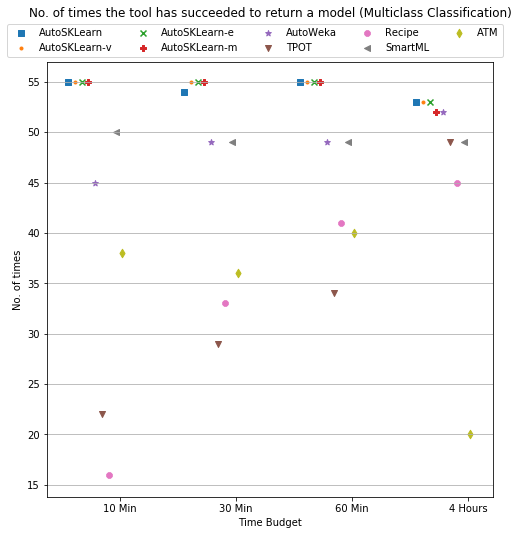

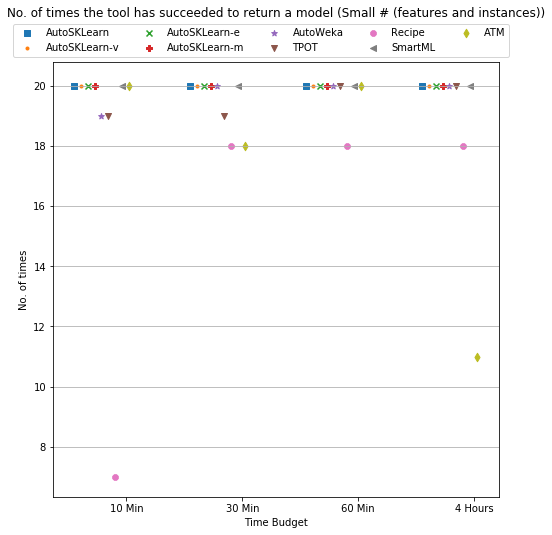

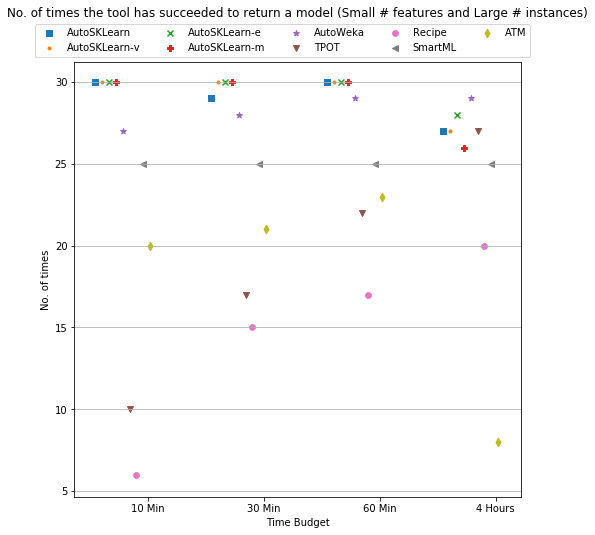

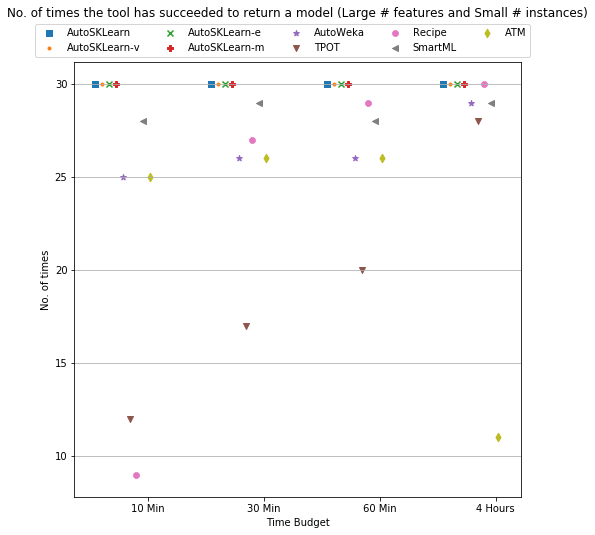

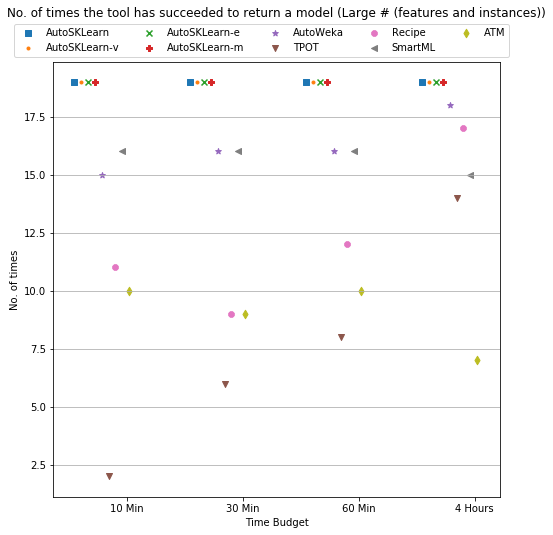

In [2]:
sheet_path = r'C:\Users\HassanEldeeb\Documents\GitHub\AutoMLBenchmarking\Complete_Sheet.xlsx'
result = pd.read_excel(sheet_path, null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
              sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours', 'meta-features'])
experiment_time = ['10 Min', '30 Min', '60 Min', '4 Hours']
frameworks = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m','AutoWeka', 'TPOT', 'Recipe', 'SmartML', 'ATM']
#colors        = ['seagreen', 'red', 'orchid', 'orange']
gray_colors = itertools.cycle(['silver', 'gainsboro', 'gray', 'lightgrey', 'darkgray'])

for (case, condition) in zip(['All Datasets', 'Binary Classification', 'Multiclass Classification', 'Small # (features and instances)',
             'Small # features and Large # instances', 'Large # features and Small # instances',
             'Large # (features and instances)'],
         [result['meta-features'].nr_classes > -1, result['meta-features'].nr_classes == 2,
         result['meta-features'].nr_classes >2,
         (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median()),
         (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median())
         ]):
    result = pd.read_excel(sheet_path, null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
              sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours', 'meta-features'])
    for tt in ['10 Min', '30 Min', '60 Min', '4 Hours']:
        result[tt] = result[tt][condition]
    autoSKLearn = [np.sum(result['10 Min'].sklearn_accuracy_mean> 0),
                np.sum(result['30 Min'].sklearn_accuracy_mean> 0),
                np.sum(result['60 Min'].sklearn_accuracy_mean> 0),
                np.sum(result['4 Hours'].sklearn_accuracy_mean> 0)]
    autoSKLearn_v = [np.sum(result['10 Min'].sklearn_v_accuracy_mean> 0),
                np.sum(result['30 Min'].sklearn_v_accuracy_mean> 0),
                np.sum(result['60 Min'].sklearn_v_accuracy_mean> 0),
                np.sum(result['4 Hours'].sklearn_v_accuracy_mean> 0)]
    autoSKLearn_e = [np.sum(result['10 Min'].sklearn_e_accuracy_mean> 0),
                np.sum(result['30 Min'].sklearn_e_accuracy_mean> 0),
                np.sum(result['60 Min'].sklearn_e_accuracy_mean> 0),
                np.sum(result['4 Hours'].sklearn_e_accuracy_mean> 0)]
    autoSKLearn_m = [np.sum(result['10 Min'].sklearn_m_accuracy_mean> 0),
                np.sum(result['30 Min'].sklearn_m_accuracy_mean> 0),
                np.sum(result['60 Min'].sklearn_m_accuracy_mean> 0),
                np.sum(result['4 Hours'].sklearn_m_accuracy_mean> 0)]
    autoweka = [np.sum(result['10 Min'].autoweka_accuracy_mean> 0),
                np.sum(result['30 Min'].autoweka_accuracy_mean> 0),
                np.sum(result['60 Min'].autoweka_accuracy_mean> 0),
                np.sum(result['4 Hours'].autoweka_accuracy_mean> 0)]
    TPOT = [np.sum(result['10 Min'].tpot_accuracy_mean> 0),
                np.sum(result['30 Min'].tpot_accuracy_mean> 0),
                np.sum(result['60 Min'].tpot_accuracy_mean> 0),
                np.sum(result['4 Hours'].tpot_accuracy_mean> 0)]
    Recipe = [np.sum(result['10 Min'].recipe_test_acc> 0),
                np.sum(result['30 Min'].recipe_test_acc> 0),
                np.sum(result['60 Min'].recipe_test_acc> 0),
                np.sum(result['4 Hours'].recipe_test_acc> 0)]
    SmartML = [np.sum(result['10 Min'].smartml_valid_acc> 0),
                np.sum(result['30 Min'].smartml_valid_acc> 0),
                np.sum(result['60 Min'].smartml_valid_acc> 0),
                np.sum(result['4 Hours'].smartml_valid_acc> 0)]
    atm = [np.sum(result['10 Min'].atm_acc> 0),
                np.sum(result['30 Min'].atm_acc> 0),
                np.sum(result['60 Min'].atm_acc> 0),
                np.sum(result['4 Hours'].atm_acc> 0)]
    numerical = [autoSKLearn,
                 autoSKLearn_v,
                 autoSKLearn_e,
                 autoSKLearn_m,
                 autoweka,
                 TPOT,
                 Recipe,
                 SmartML,
                 atm]
    #rint(np.sum(result['10 Min'].autoweka_accuracy_mean > 0))
    #rint((result['10 Min'].autoweka_accuracy_mean > 0).to_string())
    number_groups = len(frameworks) 
    markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'd'])
    bin_width = 1.0/(len(frameworks)+8)
    fig, ax = plt.subplots(figsize=(8,8))
    for i in range(number_groups):
        ax.scatter(x=np.arange(len(experiment_time)) + i*bin_width, 
               y=numerical[i],
               #color= next(gray_colors),
               marker =next(markers))
    ax.set_xticks(np.arange(len(experiment_time)) + number_groups/(2*(number_groups+1)))
    # number_groups/(2*(number_groups+1)): offset of xticklabel
    ax.set_xticklabels(experiment_time)
    l = ax.legend(frameworks[0:len(frameworks)], ncol=1+len(frameworks)//2, bbox_to_anchor=(-0.1, 1), loc='lower left')
    ax.set(xlabel='Time Budget', ylabel='No. of times')
    ax.yaxis.grid() # horizontal lines
    plt.title(label = 'No. of times the tool has succeeded to return a model (' + case + ')', pad = 45)
    plt.show()

# How many times each tool has achieved the best performance?
# And what is the effect of time budget increasing over each tool?
# Does the impact of Meta-Learning, Ensembling, Genetic Based Optimization and Bayesian Based Optimization increase or decrease by time budget increasing?

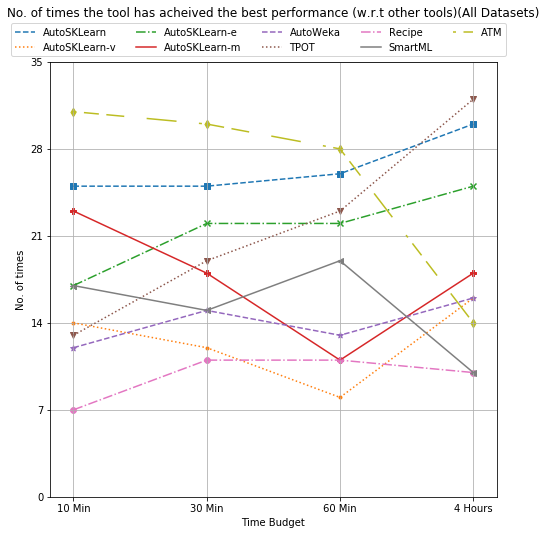

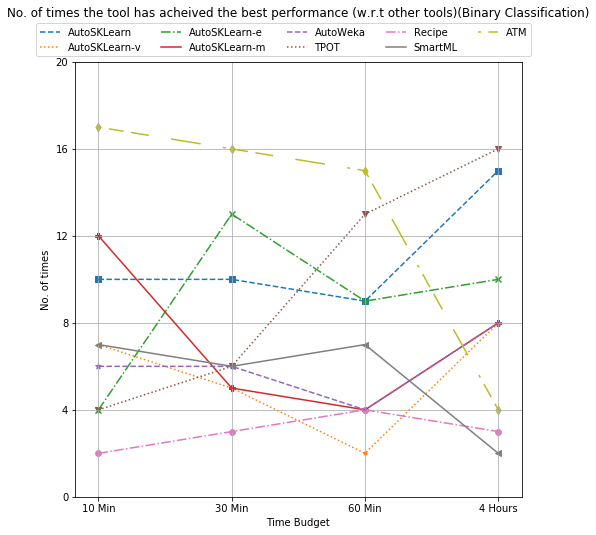

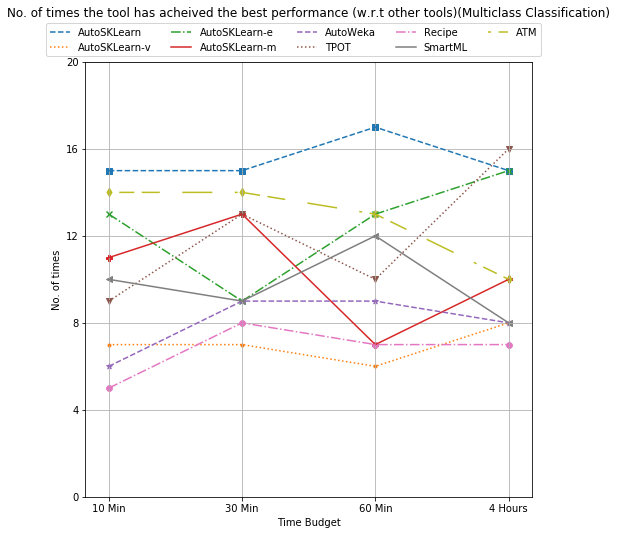

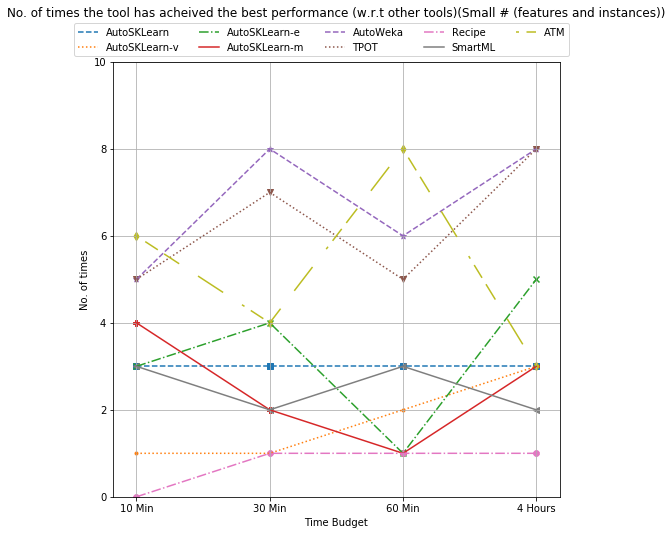

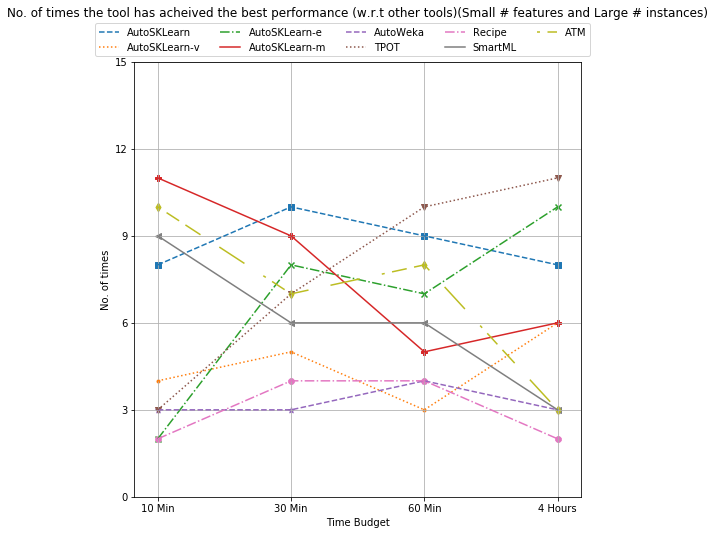

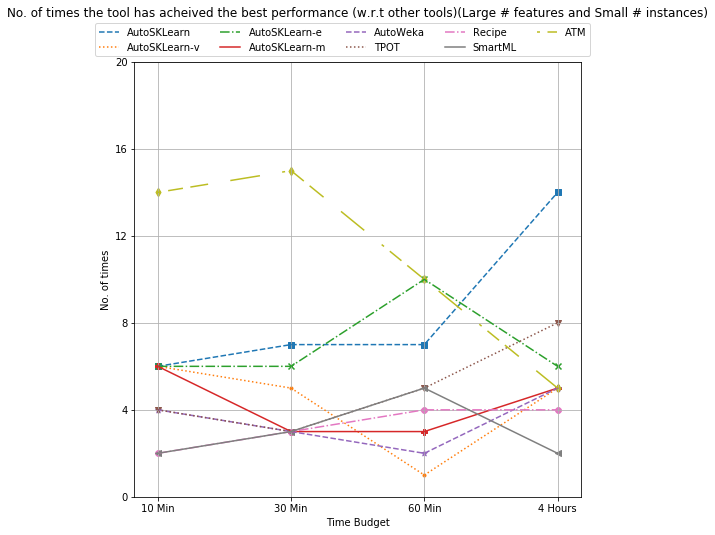

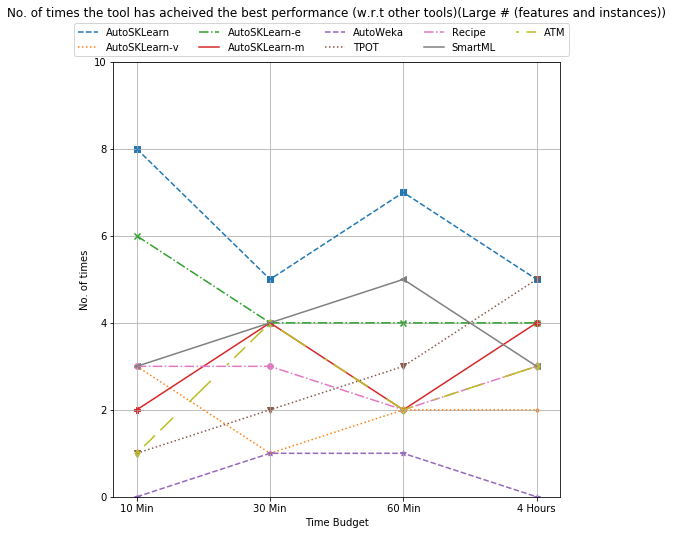

In [3]:
labels = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m','AutoWeka', 'TPOT', 'Recipe', 'SmartML', 'ATM']
types= ['sklearn_accuracy_mean', 'sklearn_v_accuracy_mean', 'sklearn_e_accuracy_mean', 'sklearn_m_accuracy_mean',
            'autoweka_accuracy_mean', 'tpot_accuracy_mean', 'recipe_test_acc', 'smartml_valid_acc', 'atm_acc']
for (case, condition) in zip(['All Datasets', 'Binary Classification', 'Multiclass Classification', 'Small # (features and instances)',
             'Small # features and Large # instances', 'Large # features and Small # instances',
             'Large # (features and instances)'],
         [result['meta-features'].nr_classes > -1, result['meta-features'].nr_classes == 2,
         result['meta-features'].nr_classes >2,
         (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median()),
         (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median())
         ]):
    result = pd.read_excel(sheet_path, null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
              sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours', 'meta-features'])
    for tt in ['10 Min', '30 Min', '60 Min', '4 Hours']:
        result[tt] = result[tt][condition]

    T=[]
    
    
    for t in experiment_time:
        total = [0,0,0,0,0,0,0,0,0]
        for i in result[t][types[0]].index:
            #my_list = [result['30 Min'].smartml_valid_acc[i],result['30 Min'].sklearn_accuracy_mean[i]]
            my_list= [result[t][x][i] for x in types]
            #print(my_list)
            my_list = [0 if np.isnan(x) else x for x in my_list]
            max_value = max(my_list)
            #print(max_value,my_list)
            indices = [i for i, x in enumerate(my_list) if max_value-x<0.00001]
            for ind in indices:
                total[ind]+=1
        T.append(list(total))
    #print(T)

    t = experiment_time
    s=[]
    for u in range(len(types)):
        s.append(list([T[i][u]for i in range(len(experiment_time))]))
    y_lim = (1 + max(map(max, s))//5) * 5
    fig, ax = plt.subplots(figsize=(8,8))
    #ax.plot(t, s[0],linestyle='-',label=labels[0])
    style = ['--', ':', '-.', '-', '--', ':', '-.', '-']
    markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'd'])
    for i in range(len(types)-1):
        ax.scatter(x=np.arange(len(experiment_time)), 
               y=s[i],
               #color= next(gray_colors),
               marker =next(markers))
        ax.plot(t, s[i],linestyle=style[i],label=labels[i])

    line1, = ax.plot(t, s[len(types)-1],linestyle='-',label=labels[len(types)-1])
    line1.set_dashes([2, 5, 10, 5, 12, 15, 20, 15])
    ax.scatter(x=np.arange(len(experiment_time)), 
               y=s[len(types)-1],
               #color= next(gray_colors),
               marker =next(markers))
    ax.set(xlabel='Time Budget', ylabel='No. of times')
    ax.set_yticks(np.arange(0,5+y_lim, y_lim//5))
    ax.grid()
    #plt.xlim([-3, 3])
    plt.ylim([0, y_lim])
    plt.legend(loc='upper left', labels=labels, ncol=5, bbox_to_anchor=(-0.1, 1.1))
    plt.title(label='No. of times the tool has acheived the best performance (w.r.t other tools)(' + case + ')', pad=45)
    plt.show()

# How many times each tool has achieved the worst performance?

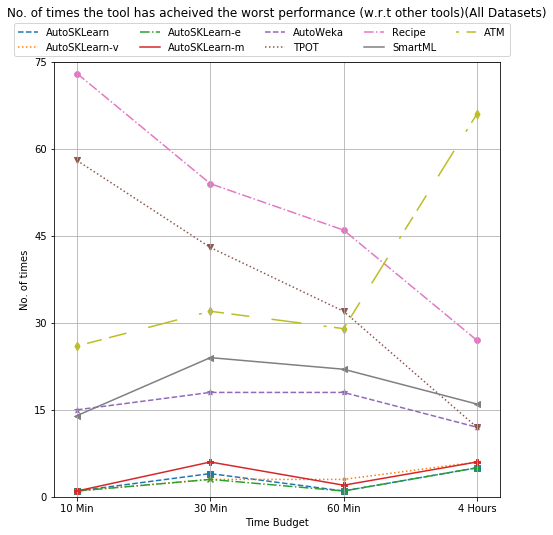

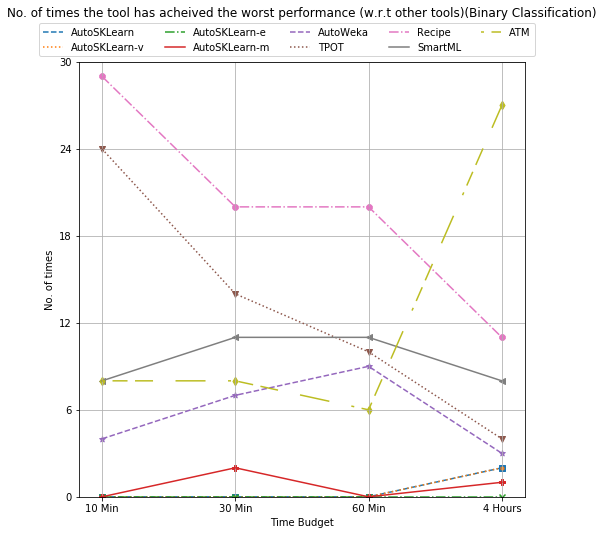

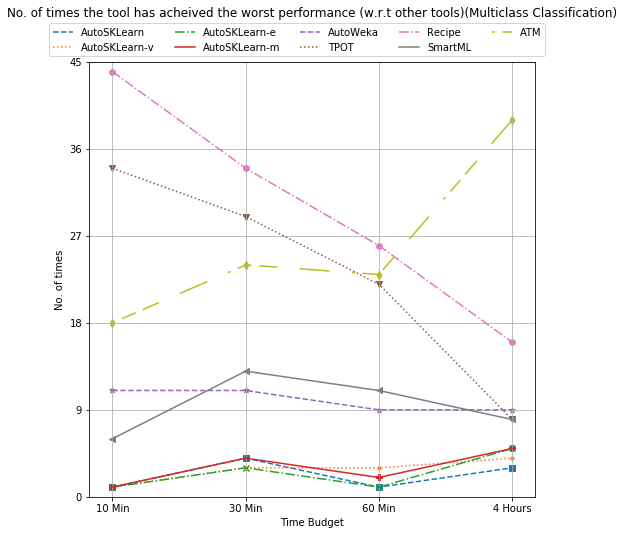

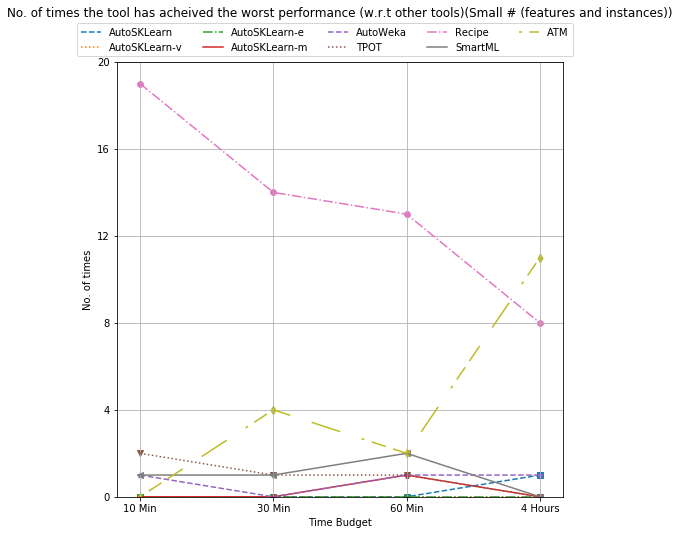

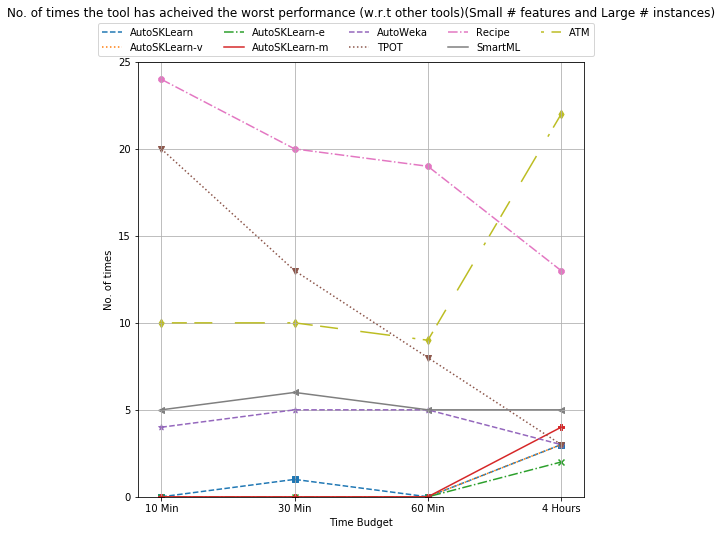

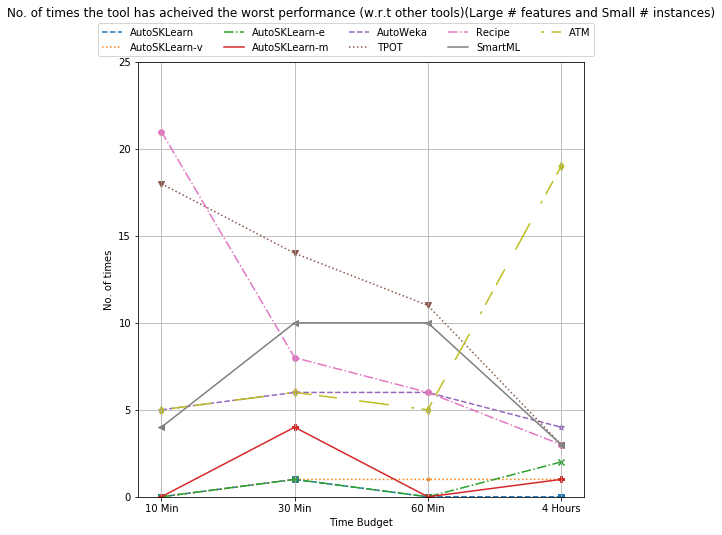

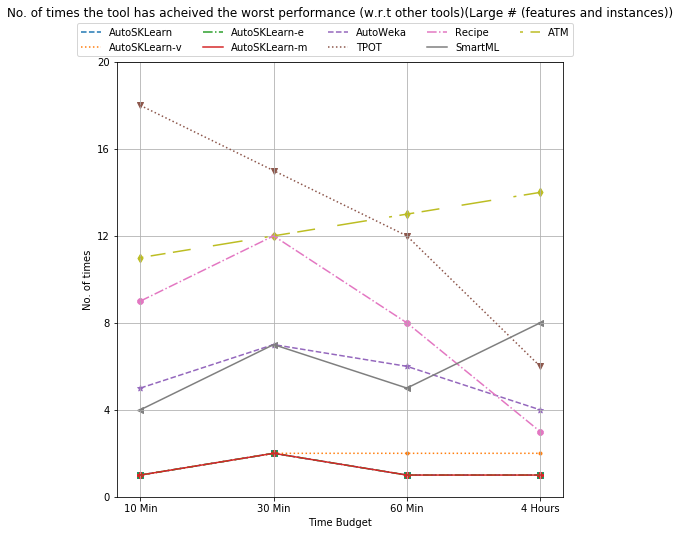

In [4]:
types= ['sklearn_accuracy_mean', 'sklearn_v_accuracy_mean', 'sklearn_e_accuracy_mean', 'sklearn_m_accuracy_mean',
            'autoweka_accuracy_mean', 'tpot_accuracy_mean', 'recipe_test_acc', 'smartml_valid_acc', 'atm_acc']
for (case, condition) in zip(['All Datasets', 'Binary Classification', 'Multiclass Classification', 'Small # (features and instances)',
             'Small # features and Large # instances', 'Large # features and Small # instances',
             'Large # (features and instances)'],
         [result['meta-features'].nr_classes > -1, result['meta-features'].nr_classes == 2,
         result['meta-features'].nr_classes >2,
         (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median()),
         (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median())
         ]):
    result = pd.read_excel(sheet_path, null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
              sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours', 'meta-features'])
    for tt in ['10 Min', '30 Min', '60 Min', '4 Hours']:
        result[tt] = result[tt][condition]


    T=[]
    for t in experiment_time:
        total = [0,0,0,0,0,0,0,0,0]
        for i in result[t][types[0]].index:
            #my_list = [result['30 Min'].smartml_valid_acc[i],result['30 Min'].sklearn_accuracy_mean[i]]
            my_list= [result[t][x][i] for x in types]
            #print(my_list)
            my_list = [0 if np.isnan(x) else x for x in my_list]
            min_value = min(my_list)
            #print(max_value,my_list)
            indices = [i for i, x in enumerate(my_list) if x-min_value<0.00001]
            for ind in indices:
                total[ind]+=1
        T.append(list(total))
    #print(T)

    t = experiment_time
    s=[]
    for u in range(len(types)):
        s.append(list([T[i][u]for i in range(len(experiment_time))]))
    #print(s)
    y_lim = (1 + max(map(max, s))//5) * 5
    fig, ax = plt.subplots(figsize=(8,8))
    #ax.plot(t, s[0],linestyle='-',label=labels[0])
    style = ['--', ':', '-.', '-', '--', ':', '-.', '-']
    markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'd'])
    for i in range(len(types)-1):
        ax.scatter(x=np.arange(len(experiment_time)), 
               y=s[i],
               #color= next(gray_colors),
               marker =next(markers))
        ax.plot(t, s[i],linestyle=style[i],label=labels[i])

    line1, = ax.plot(t, s[len(types)-1],linestyle='-',label=labels[len(types)-1])
    line1.set_dashes([2, 5, 10, 5, 12, 15, 20, 15])
    ax.scatter(x=np.arange(len(experiment_time)), 
               y=s[len(types)-1],
               #color= next(gray_colors),
               marker =next(markers))
    ax.set(xlabel='Time Budget', ylabel='No. of times')
    plt.title(label='No. of times the tool has acheived the worst performance (w.r.t other tools)('+ case + ')', pad=45)
    ax.grid()
    #plt.xlim([-3, 3])
    ax.set_yticks(np.arange(0,5+y_lim, y_lim//5))
    plt.ylim([0, y_lim])
    plt.legend(loc='upper left', ncol=5,labels=labels, bbox_to_anchor=(-0.1, 1.1))
    plt.show()

# What is the best time budget for each tool ? In each time budget, how many datasets reached the maximum accuracy w.r.t this tool only ?

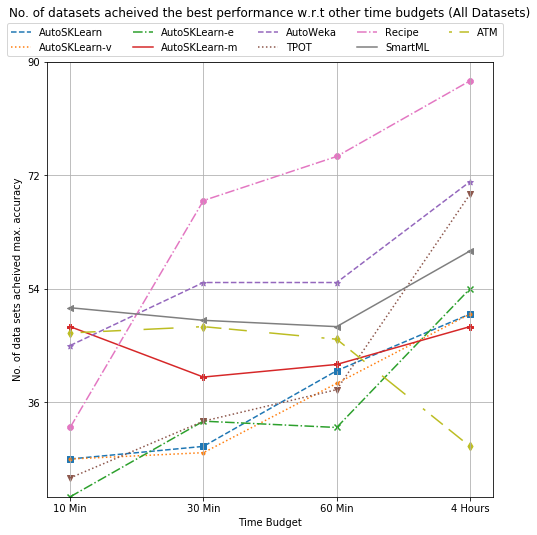

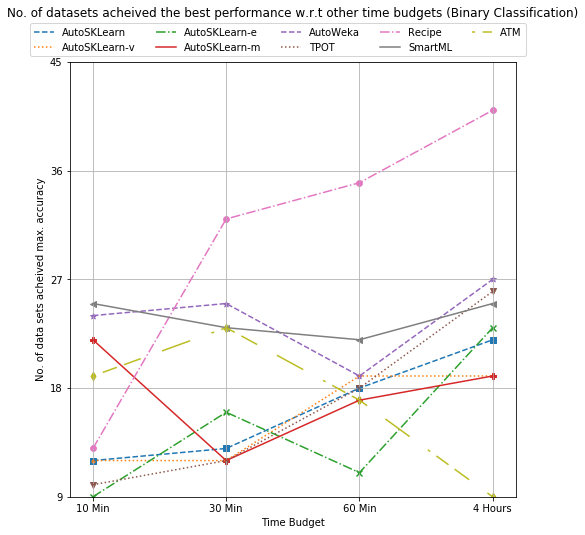

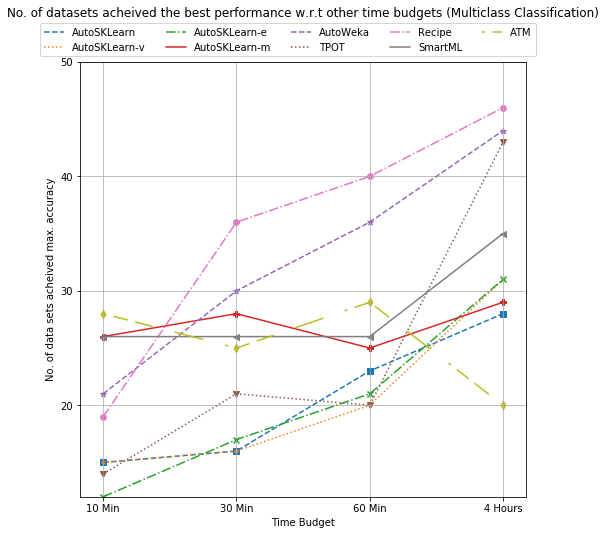

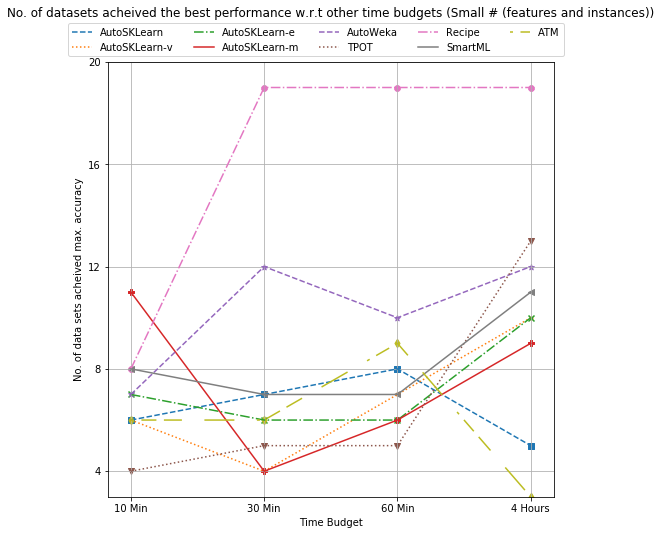

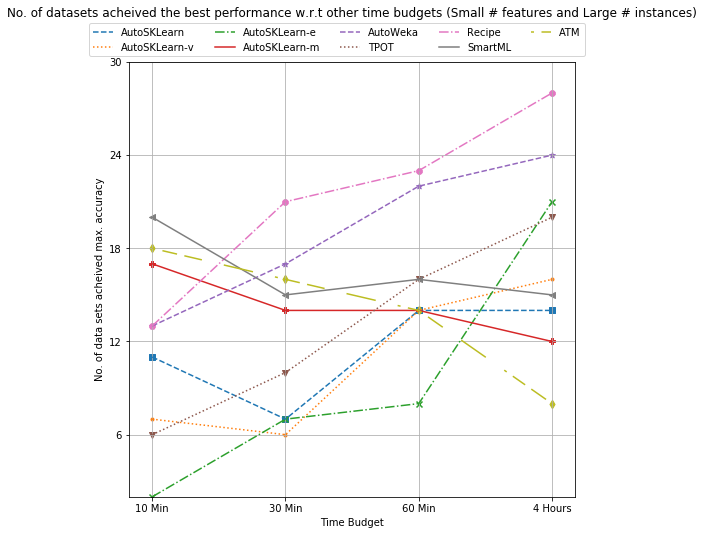

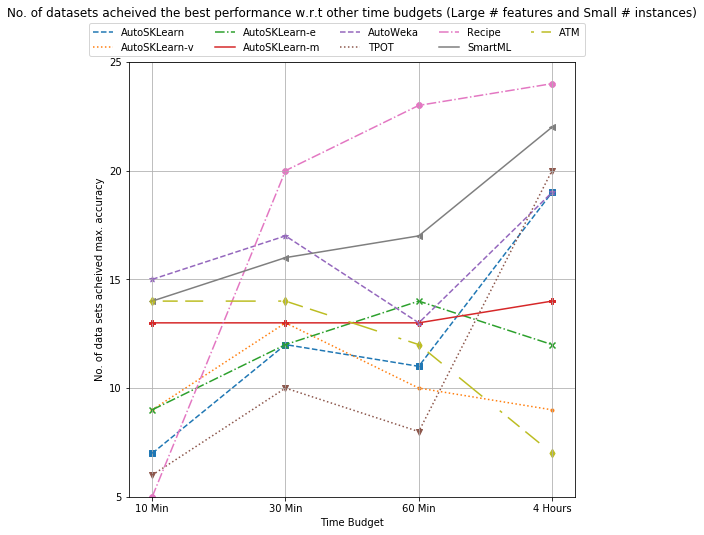

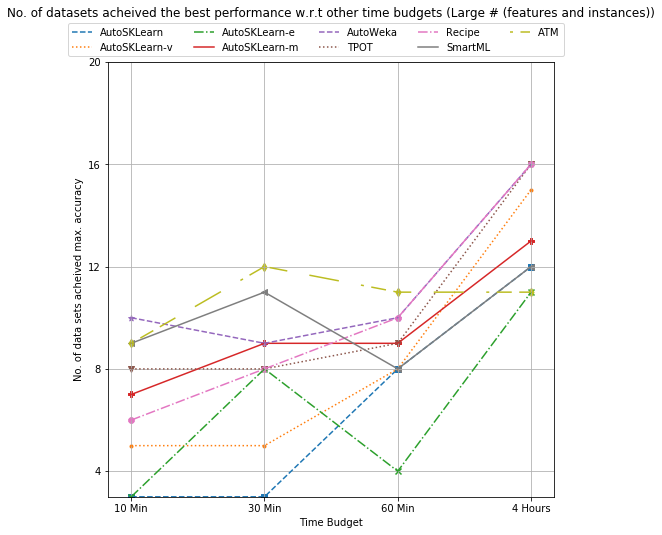

In [5]:
types= ['sklearn_accuracy_mean', 'sklearn_v_accuracy_mean', 'sklearn_e_accuracy_mean', 'sklearn_m_accuracy_mean',
            'autoweka_accuracy_mean', 'tpot_accuracy_mean', 'recipe_test_acc', 'smartml_valid_acc', 'atm_acc']
for (case, condition) in zip(['All Datasets', 'Binary Classification', 'Multiclass Classification', 'Small # (features and instances)',
             'Small # features and Large # instances', 'Large # features and Small # instances',
             'Large # (features and instances)'],
         [result['meta-features'].nr_classes > -1, result['meta-features'].nr_classes == 2,
         result['meta-features'].nr_classes >2,
         (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median()),
         (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median())
         ]):
    result = pd.read_excel(sheet_path, null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
              sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours', 'meta-features'])
    for tt in ['10 Min', '30 Min', '60 Min', '4 Hours']:
        result[tt] = result[tt][condition]


    total = [0,0,0,0]

    T = [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]] 



    for j in range(len(types)):
        for i in result['10 Min'][types[0]].index:
            #my_list = [result['30 Min'].smartml_valid_acc[i],result['30 Min'].sklearn_accuracy_mean[i]]
            my_list= [result[t][types[j]][i] for t in experiment_time]
            #print(my_list)
            my_list = [0 if np.isnan(t) else t for t in my_list]
            max_value = max(my_list)
            #print(max_value,my_list)
            for ind in range(4):
                if max_value - my_list[ind] <0.00001:
                    T[j][ind] +=1
    #print(T)
    y_lim = (1 + max(map(max, T))//5) * 5
    t = experiment_time
    fig, ax = plt.subplots(figsize=(8,8))
    #ax.plot(t, s[0],linestyle='-',label=labels[0])
    style = ['--', ':', '-.', '-', '--', ':', '-.', '-']
    markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'd'])
    for i in range(len(types)-1):
        ax.plot(t, T[i],linestyle=style[i],label=labels[i])
        ax.scatter(x=np.arange(len(experiment_time)), 
               y=T[i],
               #color= next(gray_colors),
               marker =next(markers))

    line1, = ax.plot(t, T[len(types)-1],linestyle='-',label=labels[len(types)-1])
    line1.set_dashes([2, 5, 10, 5, 12, 15, 20, 15])
    ax.scatter(x=np.arange(len(experiment_time)), 
               y=T[len(types)-1],
               #color= next(gray_colors),
               marker =next(markers))
    ax.set(xlabel='Time Budget', ylabel='No. of data sets acheived max. accuracy')
    plt.title(label='No. of datasets acheived the best performance w.r.t other time budgets (' + case + ')', pad=45)
    ax.grid()
    #plt.xlim([-3, 3])
    ax.set_yticks(np.arange(0,5+y_lim, y_lim//5))
    plt.ylim([min(map(min, T)), y_lim])
    plt.legend(loc='upper left', ncol=5,labels=labels, bbox_to_anchor=(-0.1, 1.1))
    plt.show()

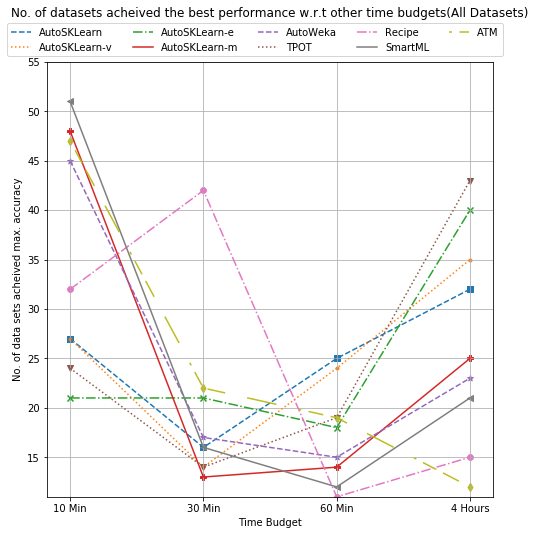

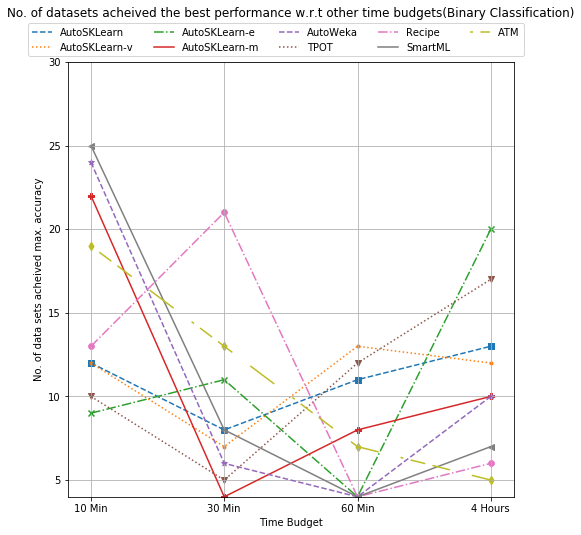

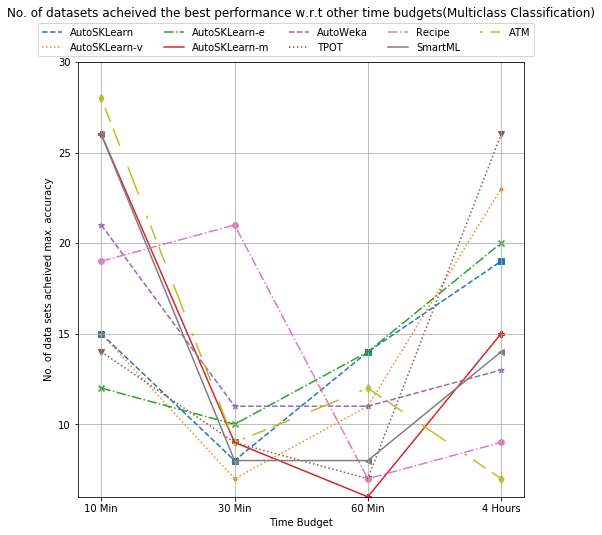

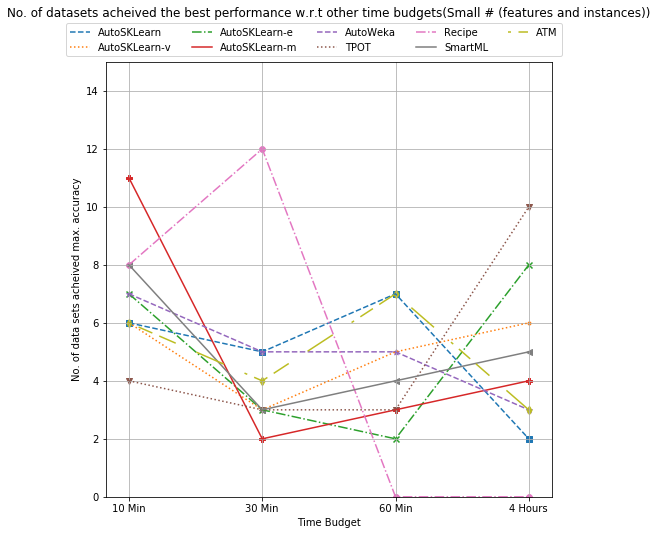

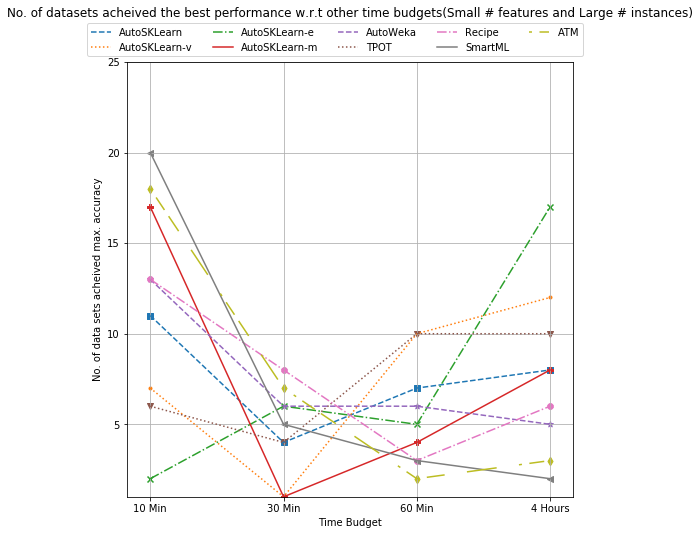

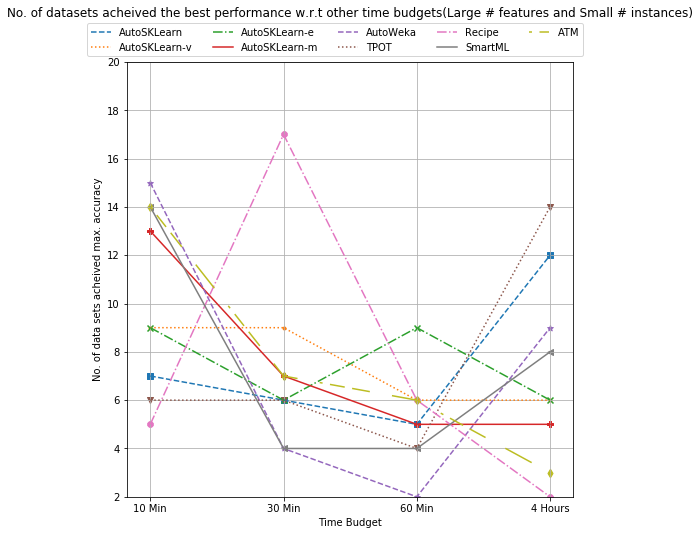

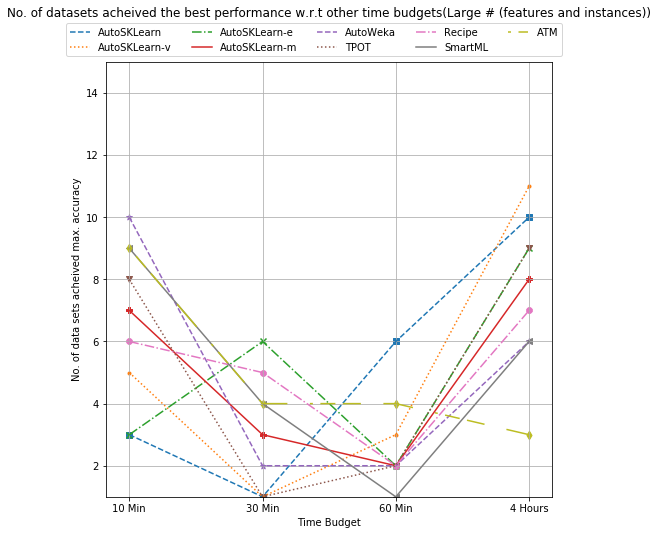

In [6]:
types= ['sklearn_accuracy_mean', 'sklearn_v_accuracy_mean', 'sklearn_e_accuracy_mean', 'sklearn_m_accuracy_mean',
            'autoweka_accuracy_mean', 'tpot_accuracy_mean', 'recipe_test_acc', 'smartml_valid_acc', 'atm_acc']
for (case, condition) in zip(['All Datasets', 'Binary Classification', 'Multiclass Classification', 'Small # (features and instances)',
             'Small # features and Large # instances', 'Large # features and Small # instances',
             'Large # (features and instances)'],
         [result['meta-features'].nr_classes > -1, result['meta-features'].nr_classes == 2,
         result['meta-features'].nr_classes >2,
         (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features < result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median()),
         (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances < result['meta-features'].nr_instances.median()),
          (result['meta-features'].nr_features > result['meta-features'].nr_features.median()) & (result['meta-features'].nr_instances > result['meta-features'].nr_instances.median())
         ]):
    result = pd.read_excel(sheet_path, null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
              sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours', 'meta-features'])
    for tt in ['10 Min', '30 Min', '60 Min', '4 Hours']:
        result[tt] = result[tt][condition]
        
    total = [0,0,0,0]

    T = [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]] 



    for j in range(len(types)):
        for i in result['10 Min'][types[0]].index:
            #my_list = [result['30 Min'].smartml_valid_acc[i],result['30 Min'].sklearn_accuracy_mean[i]]
            my_list= [result[t][types[j]][i] for t in experiment_time]
            #print(my_list)
            my_list = [0 if np.isnan(t) else t for t in my_list]
            max_value = max(my_list)
            #print(max_value,my_list)
            for ind in range(4):
                if max_value - my_list[ind] <0.00001:
                    T[j][ind] +=1
                    break
    #print(T)
    y_lim = (1 + max(map(max, T))//5) * 5
    t = experiment_time
    fig, ax = plt.subplots(figsize=(8,8))
    #ax.plot(t, s[0],linestyle='-',label=labels[0])
    style = ['--', ':', '-.', '-', '--', ':', '-.', '-']
    markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'd'])
    for i in range(len(types)-1):
        ax.plot(t, T[i],linestyle=style[i],label=labels[i])
        ax.scatter(x=np.arange(len(experiment_time)), 
               y=T[i],
               #color= next(gray_colors),
               marker =next(markers))

    line1, = ax.plot(t, T[len(types)-1],linestyle='-',label=labels[len(types)-1])
    line1.set_dashes([2, 5, 10, 5, 12, 15, 20, 15])
    ax.scatter(x=np.arange(len(experiment_time)), 
               y=T[len(types)-1],
               #color= next(gray_colors),
               marker =next(markers))
    ax.set(xlabel='Time Budget', ylabel='No. of data sets acheived max. accuracy')
    plt.title(label='No. of datasets acheived the best performance w.r.t other time budgets(' + case + ')', pad=45)
    ax.grid()
    #plt.xlim([-3, 3])
    plt.ylim([min(map(min, T)), y_lim])
    plt.legend(loc='upper left', ncol=5, labels=labels, bbox_to_anchor=(-0.1, 1.1))
    plt.show()

# How many times Meta-learning improved the performance and what is the average improvement in AutoSKLearn?

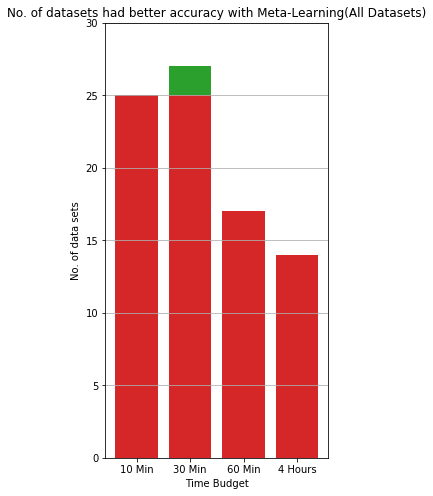

In [7]:
x_label = 'Data Sets'
fig = Figure()
meta = 'sklearn_m_accuracy_mean'
vanilla = 'sklearn_v_accuracy_mean'
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'No. of datasets had better accuracy with Meta-Learning'
fig.compare_acc_bar(meta, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.1])

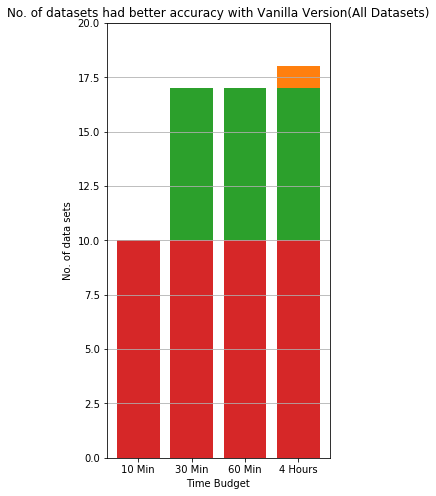

C:\Users\HassanEldeeb\Anaconda3\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


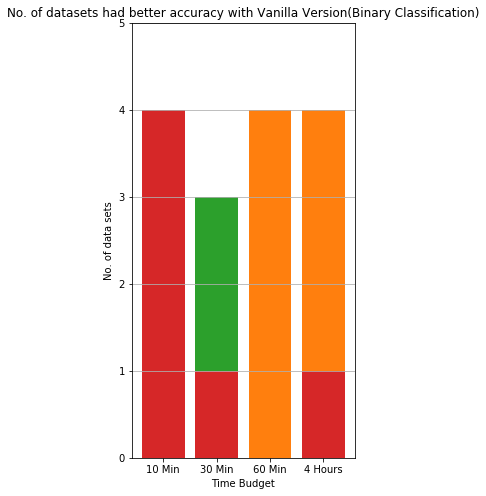

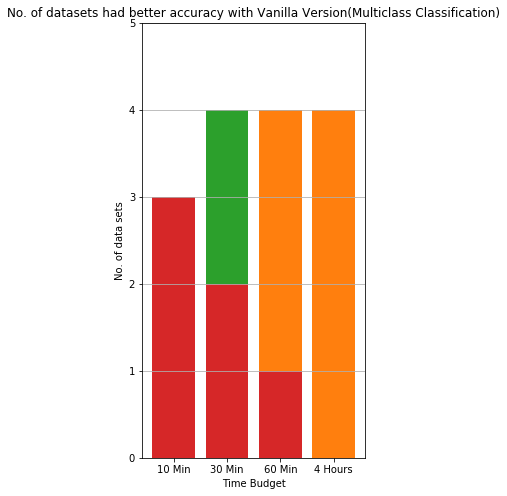

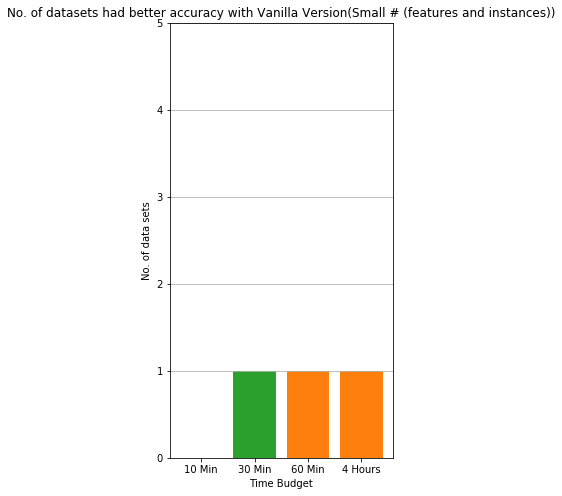

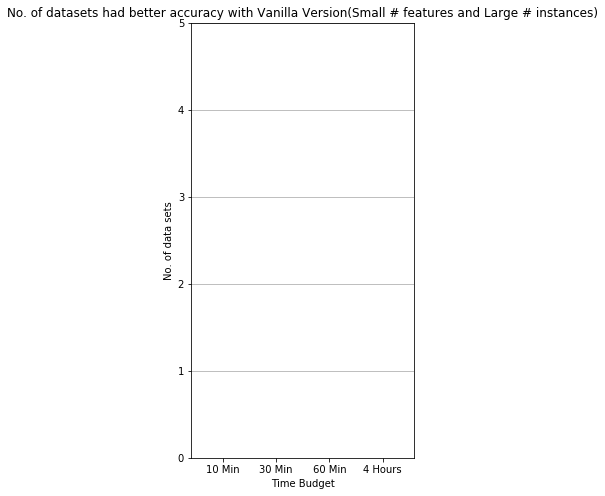

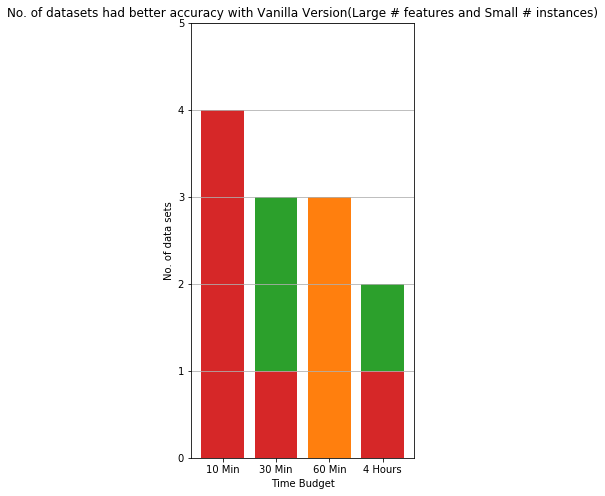

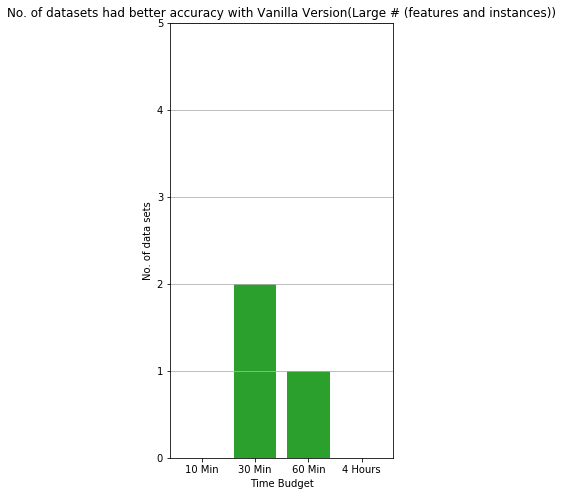

In [8]:
x_label = 'Data Sets'
fig = Figure()
meta = 'sklearn_m_accuracy_mean'
vanilla = 'sklearn_v_accuracy_mean'
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'No. of datasets had better accuracy with Vanilla Version'
fig.compare_acc_bar(vanilla, meta, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.1], divide_data=True)

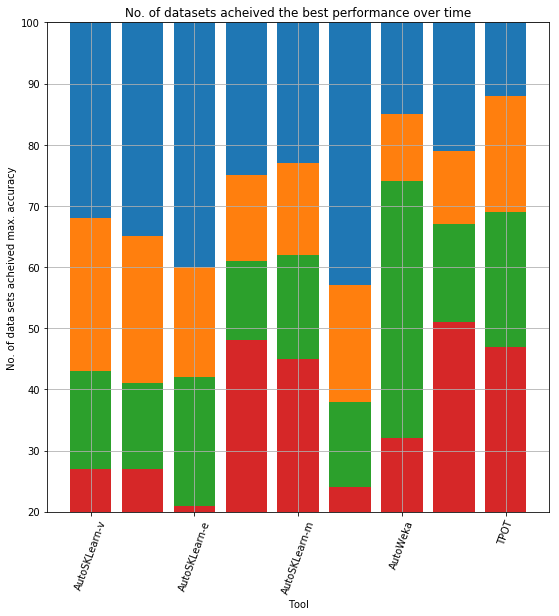

In [9]:

total = [0,0,0,0]

T = [[0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0], [0,0,0,0]] 
result = pd.read_excel(sheet_path, null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
              sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours', 'meta-features'])


for j in range(len(types)):
    for i in range(100):
        #my_list = [result['30 Min'].smartml_valid_acc[i],result['30 Min'].sklearn_accuracy_mean[i]]
        my_list= [result[t][types[j]][i] for t in experiment_time]
        #print(my_list)
        my_list = [0 if np.isnan(t) else t for t in my_list]
        max_value = max(my_list)
        #print(max_value,my_list)
        for ind in range(4):
            if max_value - my_list[ind] <0.00001:
                T[j][ind] +=1
                break
#print(T)

t = experiment_time
fig, ax = plt.subplots(figsize=(9,9))
#ax.plot(t, s[0],linestyle='-',label=labels[0])
style = ['--', ':', '-.', '-', '--', ':', '-.', '-']
markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'd'])

for k in range(len(experiment_time)):
    plt.bar(np.arange(len(types)), [sum(T[j][i] for i in np.arange(len(experiment_time)-k)) for j in np.arange(len(types))])

ax.set(xlabel='Tool', ylabel='No. of data sets acheived max. accuracy',title='No. of datasets acheived the best performance over time')
ax.grid()
#plt.xlim([-3, 3])
plt.ylim([20, 100])
#plt.legend(loc='upper left', ncol=4, bbox_to_anchor=(0, 1))
ax.set_xticklabels(labels)
plt.xticks(rotation=70)
plt.show()

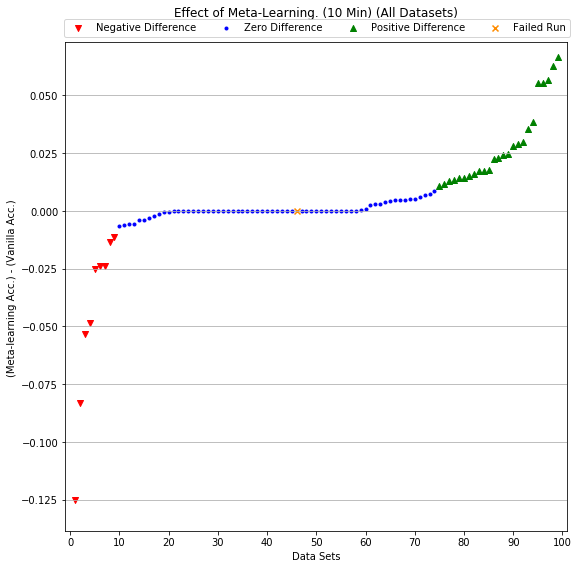

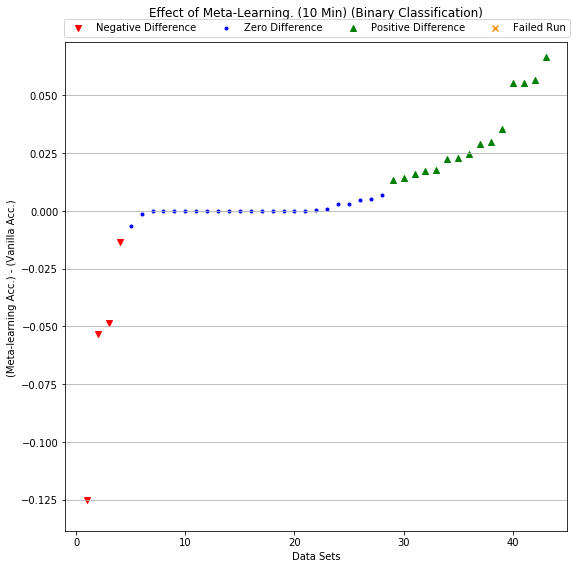

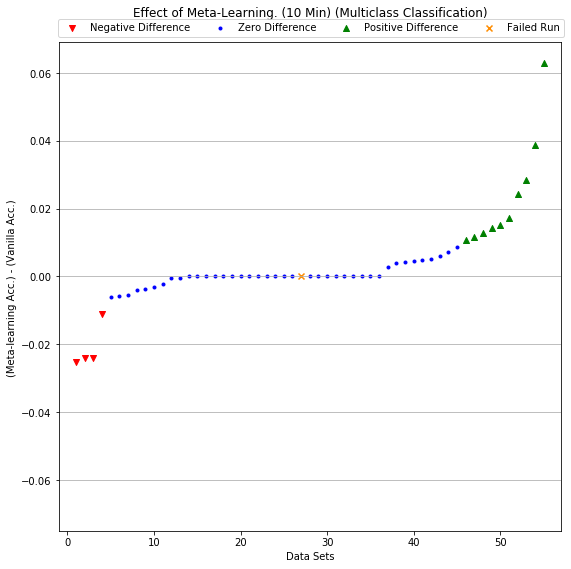

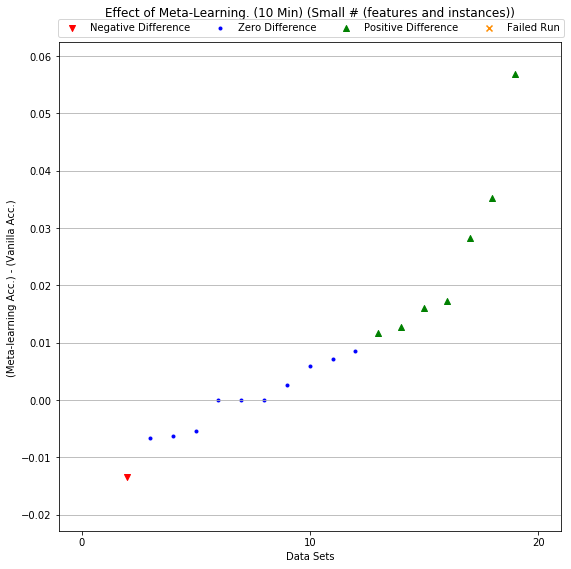

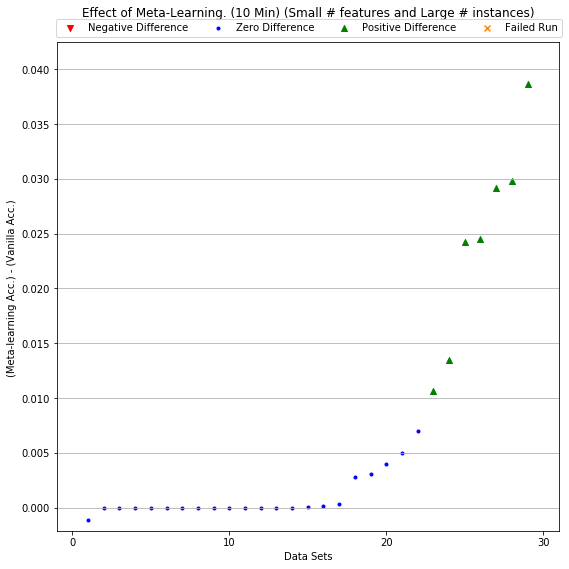

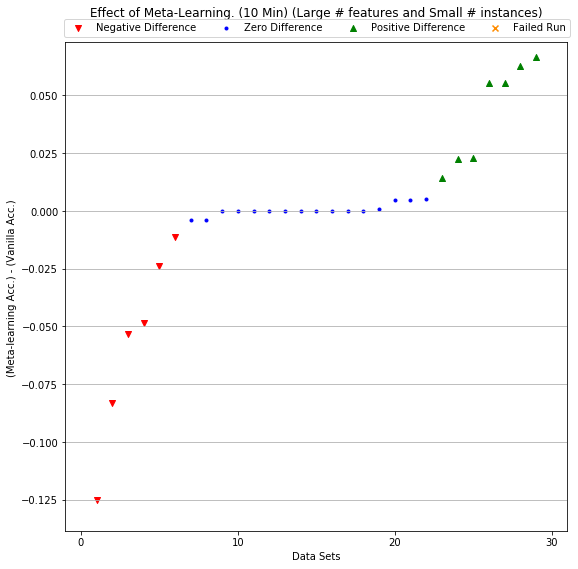

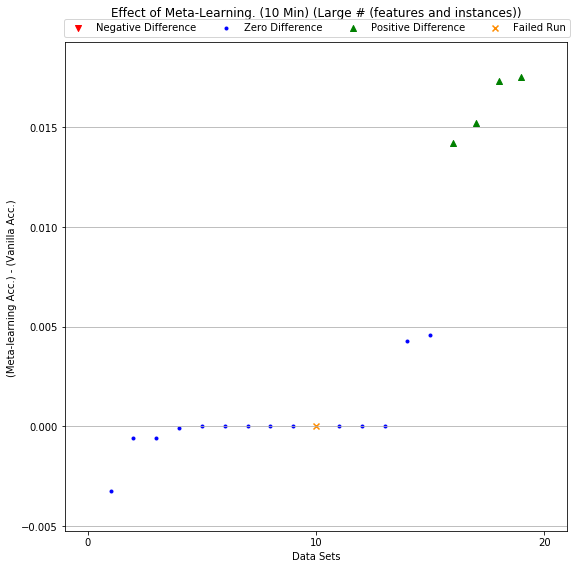

In [10]:
x_label = 'Data Sets'
fig = Figure()
meta = fig.get_sheet()['10 Min'].sklearn_m_accuracy_mean
vanilla = fig.get_sheet()['10 Min'].sklearn_v_accuracy_mean
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'Effect of Meta-Learning. (10 Min)'
fig.compare_acc_scatter(meta, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.1], divide_data=True)

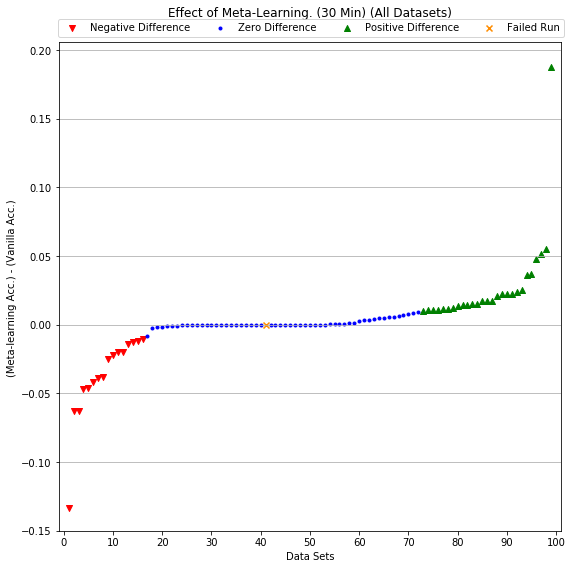

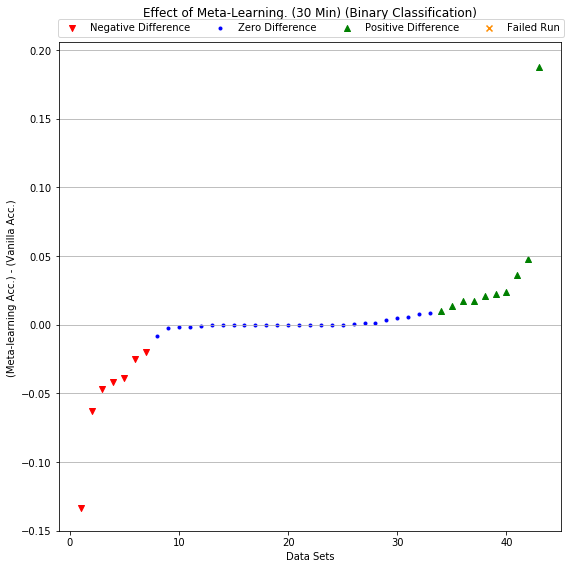

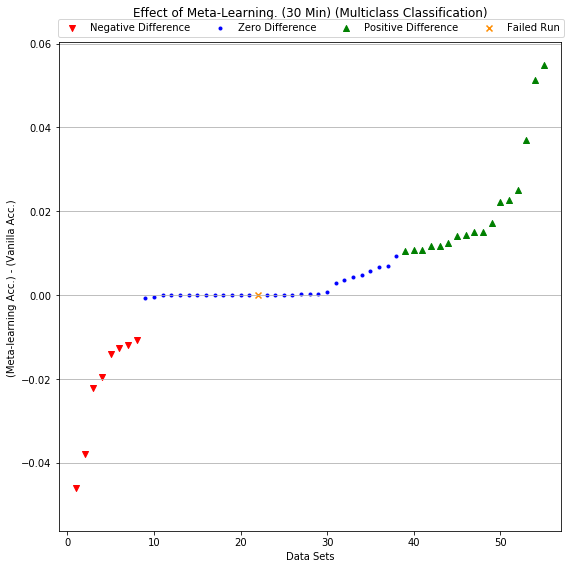

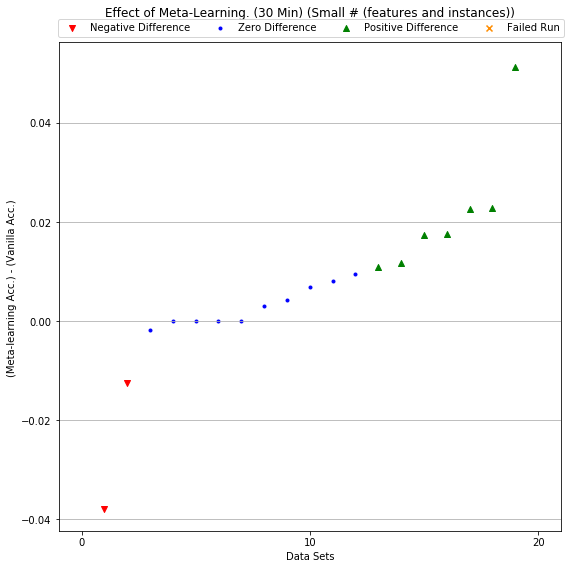

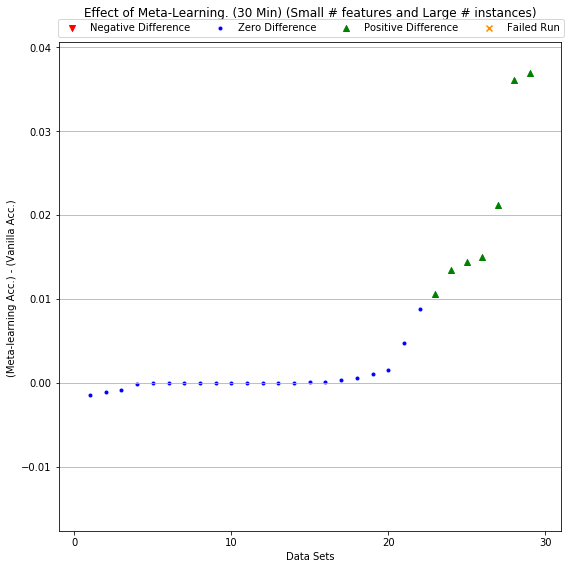

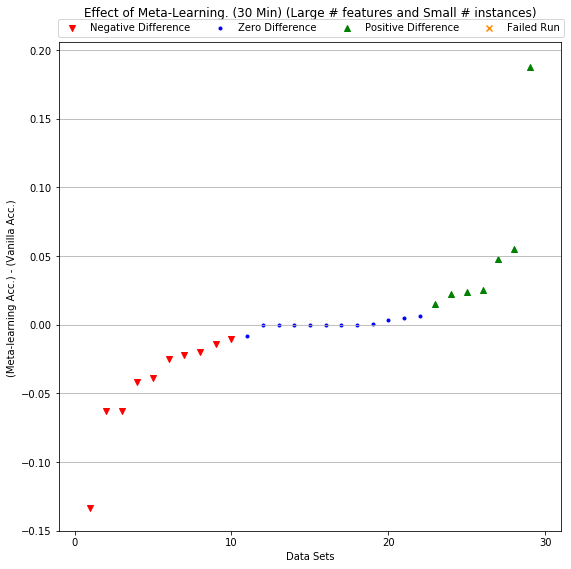

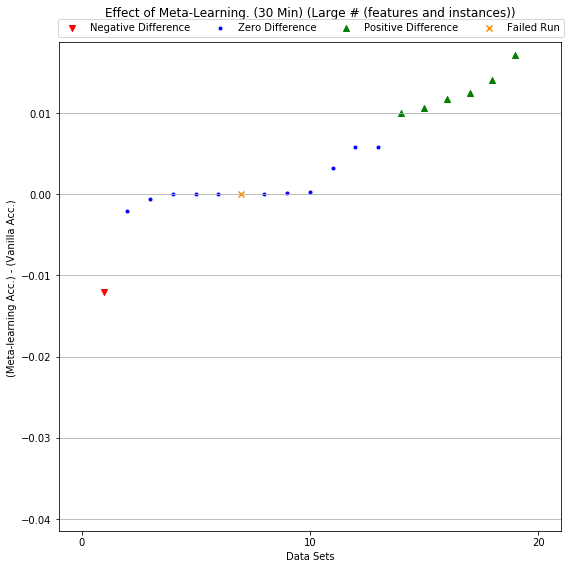

In [40]:
fig = Figure()
meta = fig.get_sheet()['30 Min'].sklearn_m_accuracy_mean
vanilla = fig.get_sheet()['30 Min'].sklearn_v_accuracy_mean
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'Effect of Meta-Learning. (30 Min)'
fig.compare_acc_scatter(meta, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.2], divide_data=True)

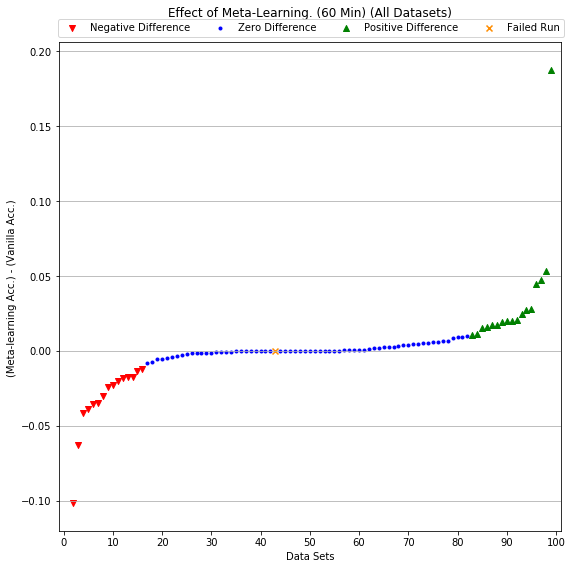

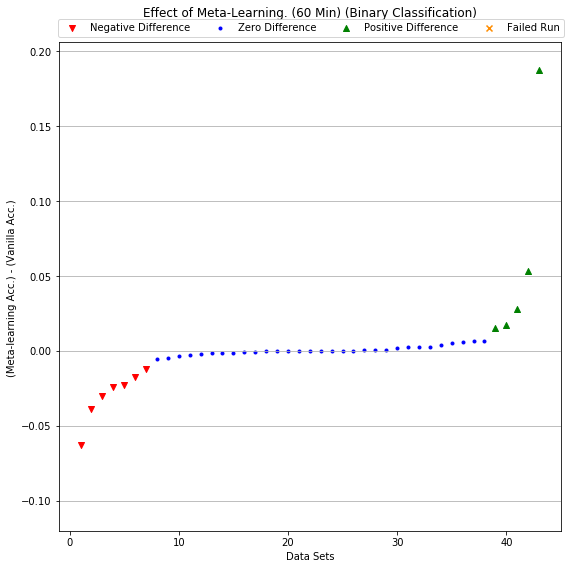

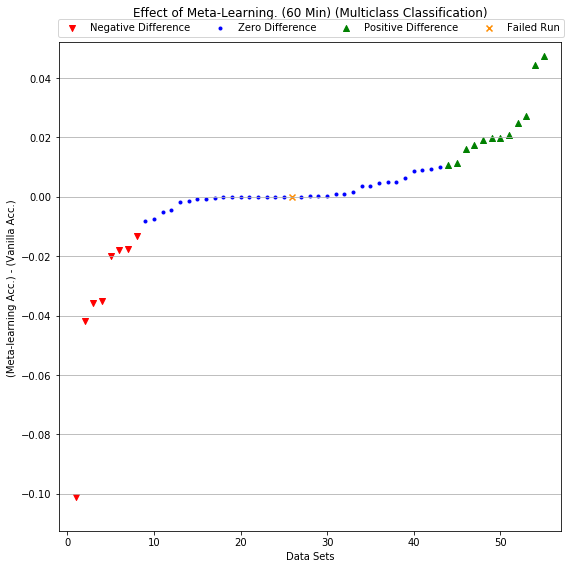

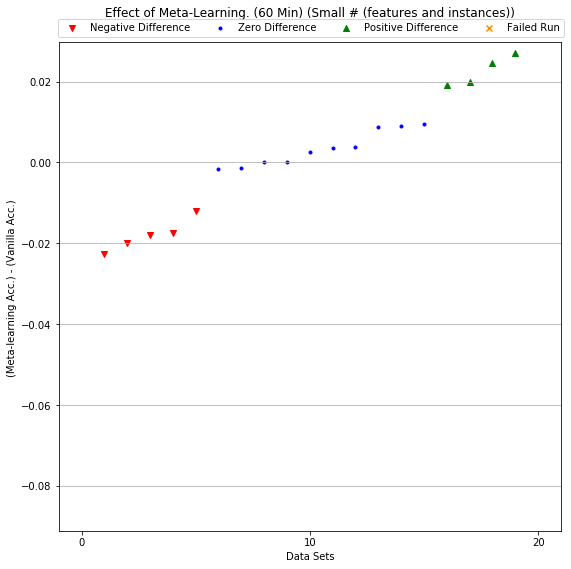

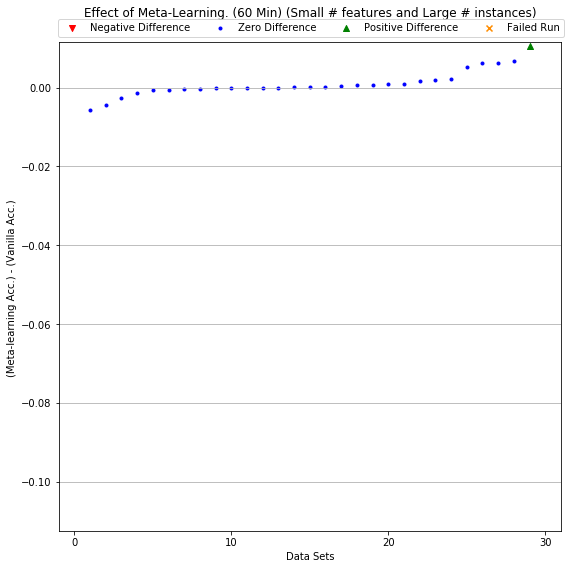

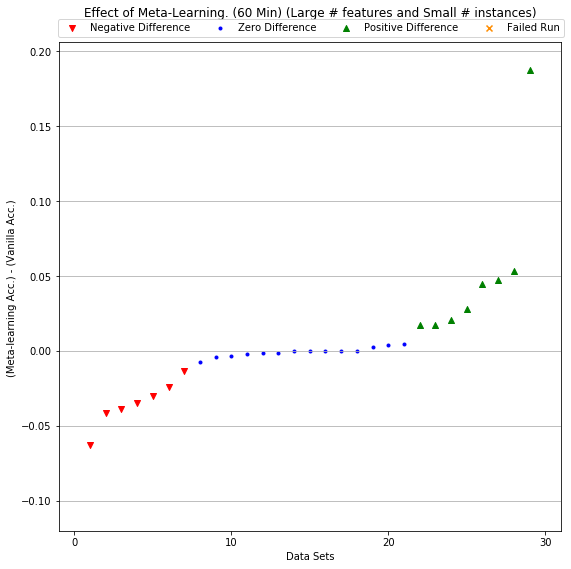

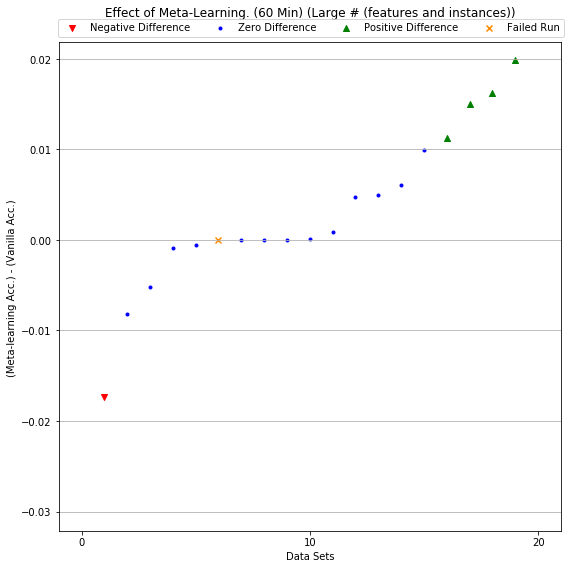

In [12]:
fig = Figure()
meta = fig.get_sheet()['60 Min'].sklearn_m_accuracy_mean
vanilla = fig.get_sheet()['60 Min'].sklearn_v_accuracy_mean
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'Effect of Meta-Learning. (60 Min)'
fig.compare_acc_scatter(meta, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.15, 0.2], divide_data=True)

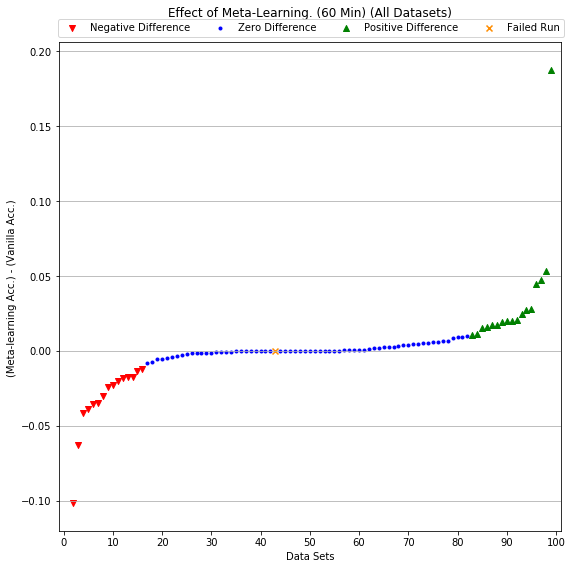

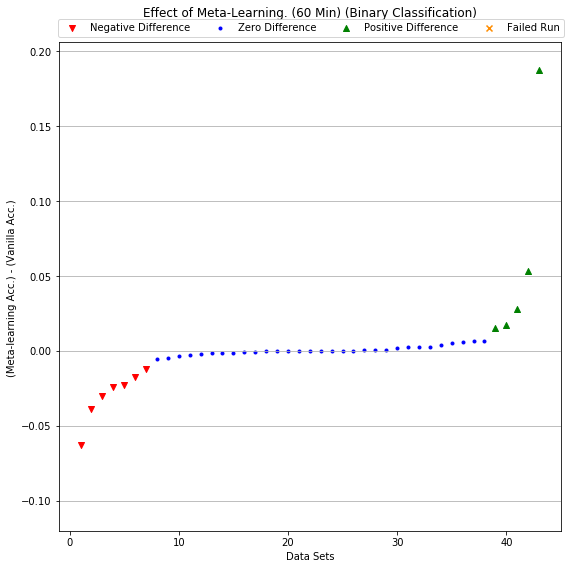

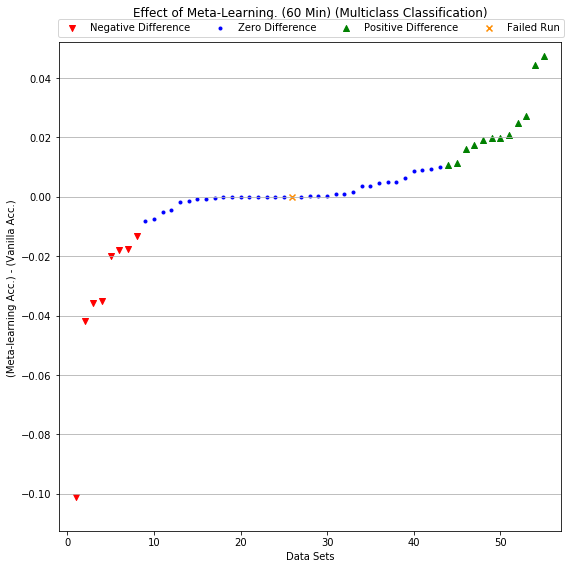

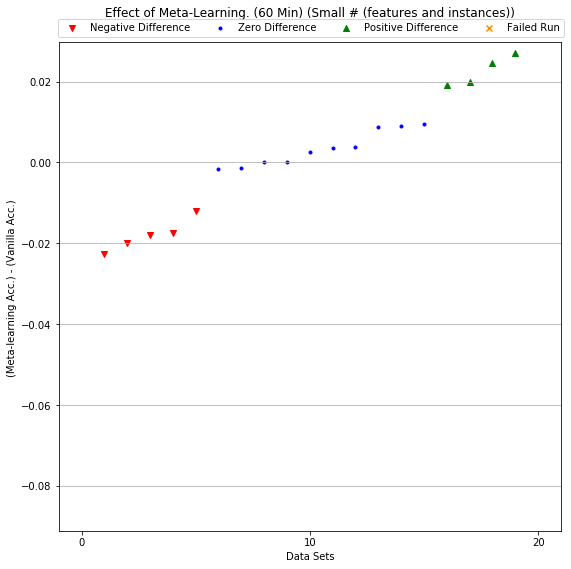

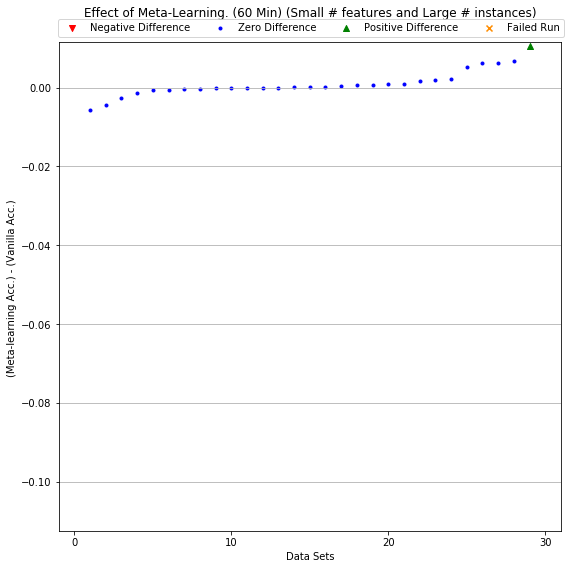

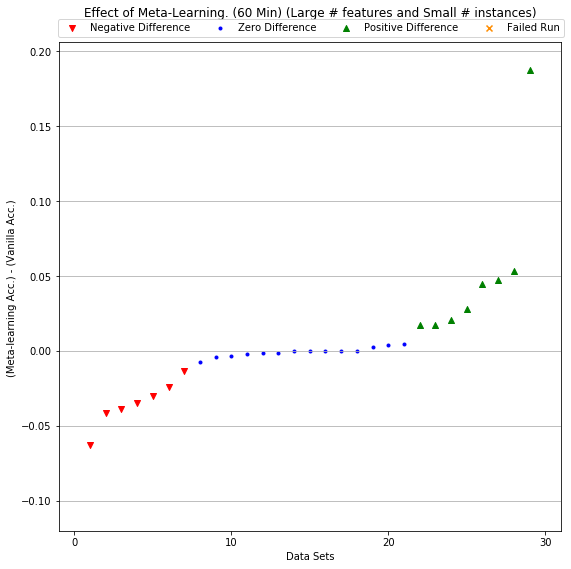

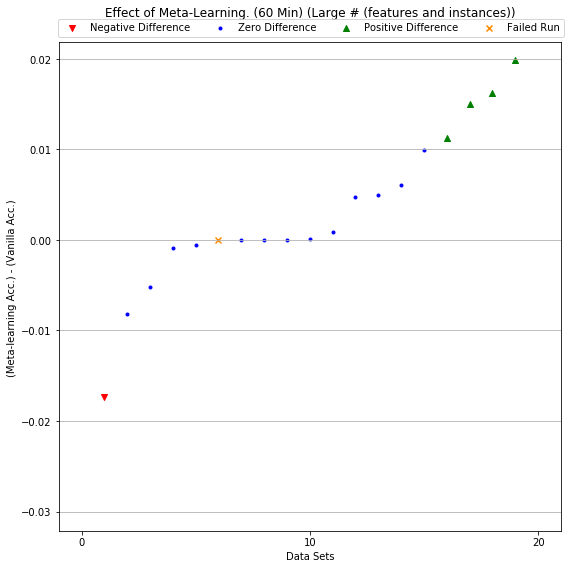

In [13]:
fig = Figure()
meta = fig.get_sheet()['60 Min'].sklearn_m_accuracy_mean
vanilla = fig.get_sheet()['60 Min'].sklearn_v_accuracy_mean
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'Effect of Meta-Learning. (60 Min)'
fig.compare_acc_scatter(meta, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.15, 0.2], divide_data=True)

# How many times Ensembling improved the performance and what is the average improvement in AutoSKLearn?

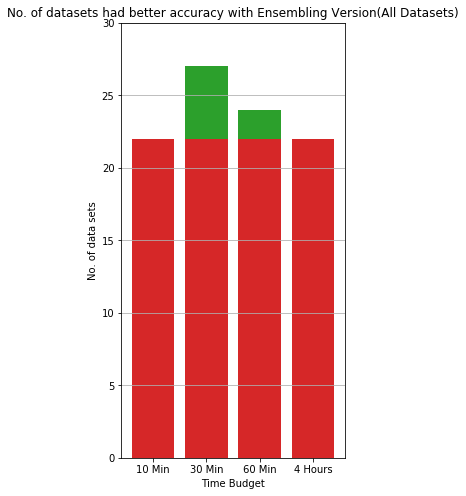

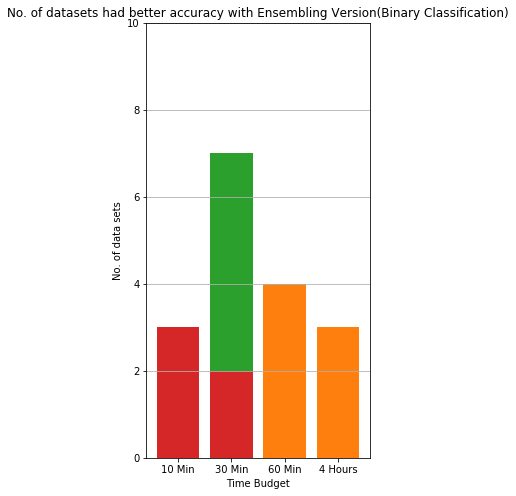

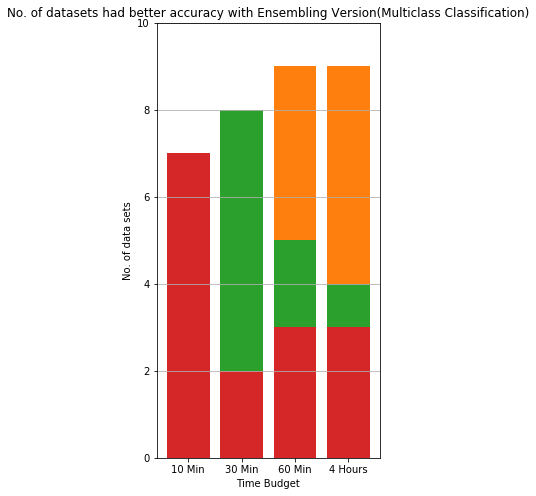

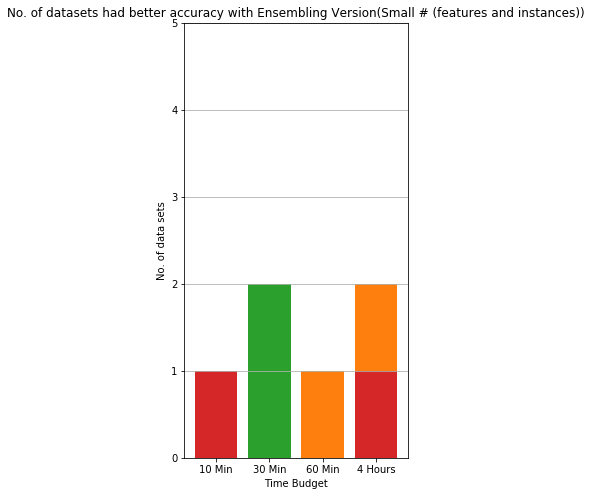

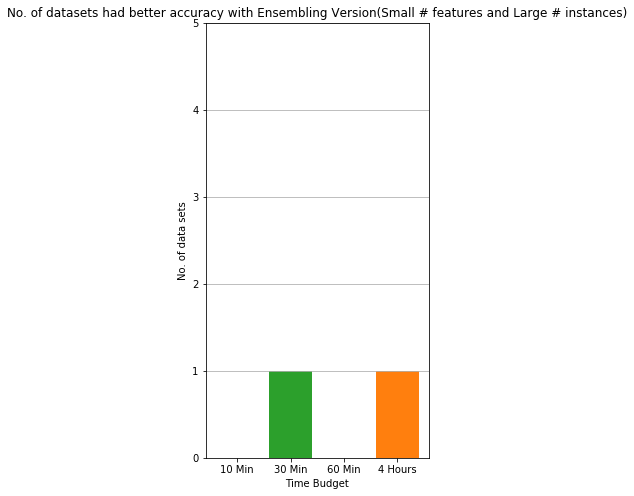

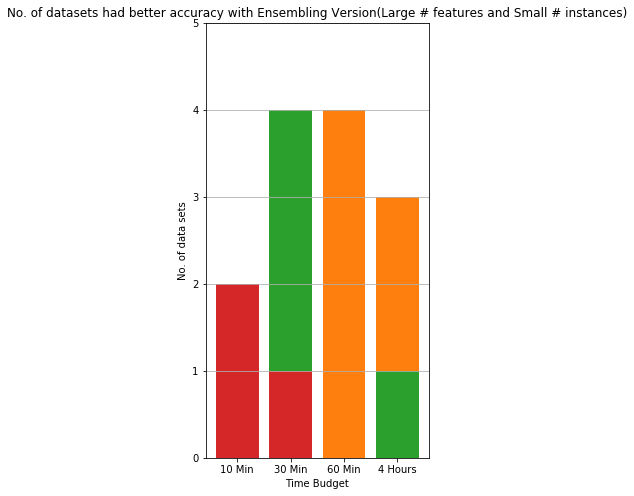

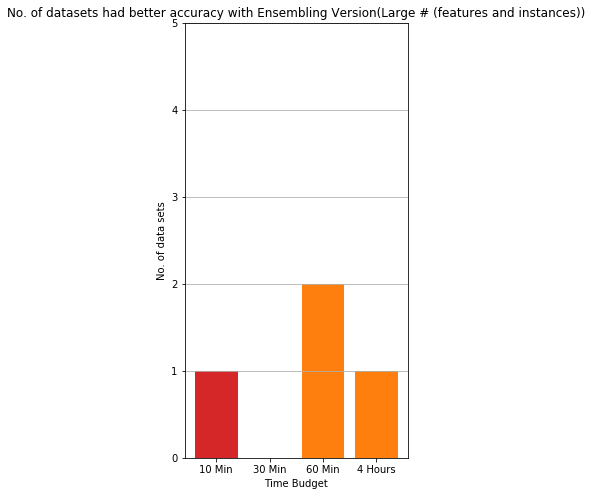

In [14]:
x_label = 'Data Sets'
fig = Figure()
ensembling = 'sklearn_e_accuracy_mean'
vanilla = 'sklearn_v_accuracy_mean'
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'No. of datasets had better accuracy with Ensembling Version'
fig.compare_acc_bar(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.1], divide_data=True)

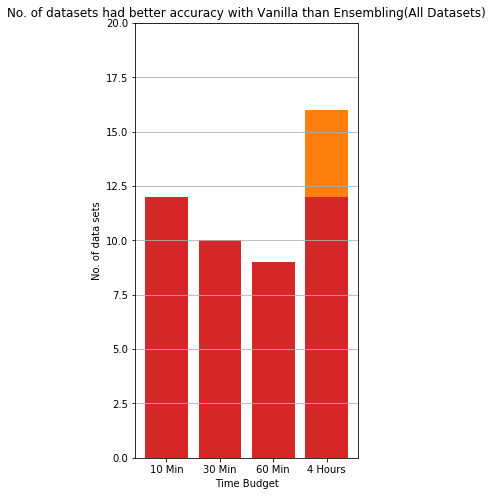

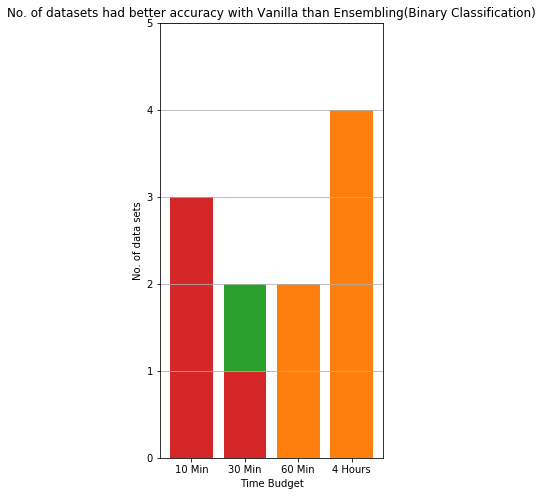

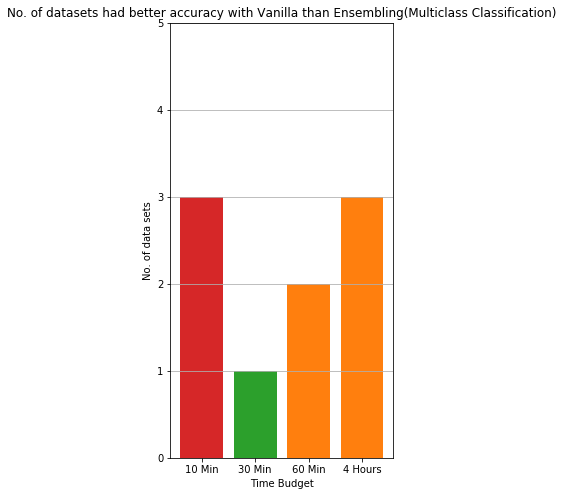

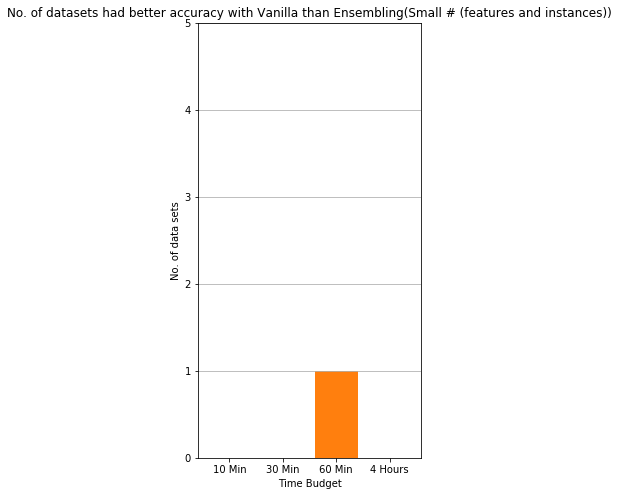

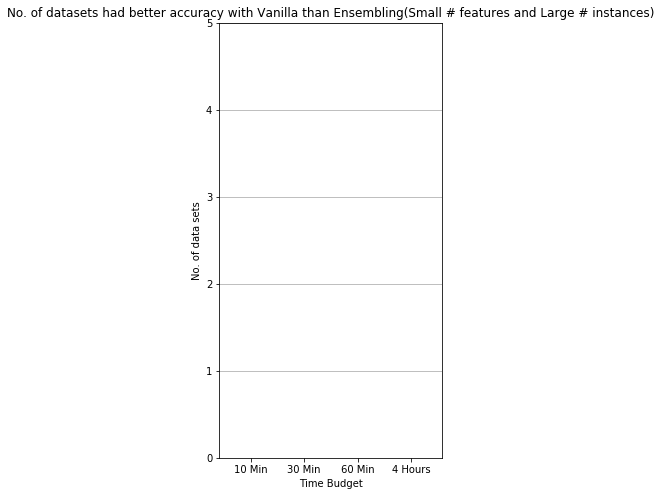

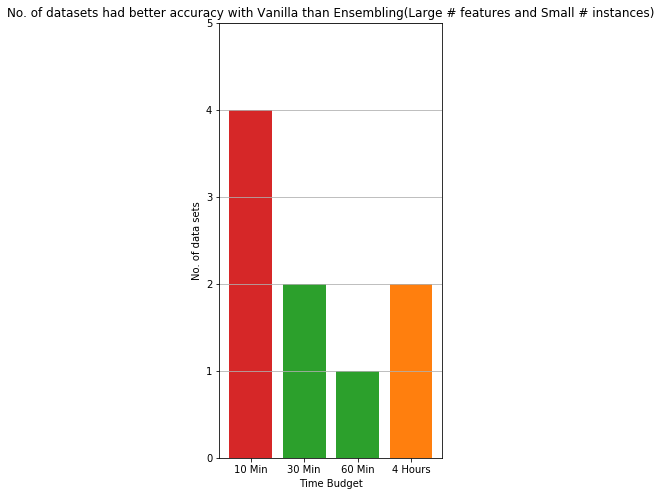

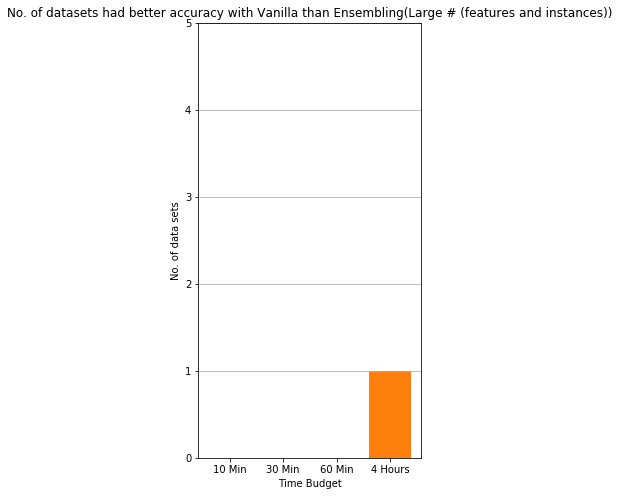

In [15]:
x_label = 'Data Sets'
fig = Figure()
ensembling = 'sklearn_e_accuracy_mean'
vanilla = 'sklearn_v_accuracy_mean'
y_lable = '(Meta-learning Acc.) - (Vanilla Acc.) '
title = 'No. of datasets had better accuracy with Vanilla than Ensembling'
fig.compare_acc_bar(vanilla, ensembling, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.1], divide_data=True)

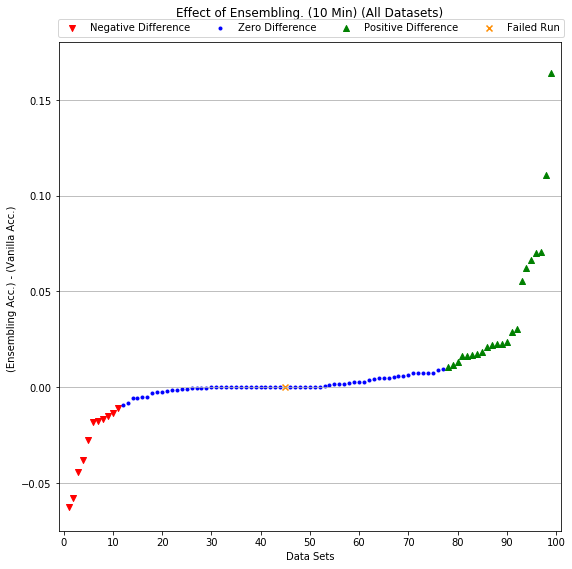

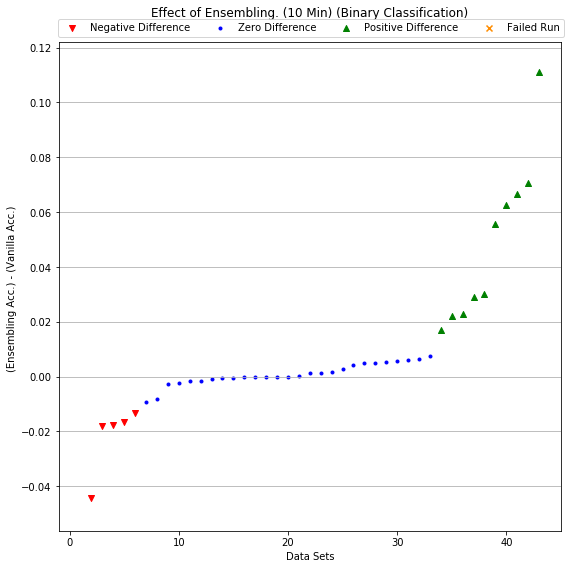

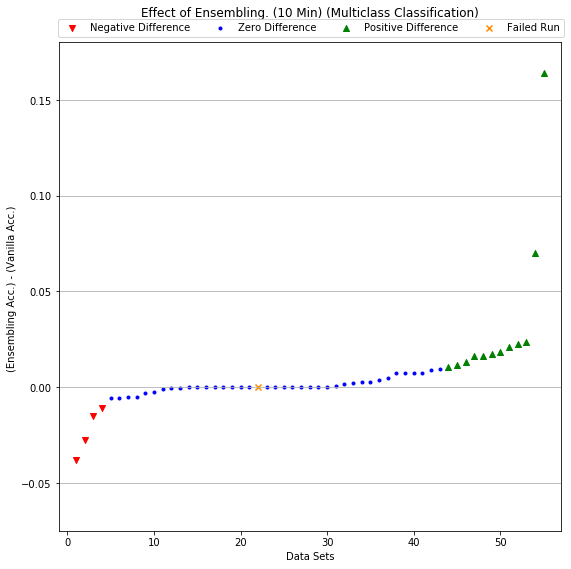

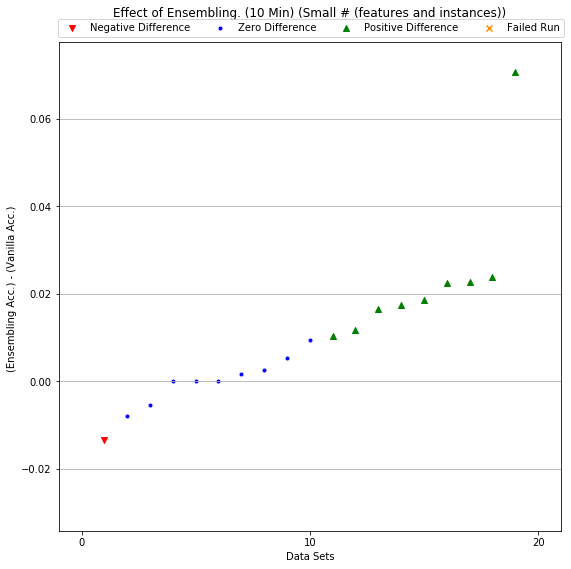

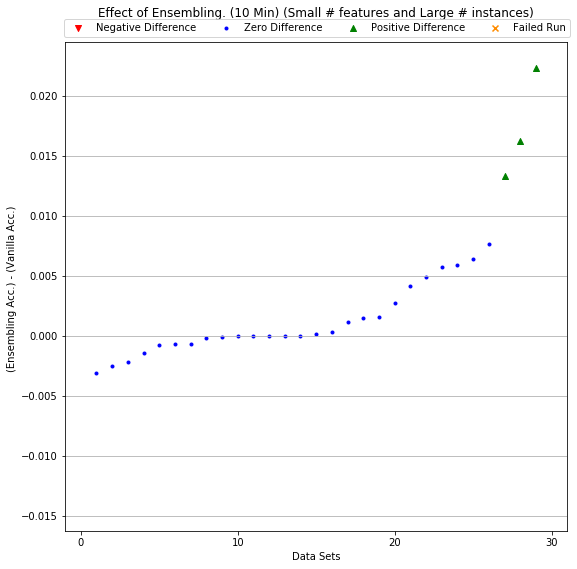

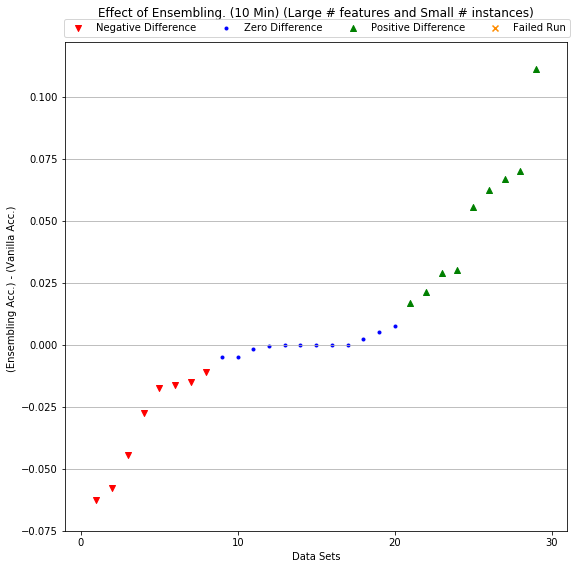

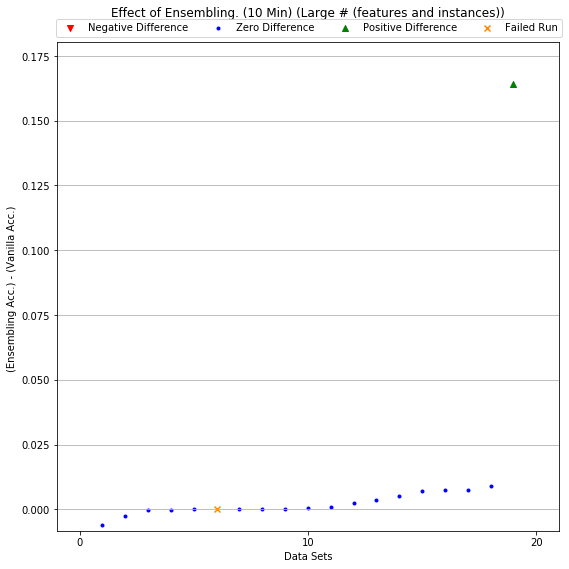

In [16]:
fig = Figure()
ensembling = fig.get_sheet()['10 Min'].sklearn_e_accuracy_mean
vanilla = fig.get_sheet()['10 Min'].sklearn_v_accuracy_mean
y_lable = '(Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Ensembling. (10 Min)'
fig.compare_acc_scatter(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.1, 0.2], divide_data=True)

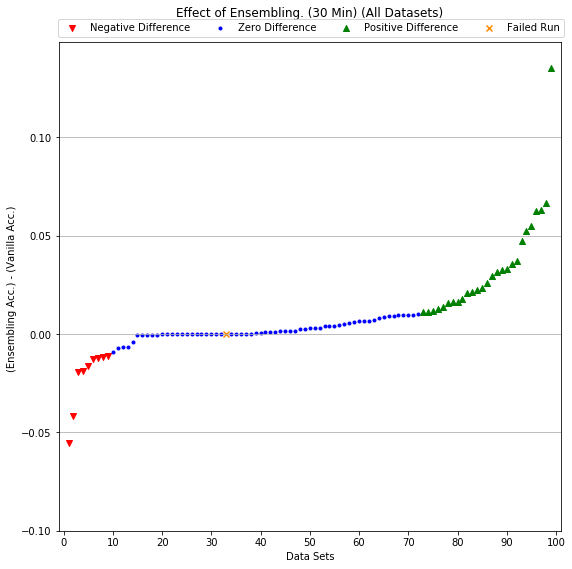

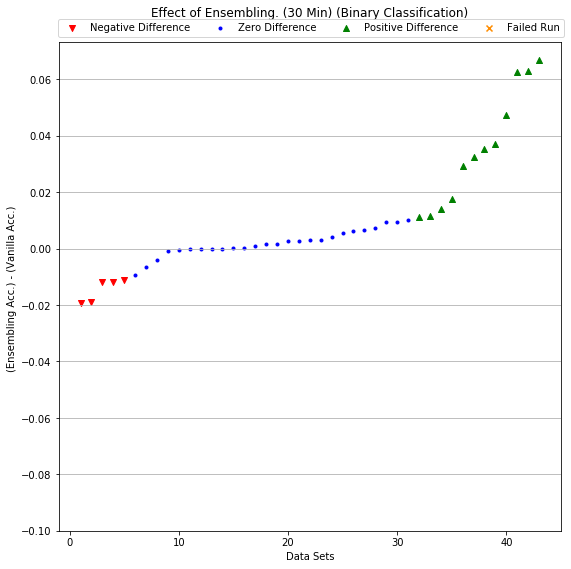

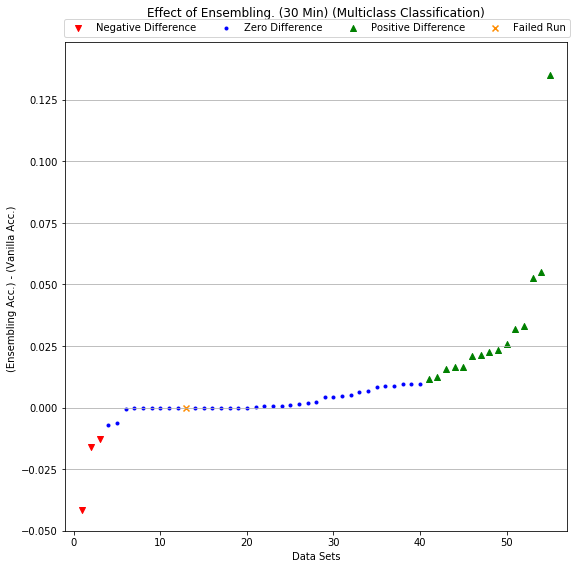

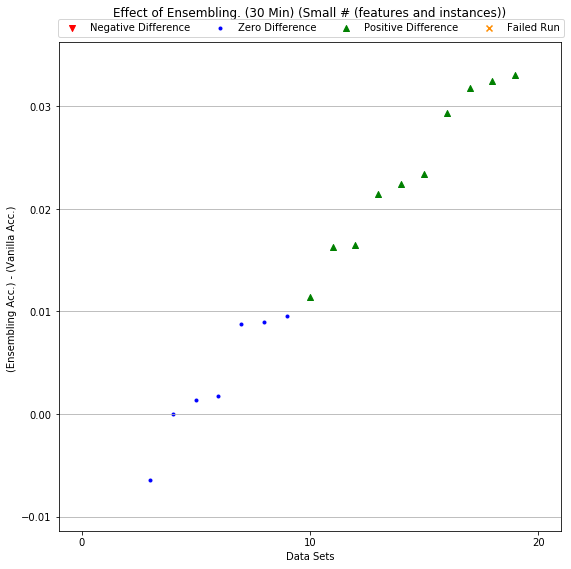

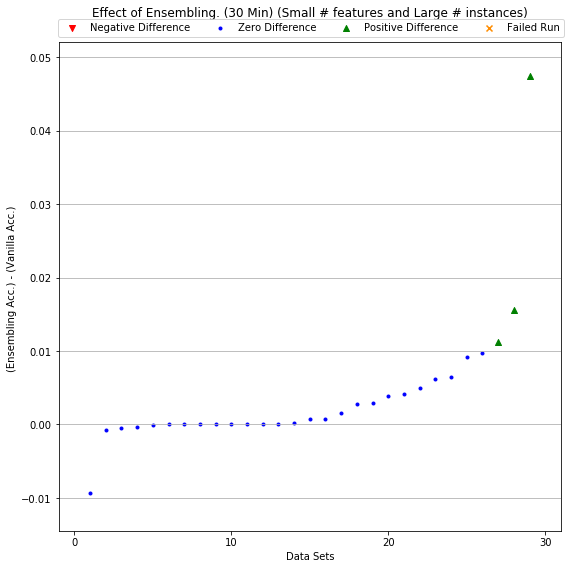

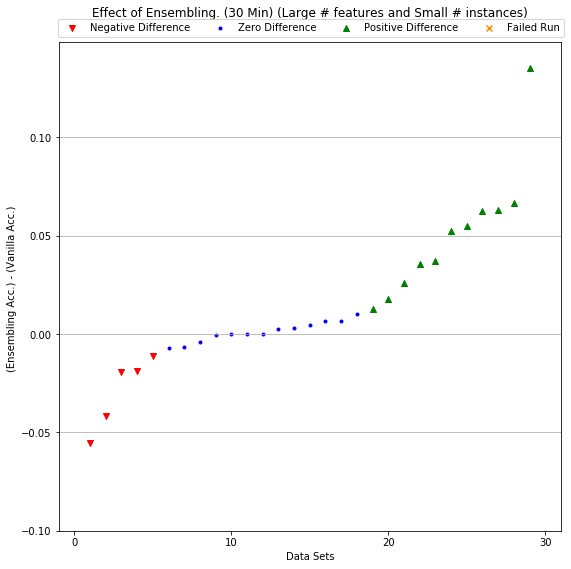

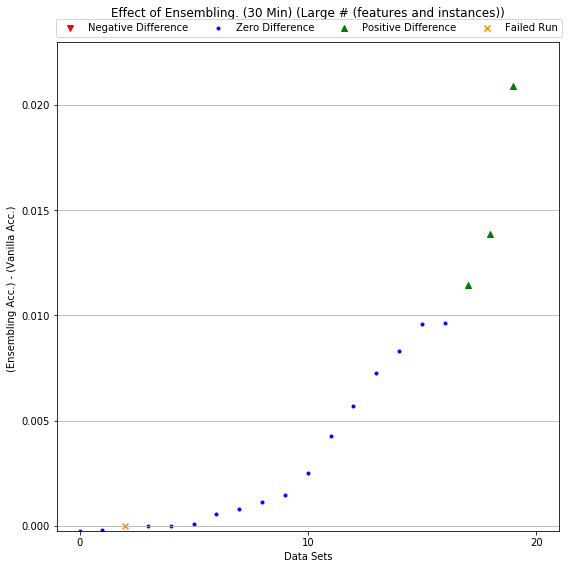

In [17]:
fig = Figure()
ensembling = fig.get_sheet()['30 Min'].sklearn_e_accuracy_mean
vanilla = fig.get_sheet()['30 Min'].sklearn_v_accuracy_mean
y_lable = '(Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Ensembling. (30 Min)'
fig.compare_acc_scatter(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.15, 0.15], divide_data=True)

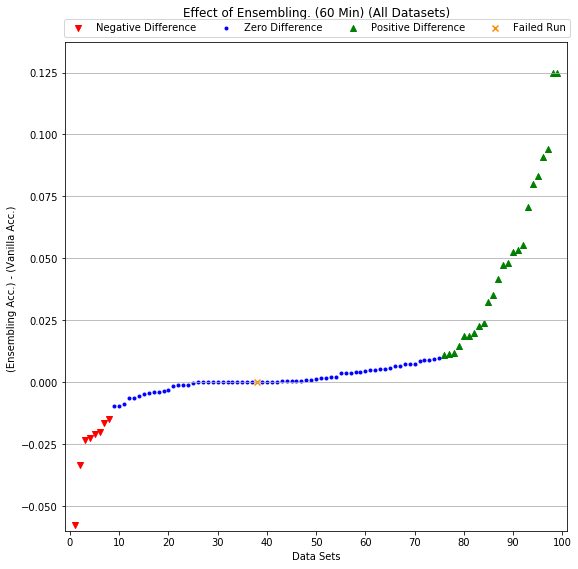

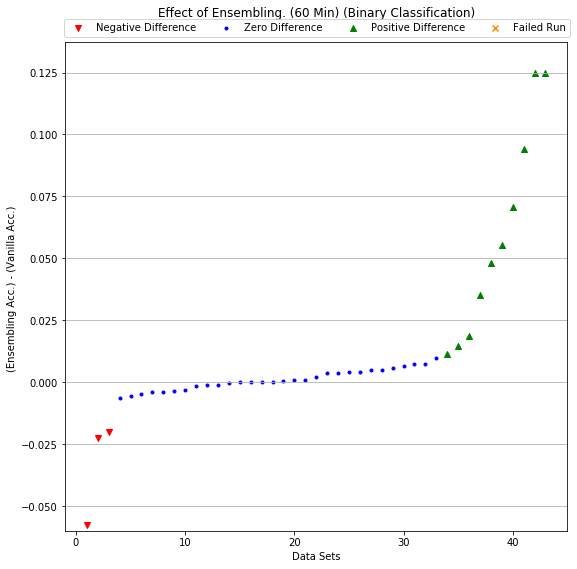

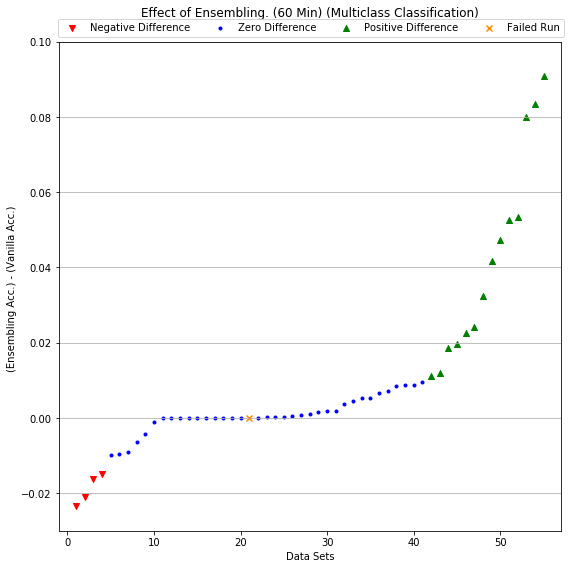

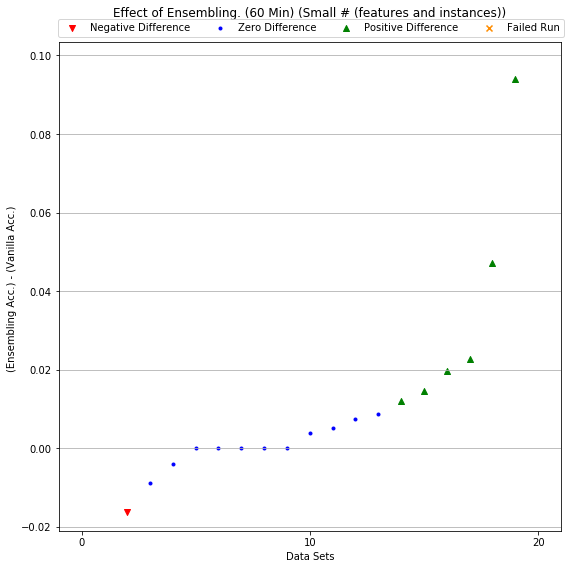

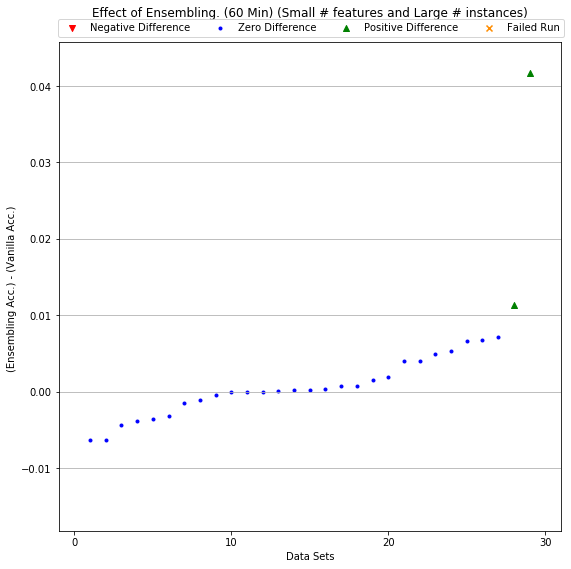

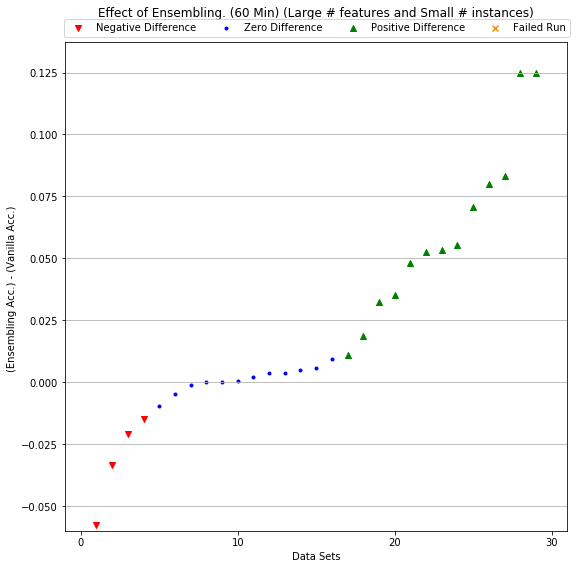

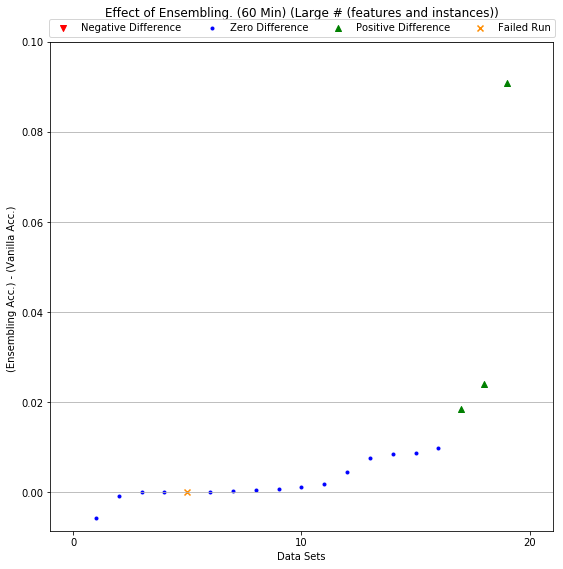

In [18]:
fig = Figure()
ensembling = fig.get_sheet()['60 Min'].sklearn_e_accuracy_mean
vanilla = fig.get_sheet()['60 Min'].sklearn_v_accuracy_mean
y_lable = '(Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Ensembling. (60 Min)'
fig.compare_acc_scatter(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.1, 0.15], divide_data=True)

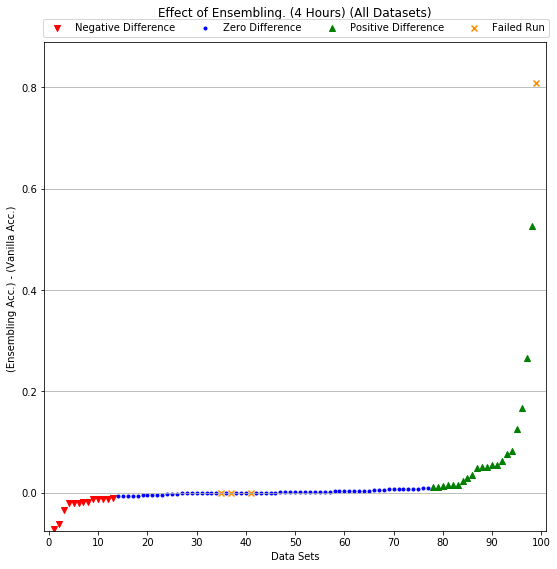

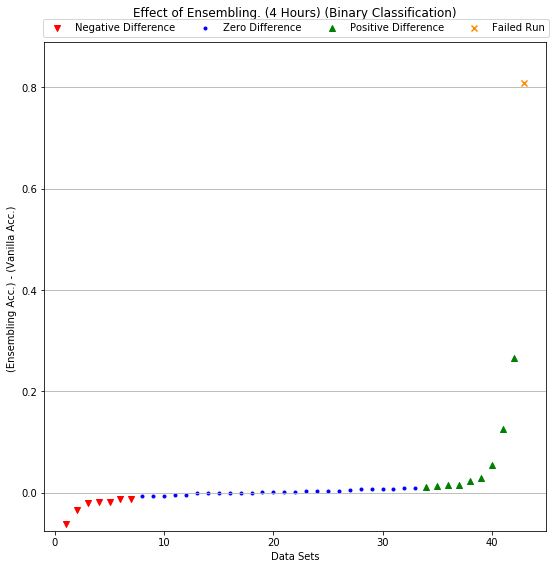

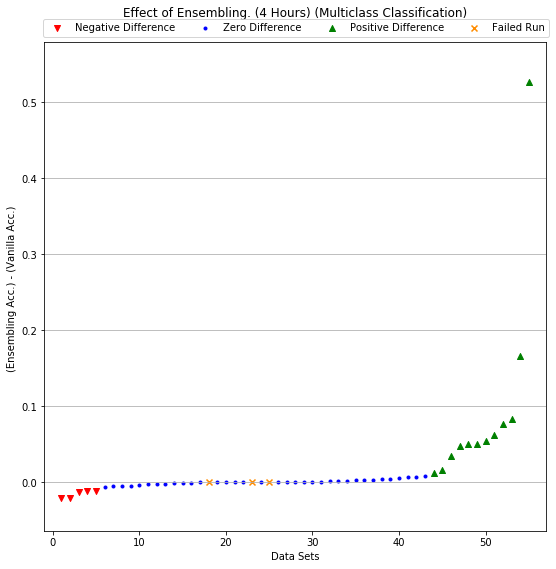

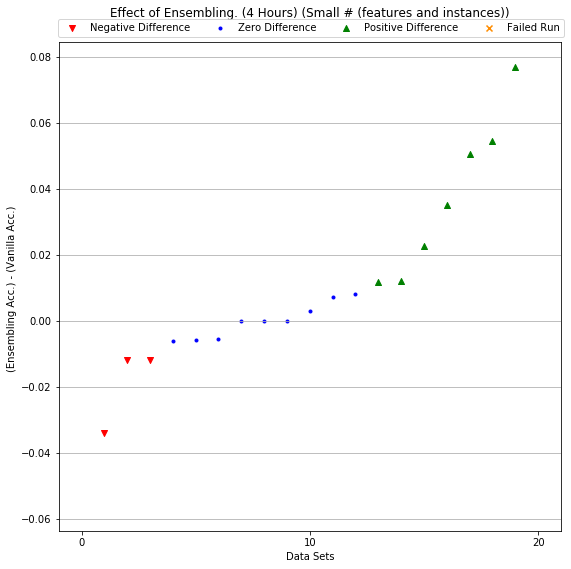

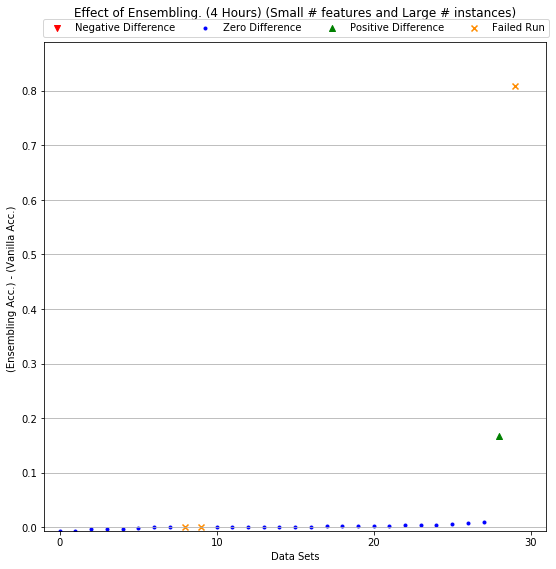

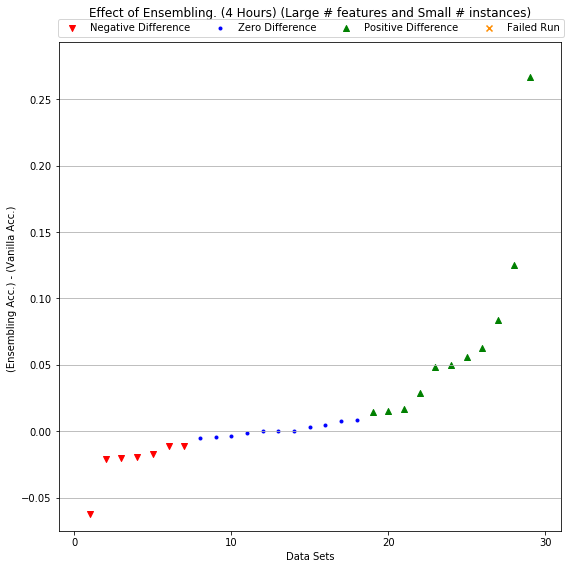

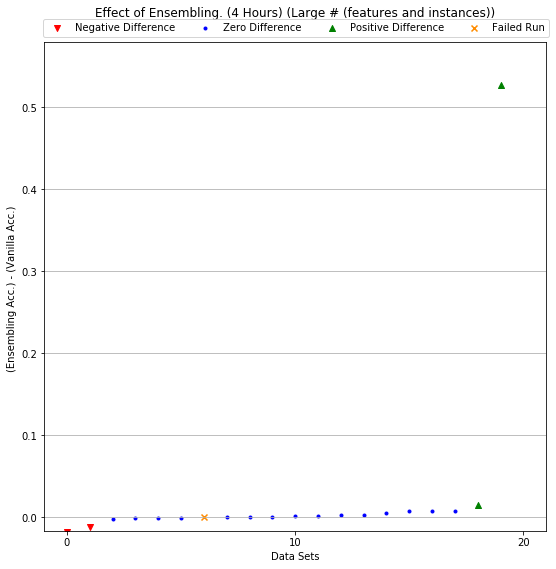

In [19]:
fig = Figure()
ensembling = fig.get_sheet()['4 Hours'].sklearn_e_accuracy_mean
vanilla = fig.get_sheet()['4 Hours'].sklearn_v_accuracy_mean
y_lable = '(Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Ensembling. (4 Hours)'
fig.compare_acc_scatter(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 1], divide_data=True)

# How many times combined Meta-learning and Ensembling improved the performance and what is the average improvement in AutoSKLearn?

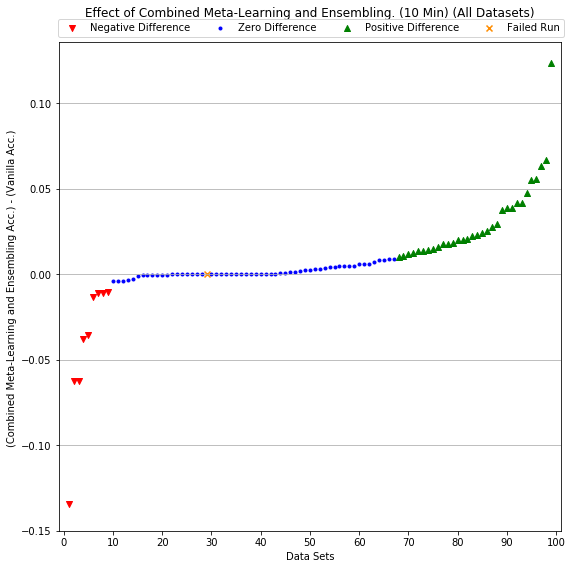

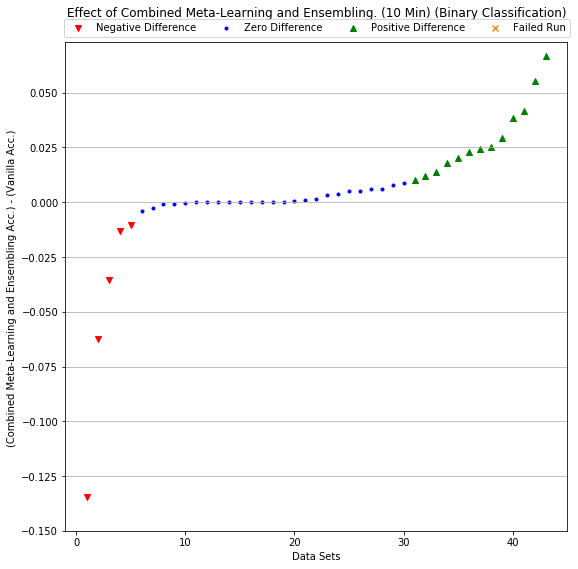

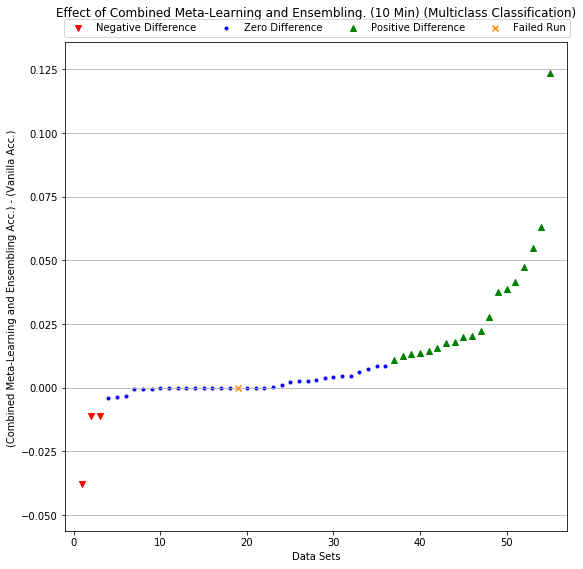

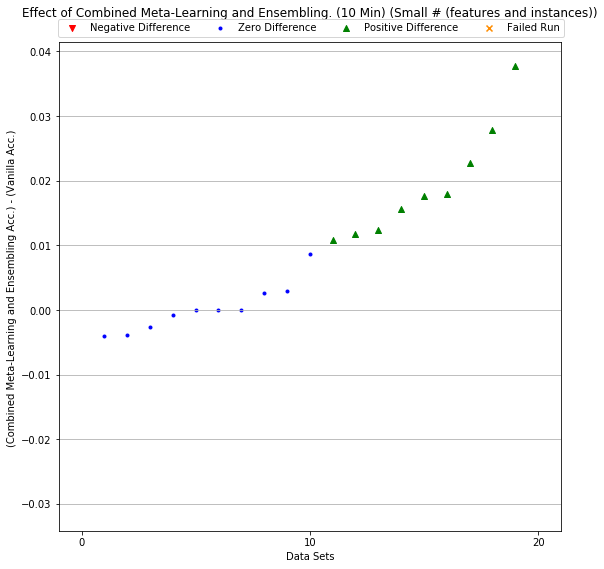

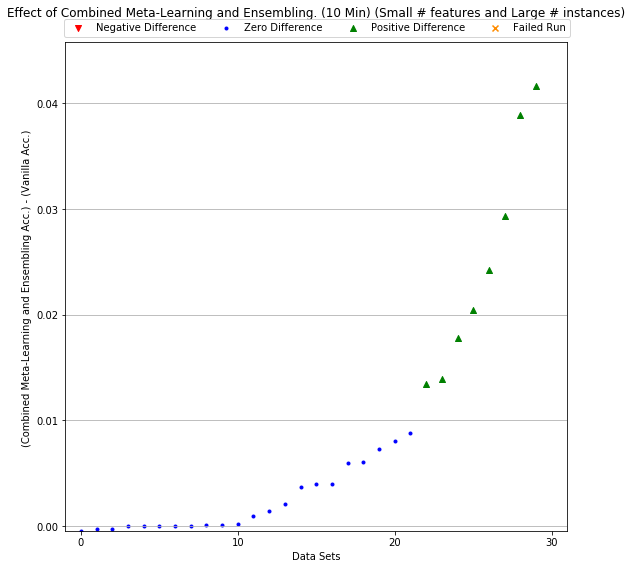

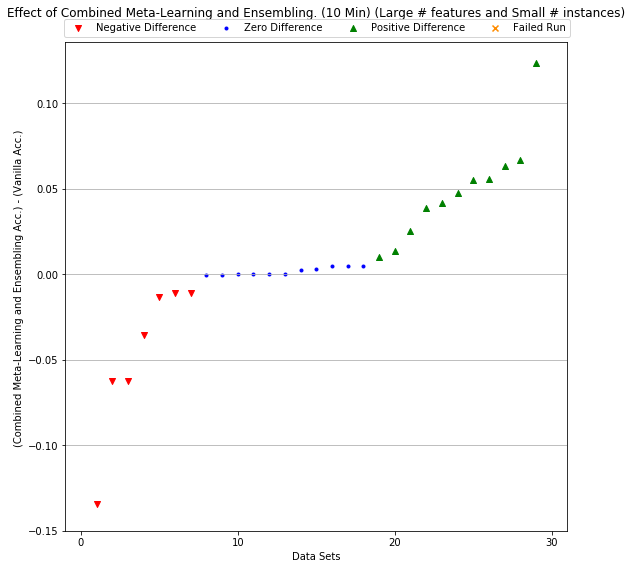

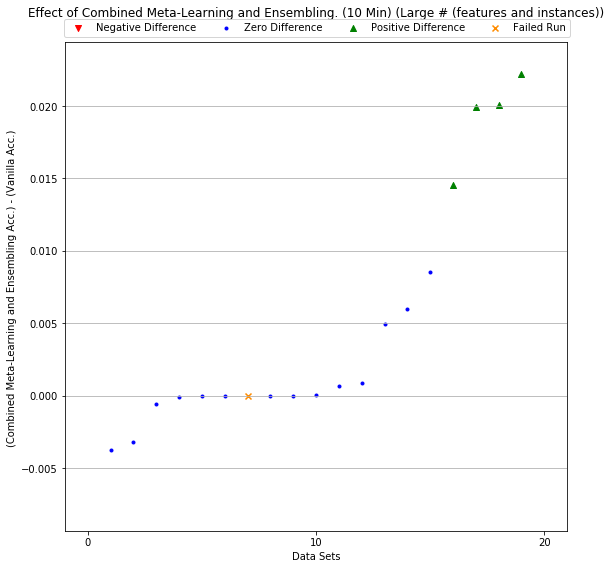

In [20]:
fig = Figure()
full = fig.get_sheet()['10 Min'].sklearn_accuracy_mean
vanilla = fig.get_sheet()['10 Min'].sklearn_v_accuracy_mean
y_lable = '(Combined Meta-Learning and Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Combined Meta-Learning and Ensembling. (10 Min)'
fig.compare_acc_scatter(full, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.2, 0.15], divide_data=True)

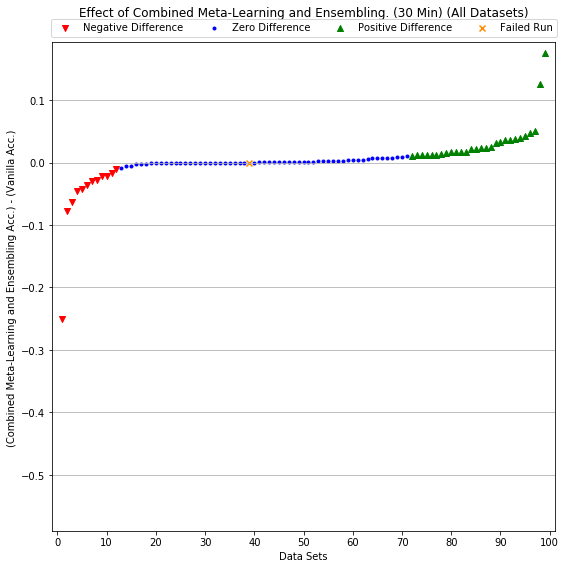

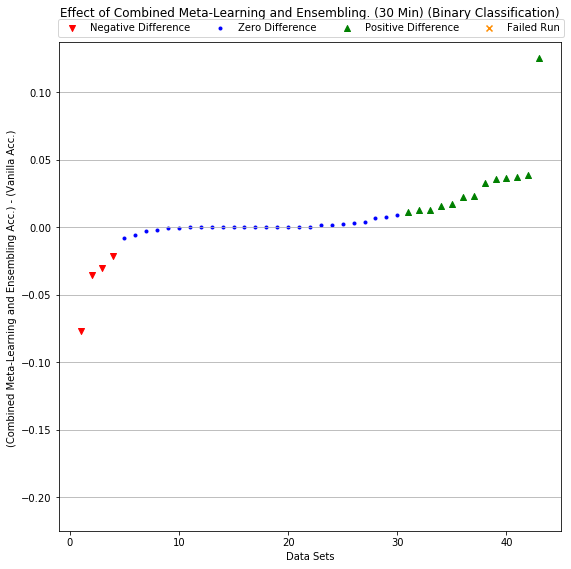

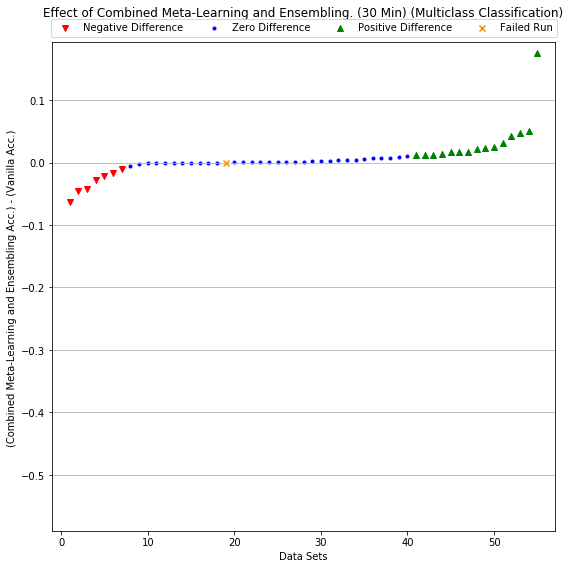

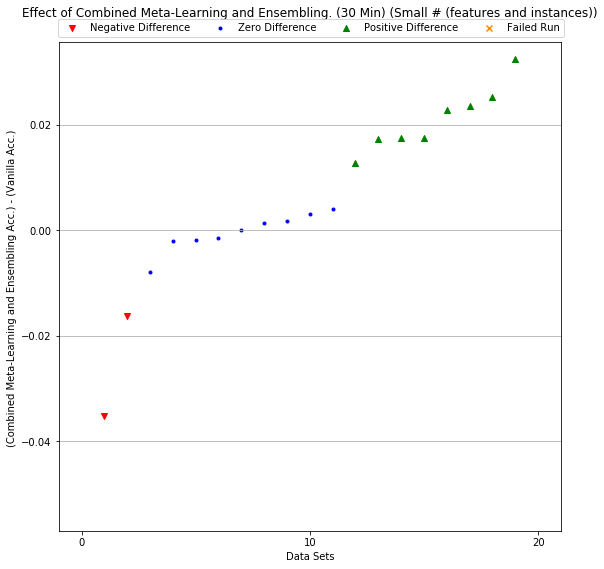

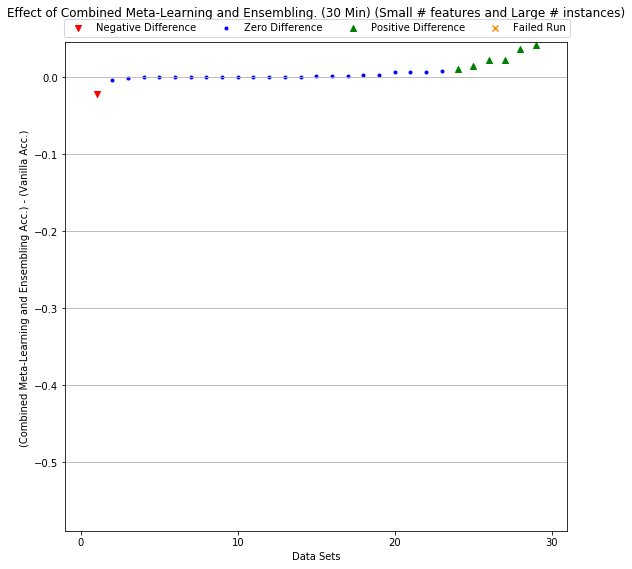

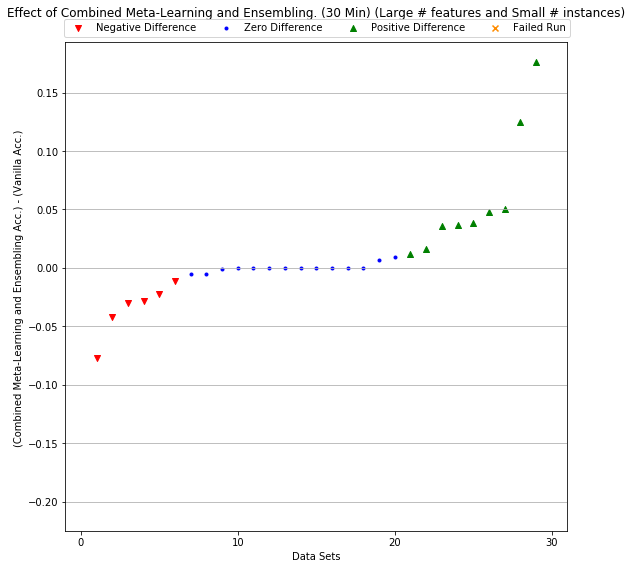

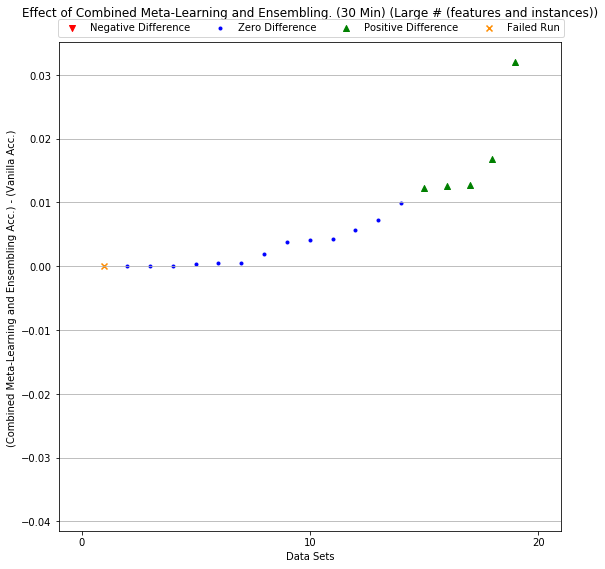

In [21]:
fig = Figure()
full = fig.get_sheet()['30 Min'].sklearn_accuracy_mean
vanilla = fig.get_sheet()['30 Min'].sklearn_v_accuracy_mean
y_lable = '(Combined Meta-Learning and Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Combined Meta-Learning and Ensembling. (30 Min)'
fig.compare_acc_scatter(full, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.8, 0.2], divide_data=True)

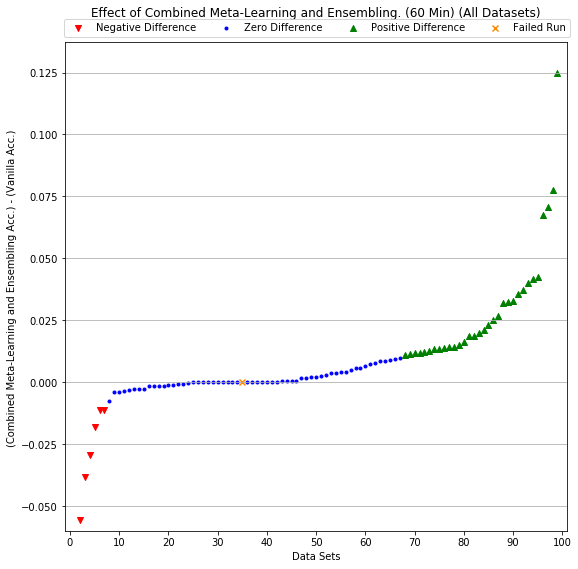

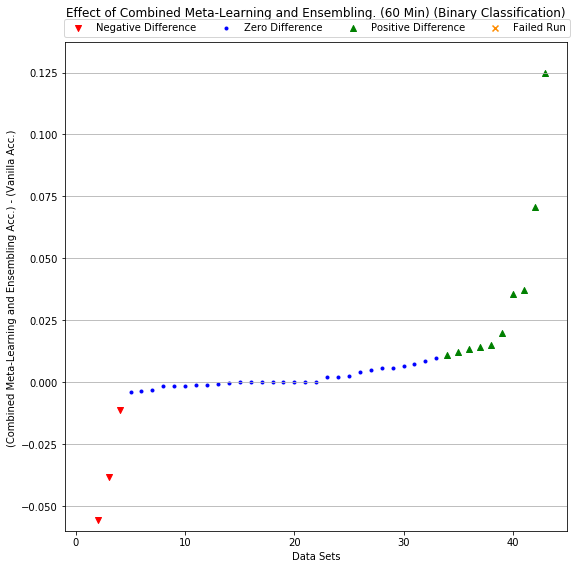

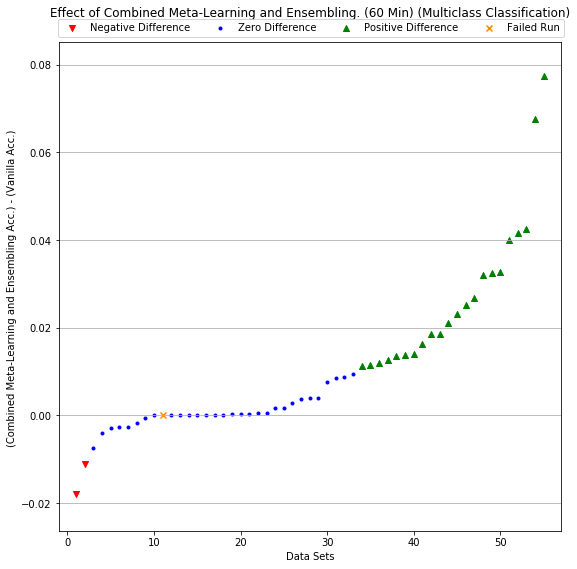

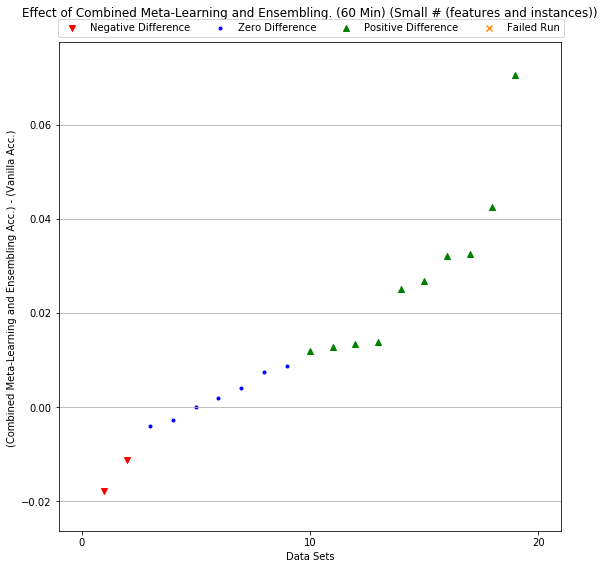

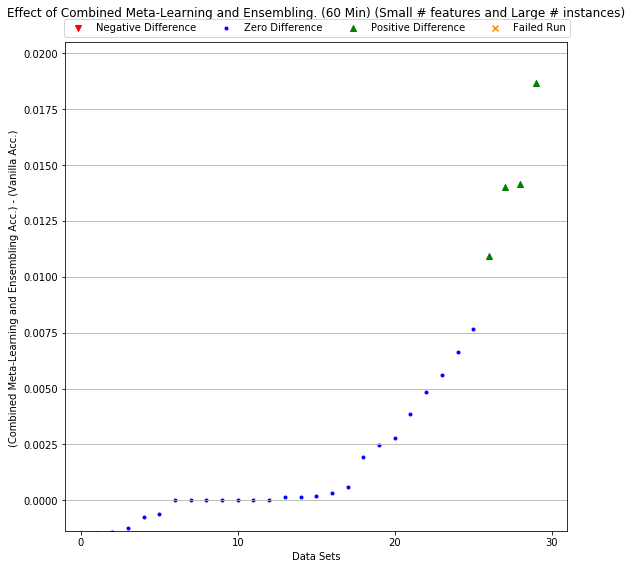

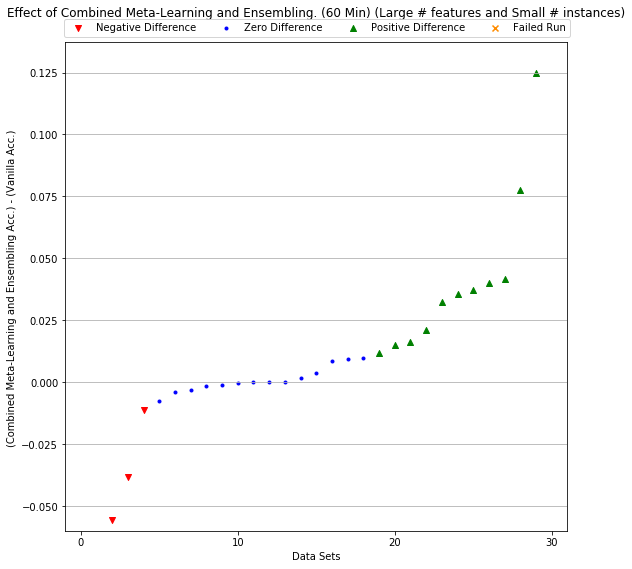

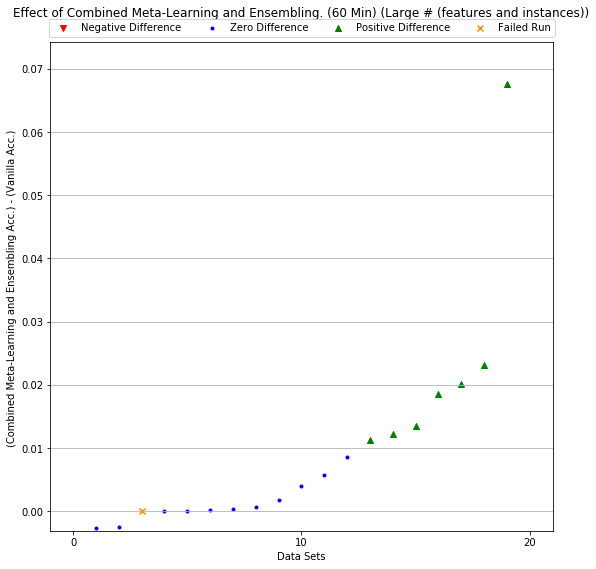

In [22]:
fig = Figure()
full = fig.get_sheet()['60 Min'].sklearn_accuracy_mean
vanilla = fig.get_sheet()['60 Min'].sklearn_v_accuracy_mean
y_lable = '(Combined Meta-Learning and Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Combined Meta-Learning and Ensembling. (60 Min)'
fig.compare_acc_scatter(full, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.1, 0.15], divide_data=True)

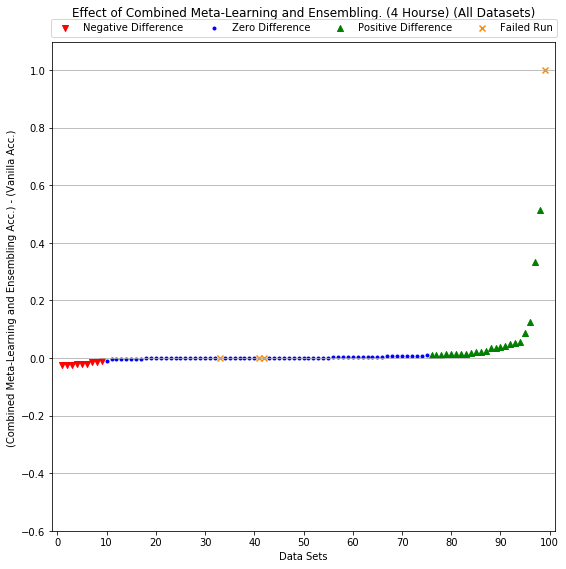

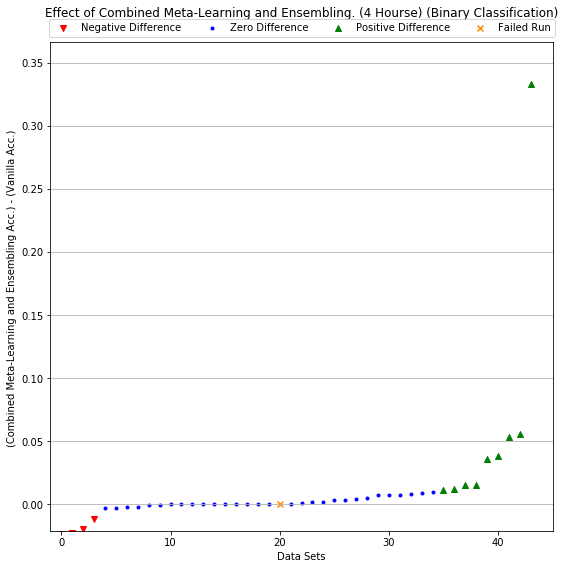

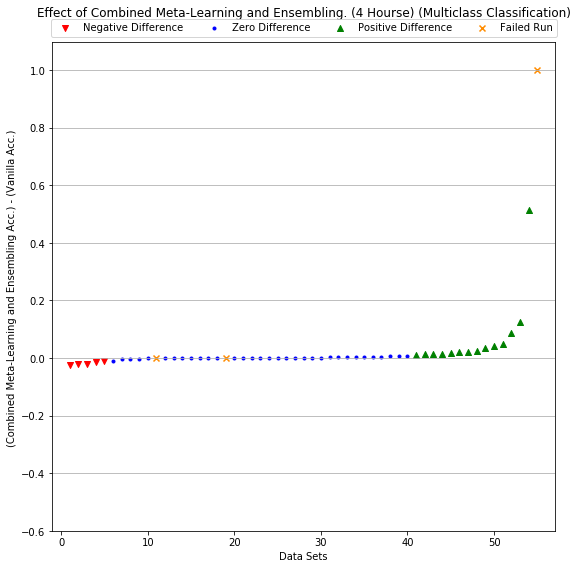

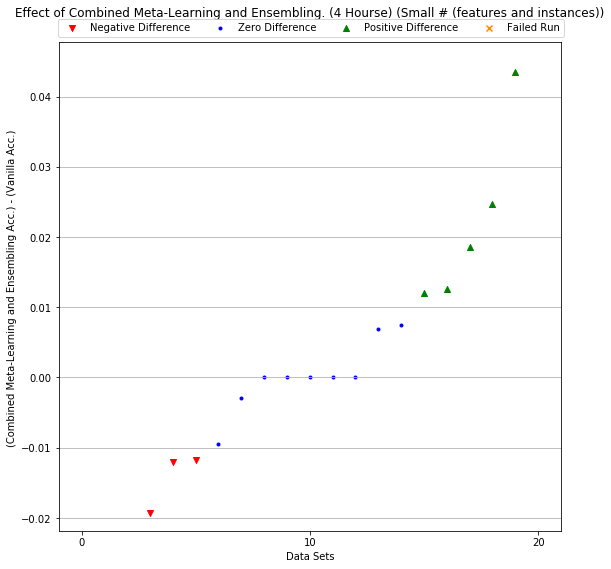

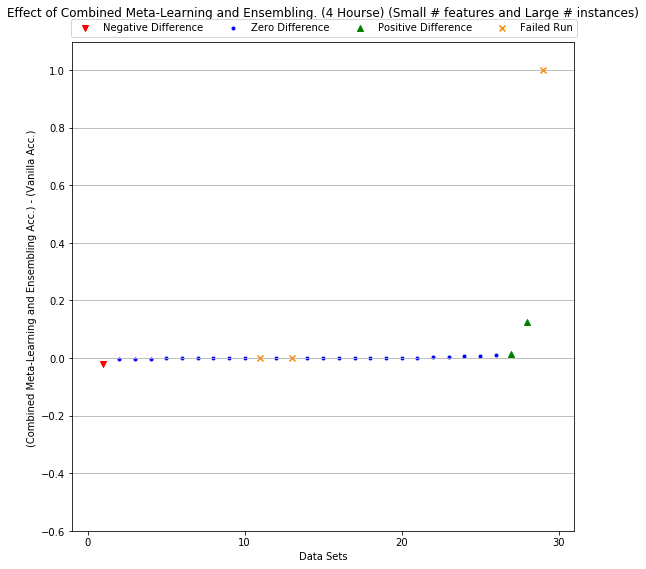

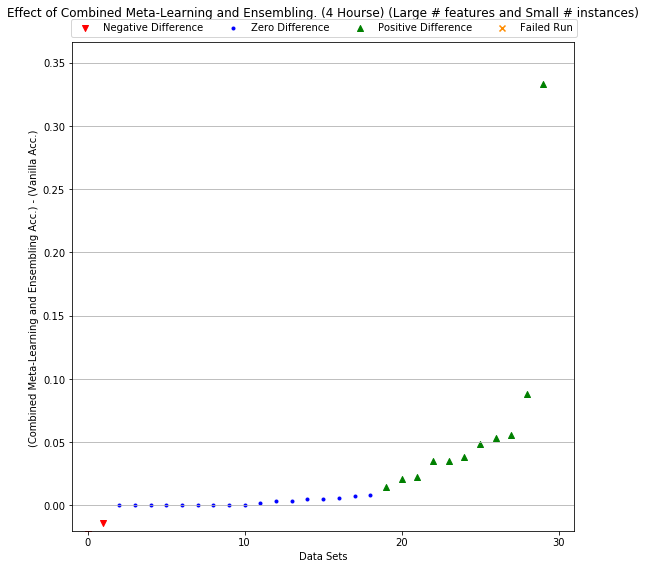

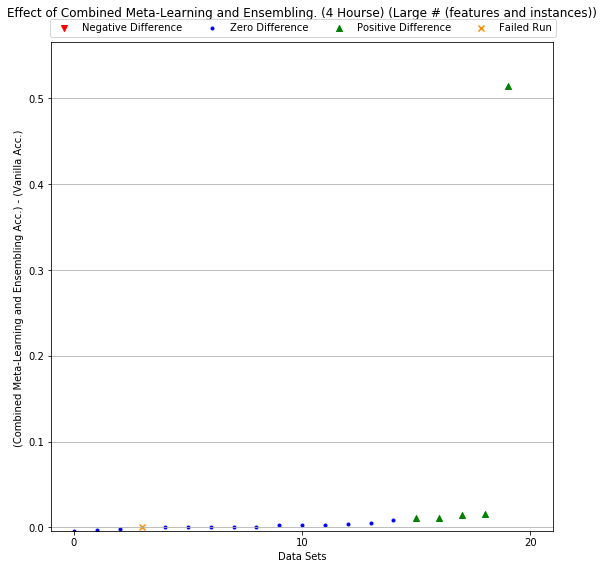

In [23]:
fig = Figure()
full = fig.get_sheet()['4 Hours'].sklearn_accuracy_mean
vanilla = fig.get_sheet()['4 Hours'].sklearn_v_accuracy_mean
y_lable = '(Combined Meta-Learning and Ensembling Acc.) - (Vanilla Acc.) '
title = 'Effect of Combined Meta-Learning and Ensembling. (4 Hourse)'
fig.compare_acc_scatter(full, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=[-0.8, 1.1], divide_data=True)

# TPOT v.s. Recipe 

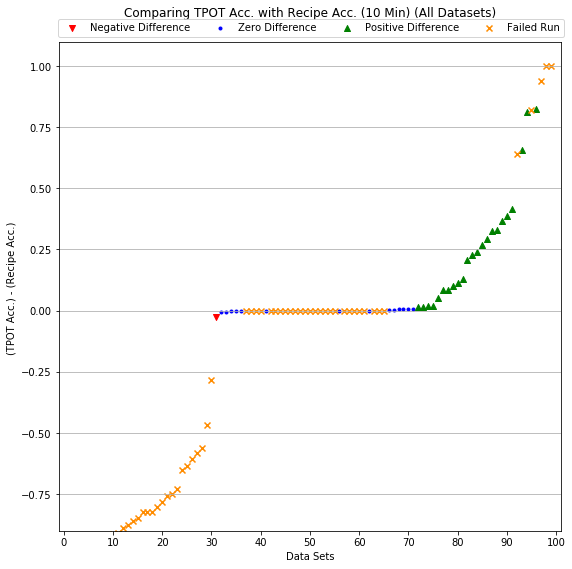

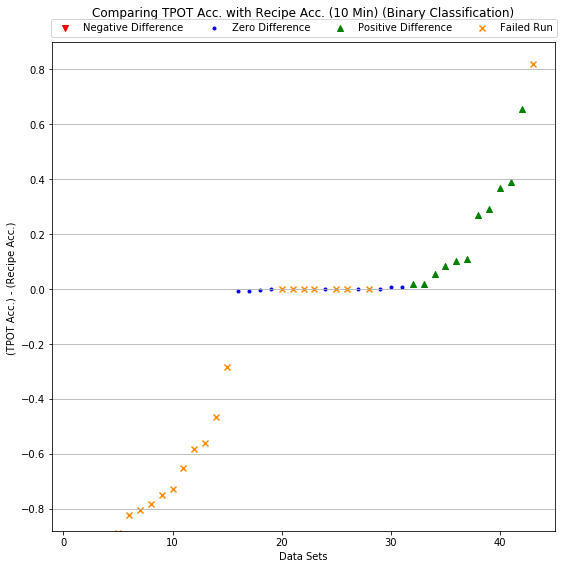

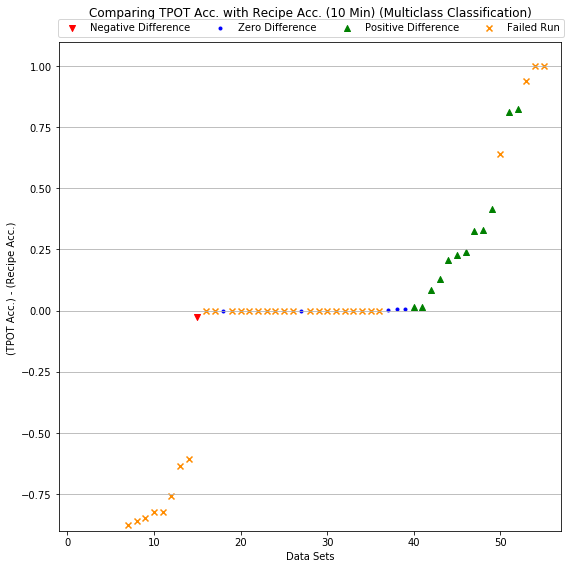

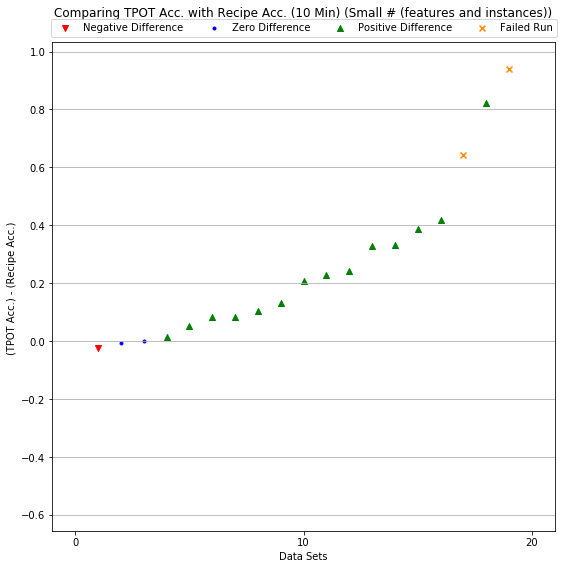

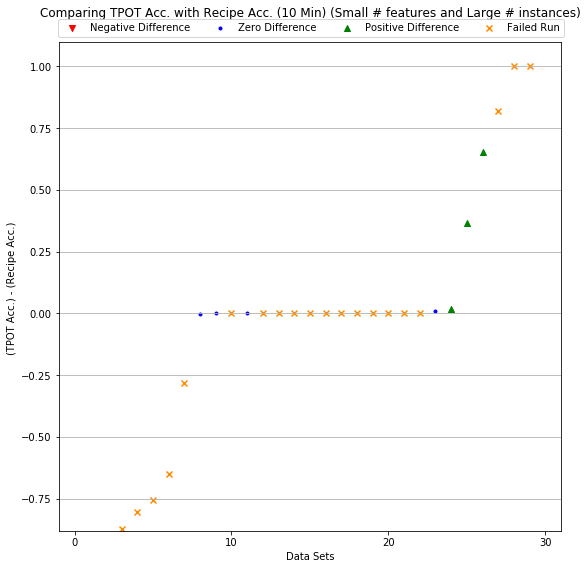

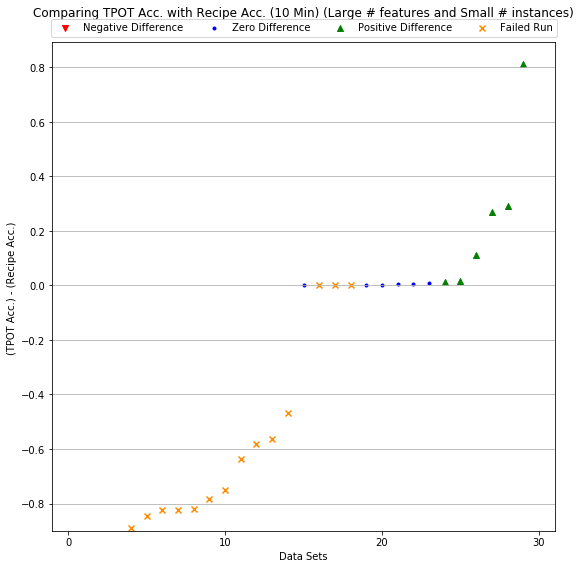

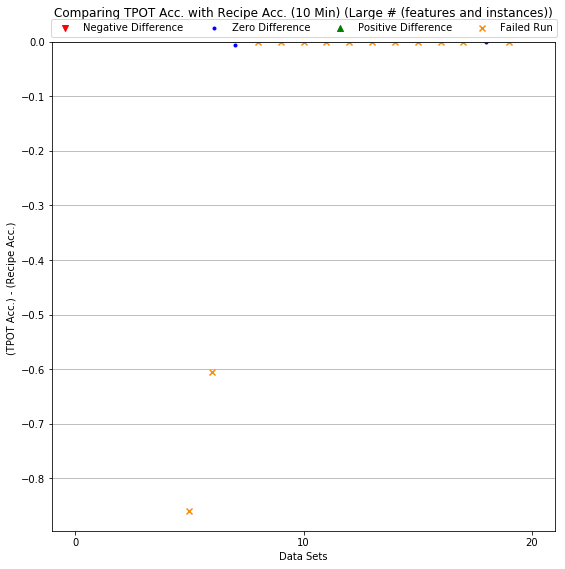

In [24]:
fig = Figure()
tpot = fig.get_sheet()['10 Min'].tpot_accuracy_mean
recipe = fig.get_sheet()['30 Min'].recipe_test_acc
x_label = 'Data Sets'
y_lable = '(TPOT Acc.) - (Recipe Acc.) '
title = 'Comparing TPOT Acc. with Recipe Acc. (10 Min)'
fig.compare_acc_scatter(tpot, recipe, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, divide_data=True)

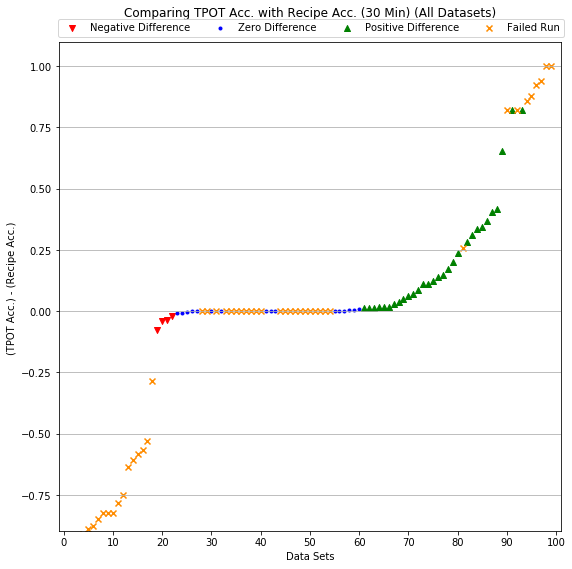

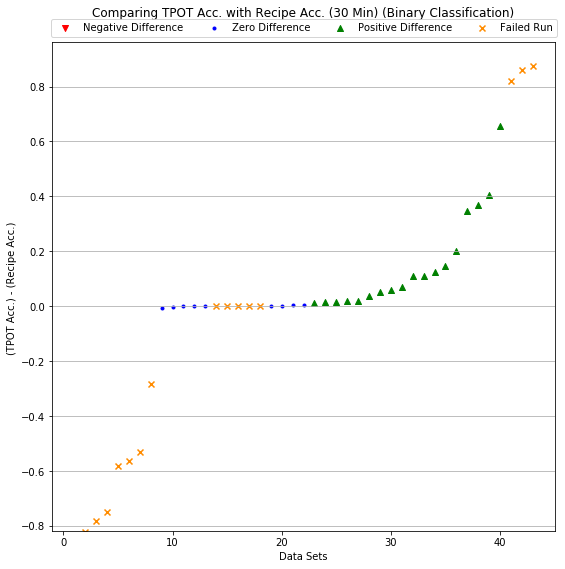

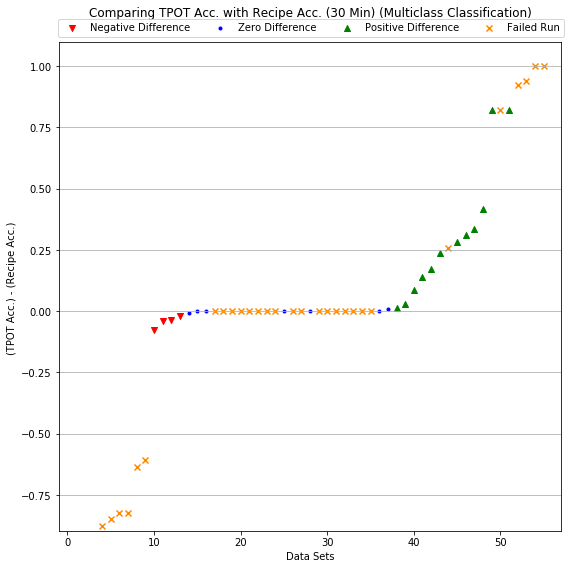

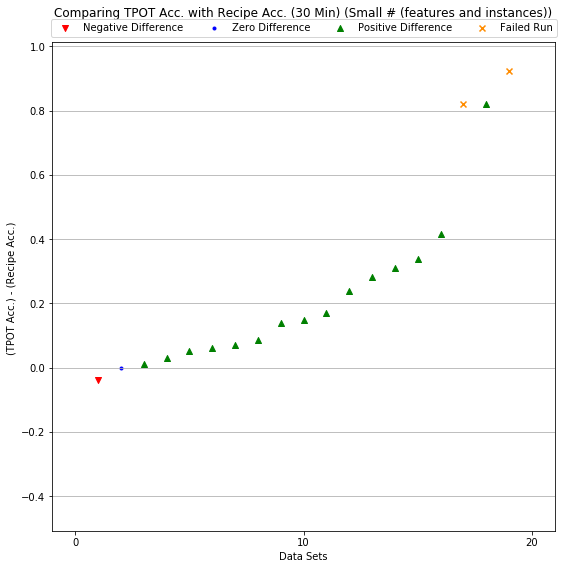

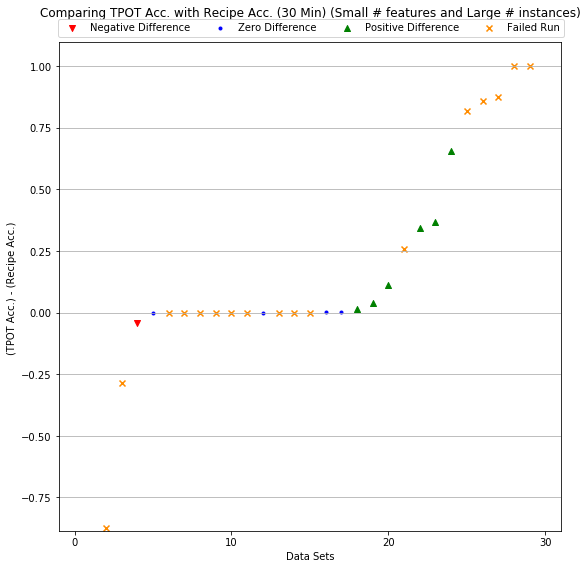

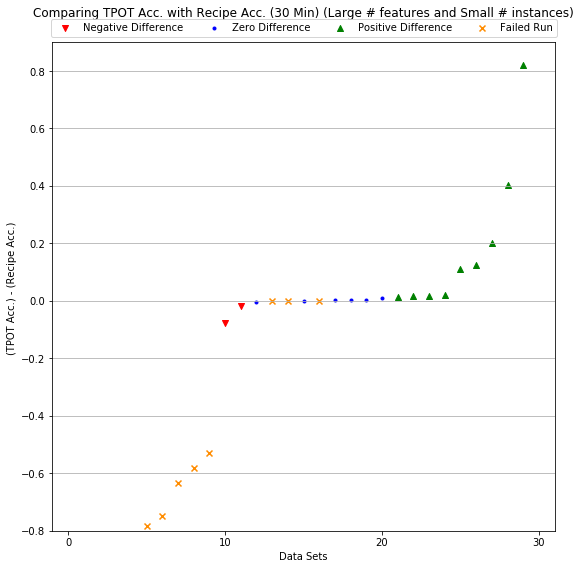

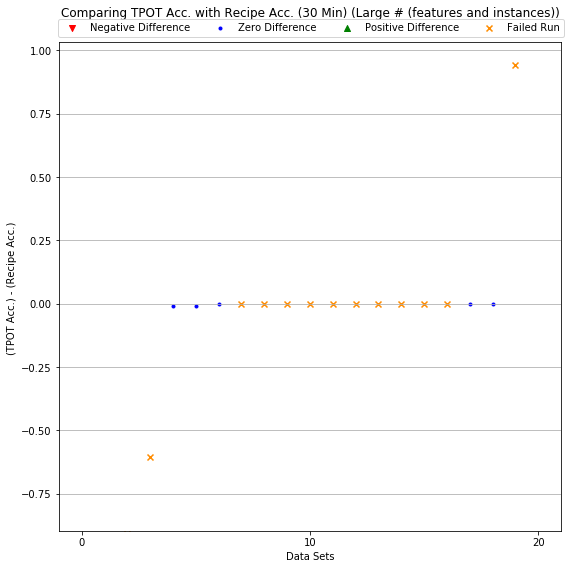

In [25]:
fig = Figure()
tpot = fig.get_sheet()['30 Min'].tpot_accuracy_mean
recipe = fig.get_sheet()['30 Min'].recipe_test_acc
x_label = 'Data Sets'
y_lable = '(TPOT Acc.) - (Recipe Acc.) '
title = 'Comparing TPOT Acc. with Recipe Acc. (30 Min)'
fig.compare_acc_scatter(tpot, recipe, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, divide_data=True)

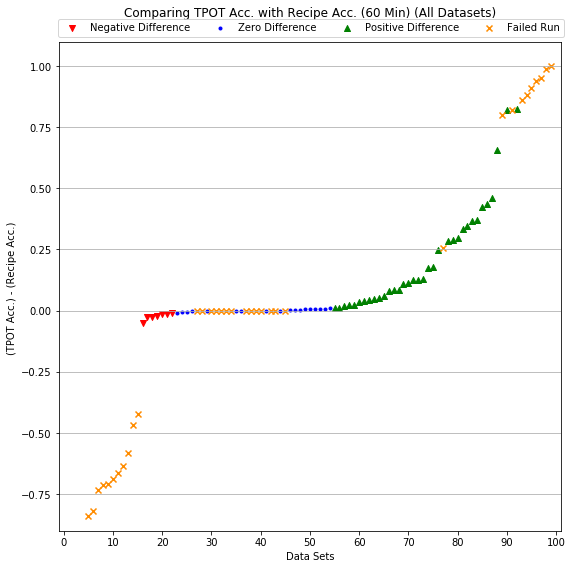

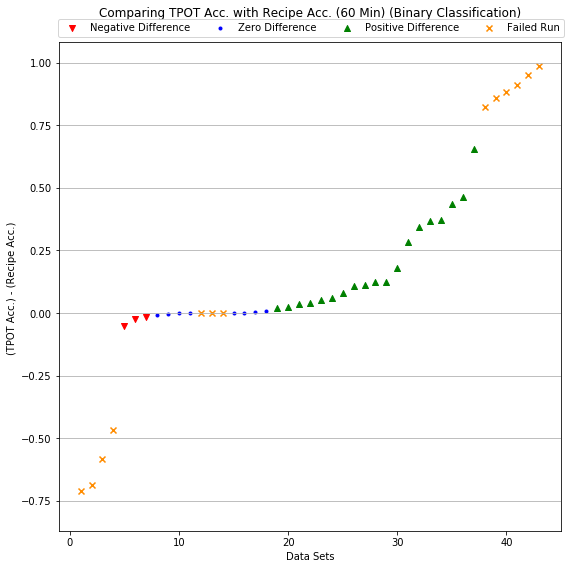

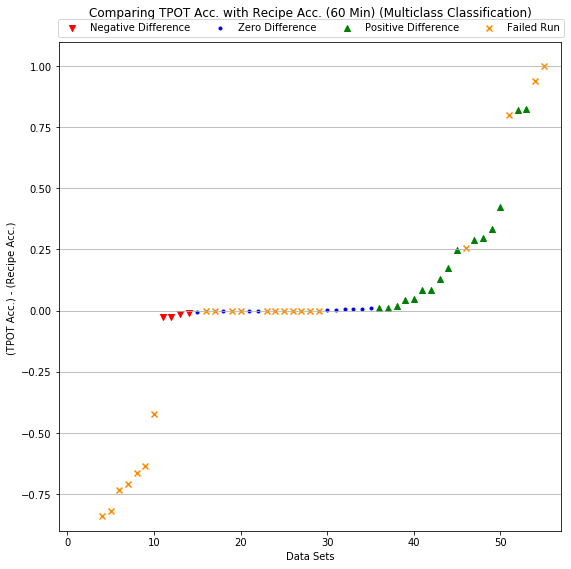

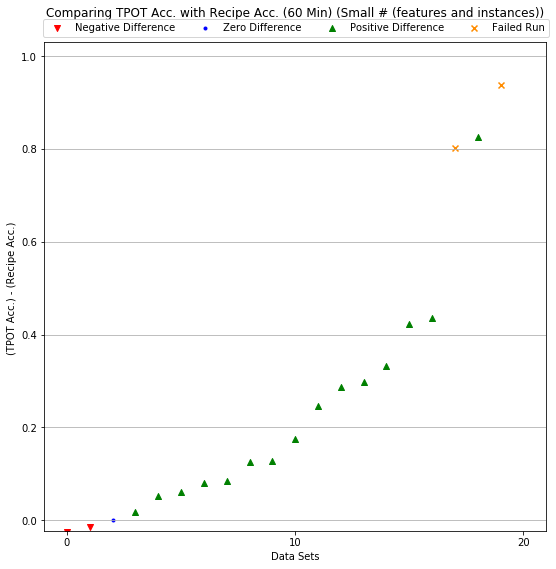

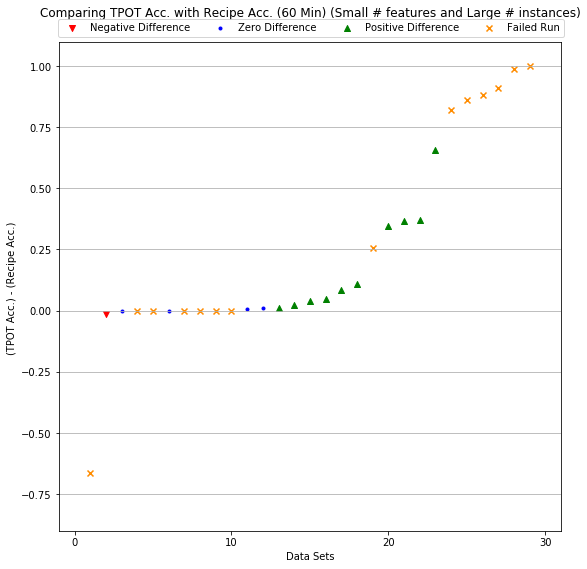

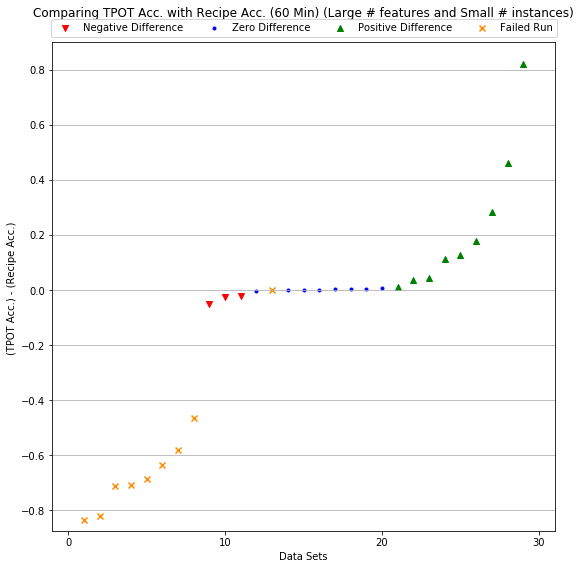

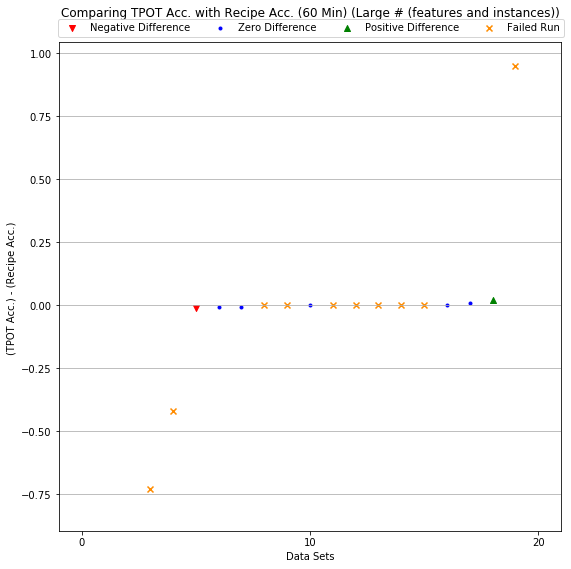

In [26]:
fig = Figure()
tpot = fig.get_sheet()['60 Min'].tpot_accuracy_mean
recipe = fig.get_sheet()['60 Min'].recipe_test_acc
x_label = 'Data Sets'
y_lable = '(TPOT Acc.) - (Recipe Acc.) '
title = 'Comparing TPOT Acc. with Recipe Acc. (60 Min)'
fig.compare_acc_scatter(tpot, recipe, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, divide_data=True)

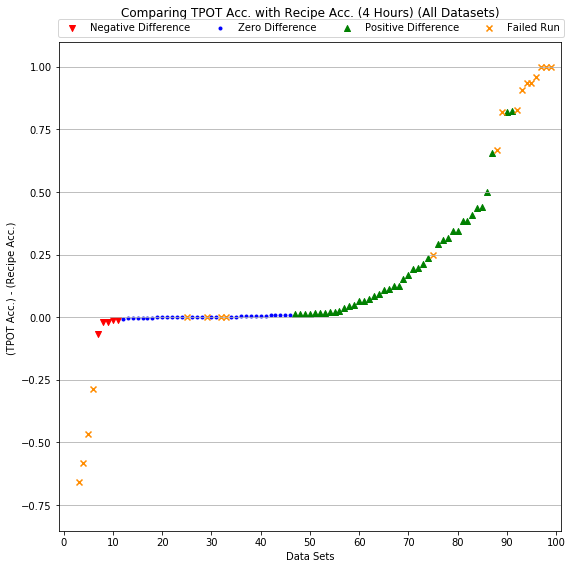

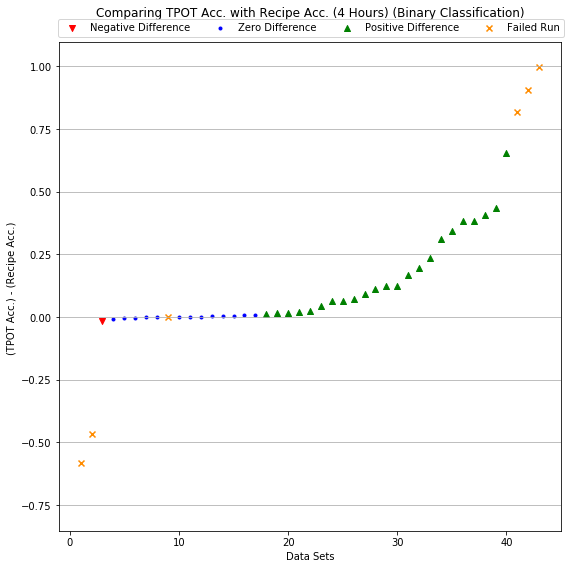

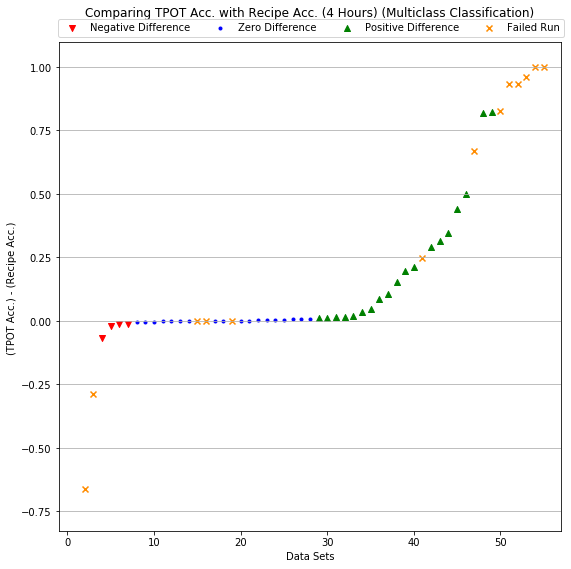

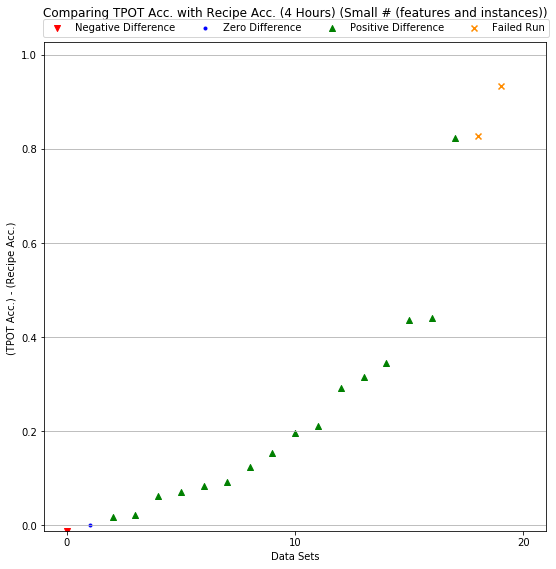

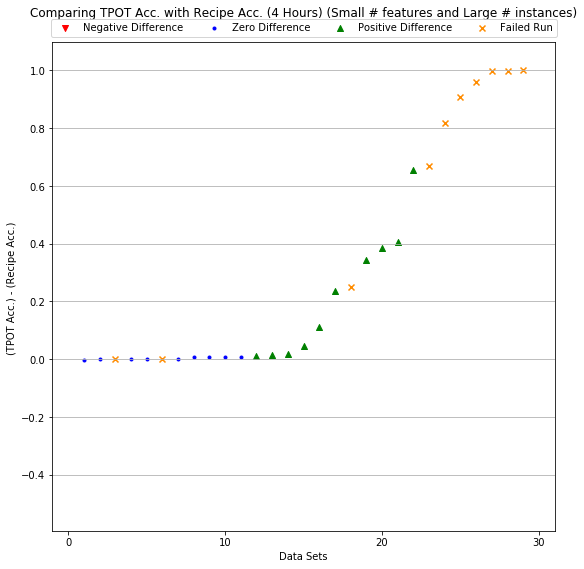

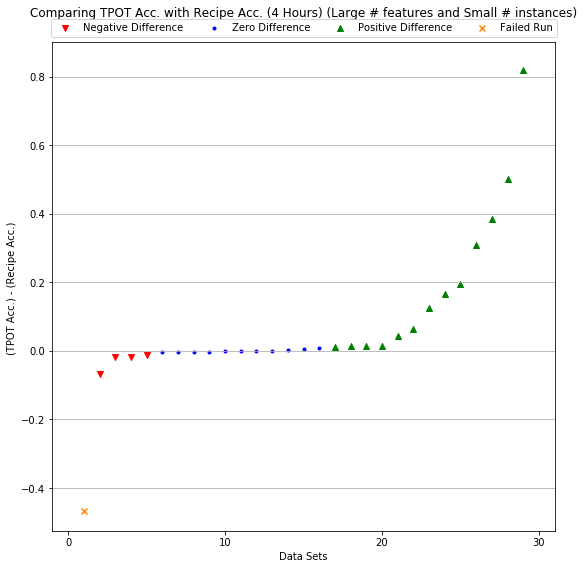

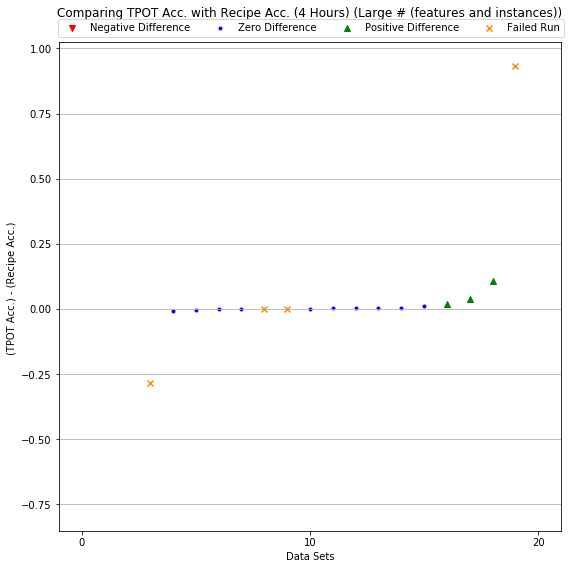

In [27]:
fig = Figure()
tpot = fig.get_sheet()['4 Hours'].tpot_accuracy_mean
recipe = fig.get_sheet()['4 Hours'].recipe_test_acc
x_label = 'Data Sets'
y_lable = '(TPOT Acc.) - (Recipe Acc.) '
title = 'Comparing TPOT Acc. with Recipe Acc. (4 Hours)'
fig.compare_acc_scatter(tpot, recipe, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, divide_data=True)

## TPOT  v.s Recipe

### TPOT
Number of Classifiers : 11 

Number of Preprocessors and Extractors : 14

Number of Feature Selector : 5

### Recipe
Number of Classifiers : 20

Number of Preprocessors and Extractors : 15

Number of Feature Selector : 8

# How much is the performance gain increse by increasing time budget ?

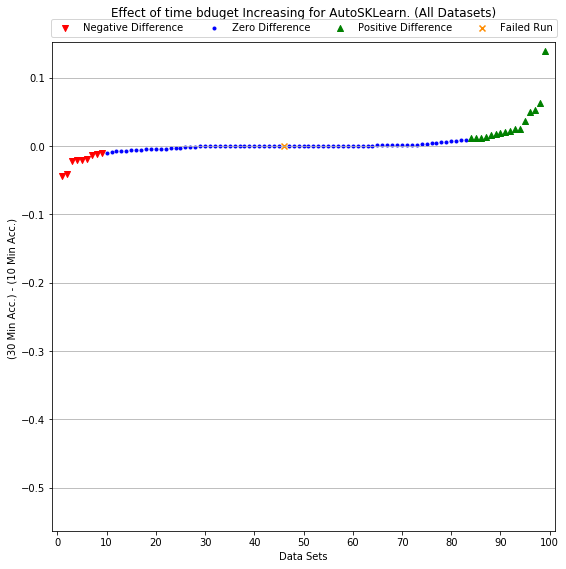

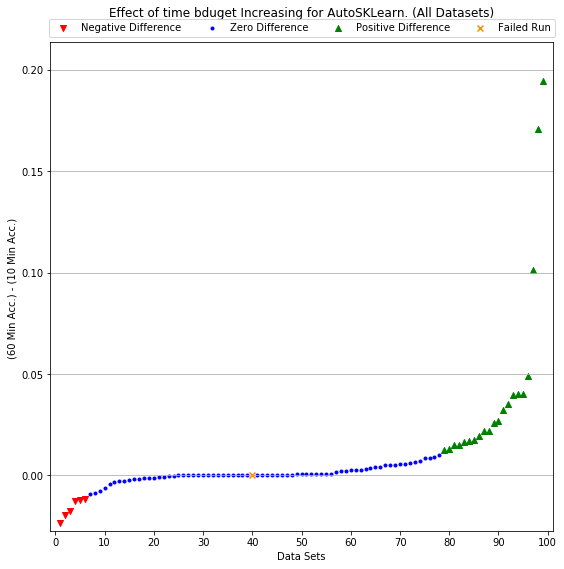

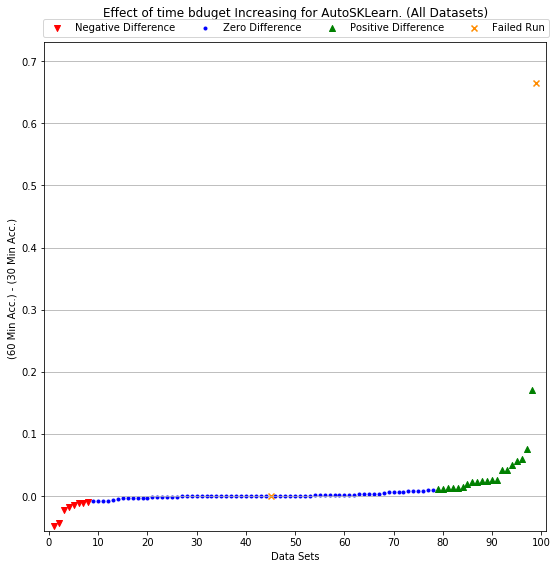

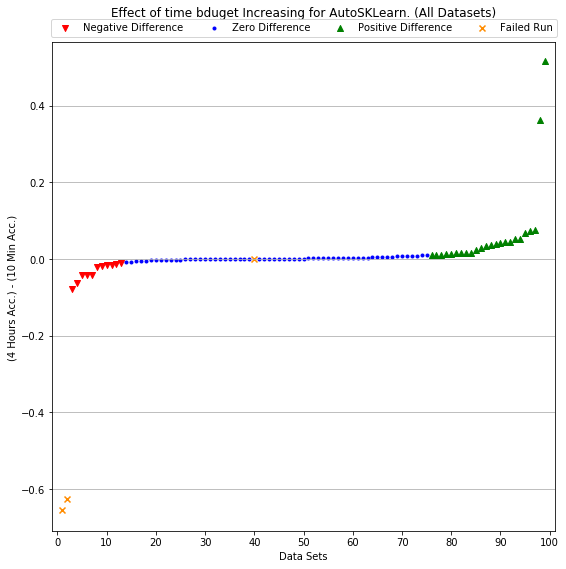

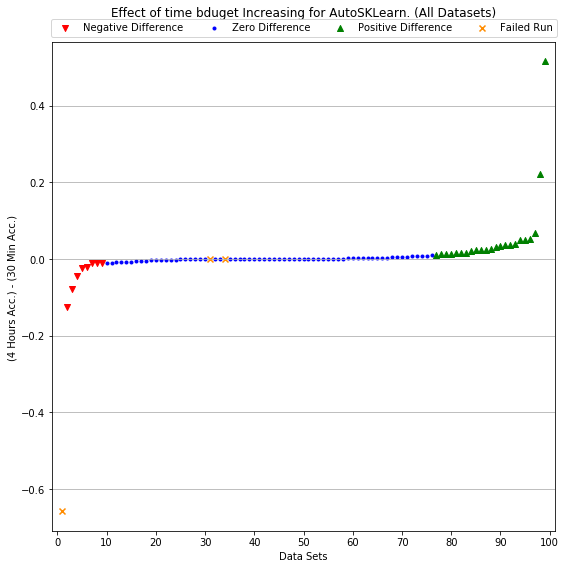

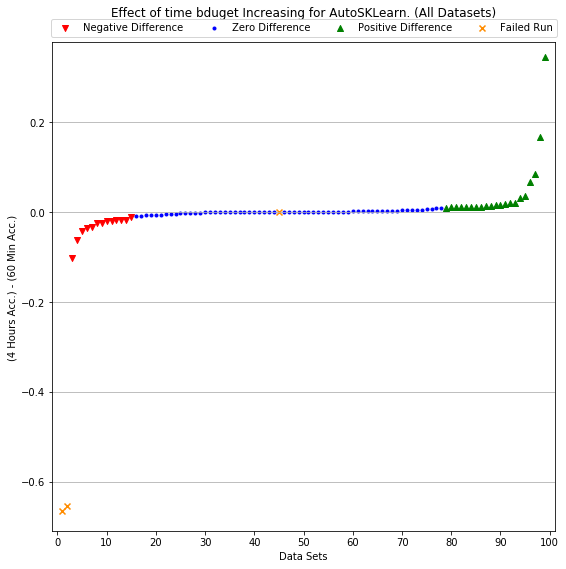

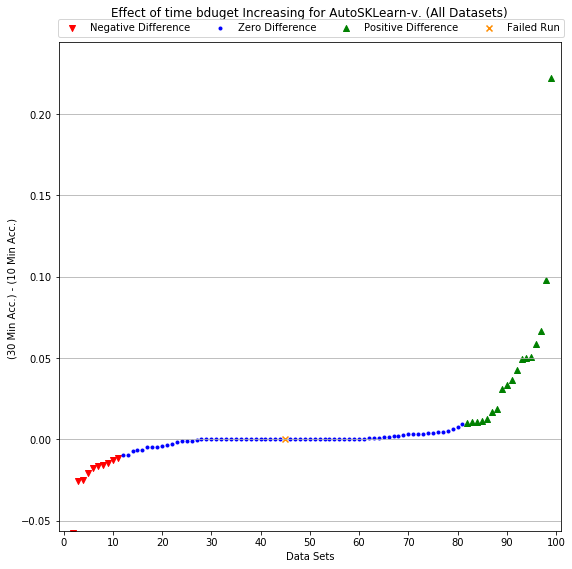

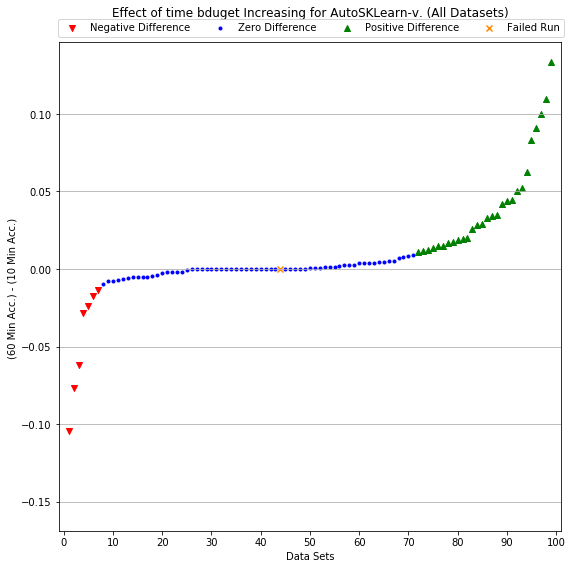

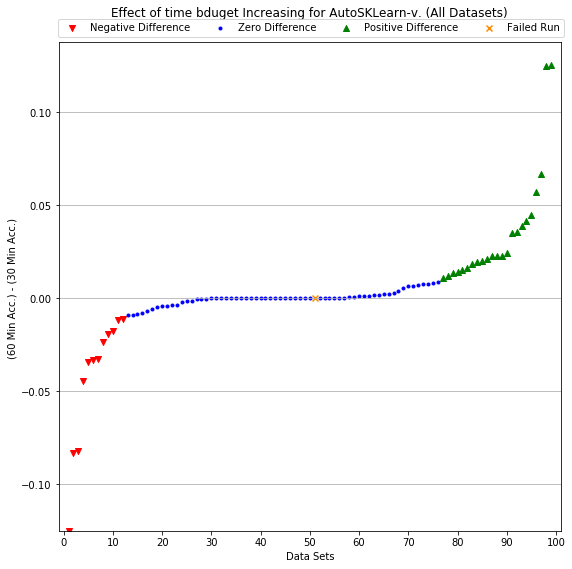

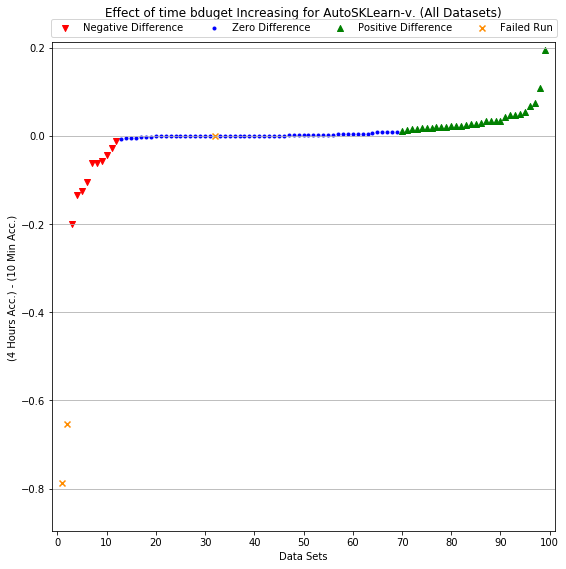

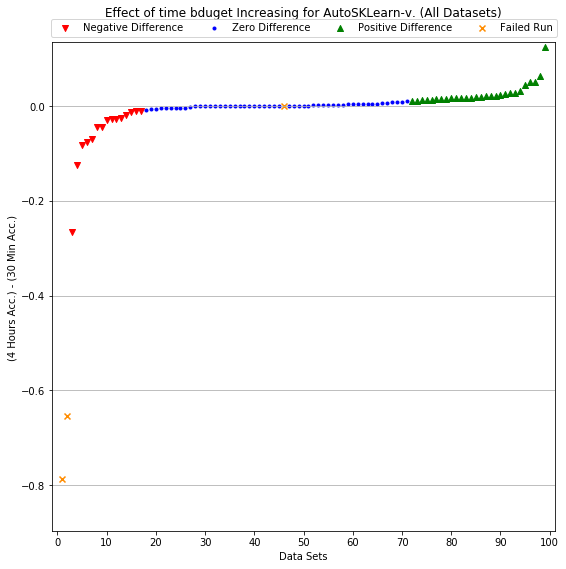

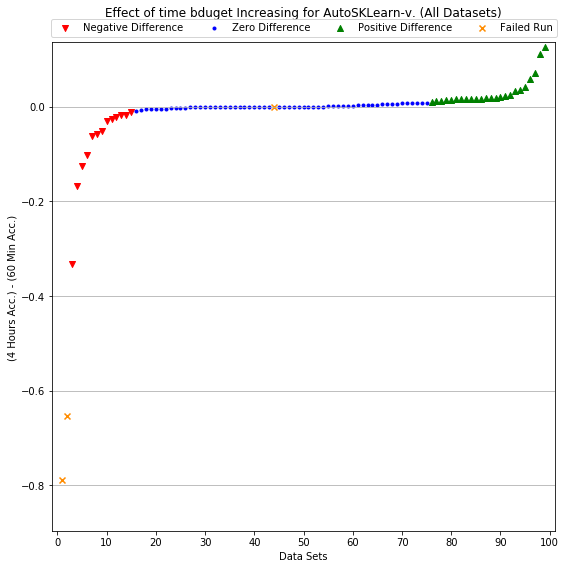

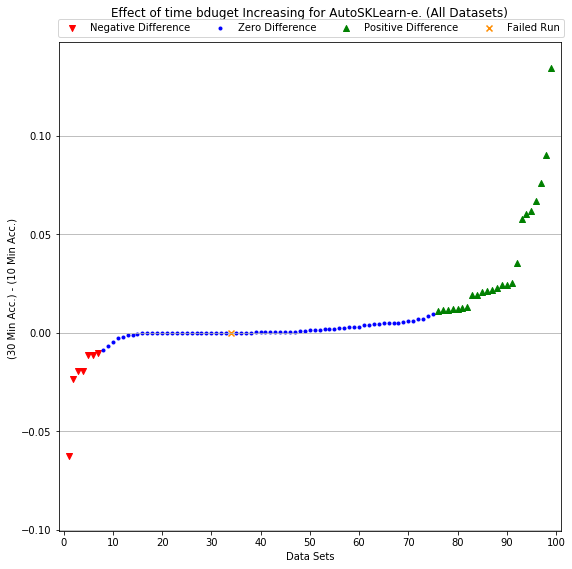

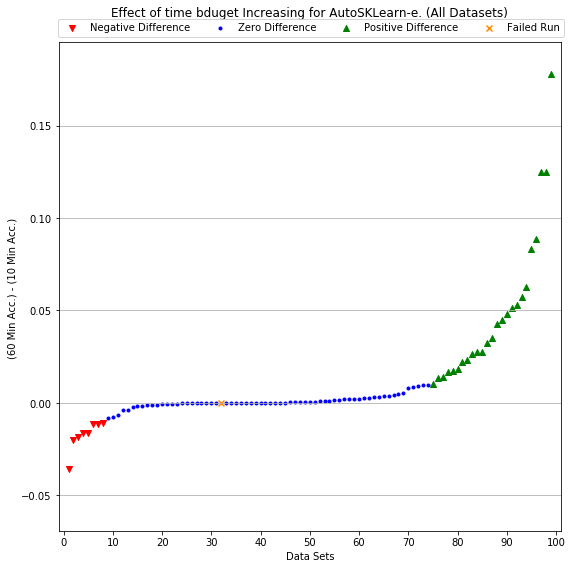

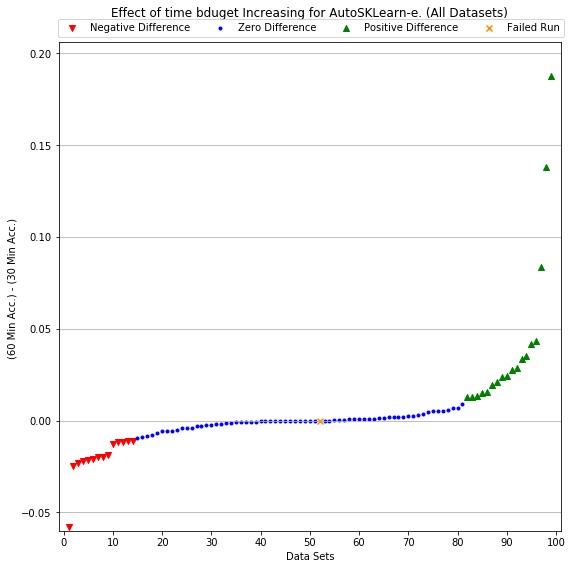

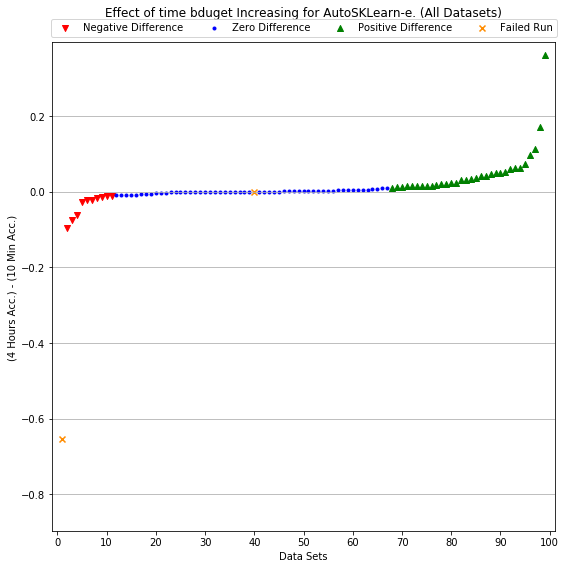

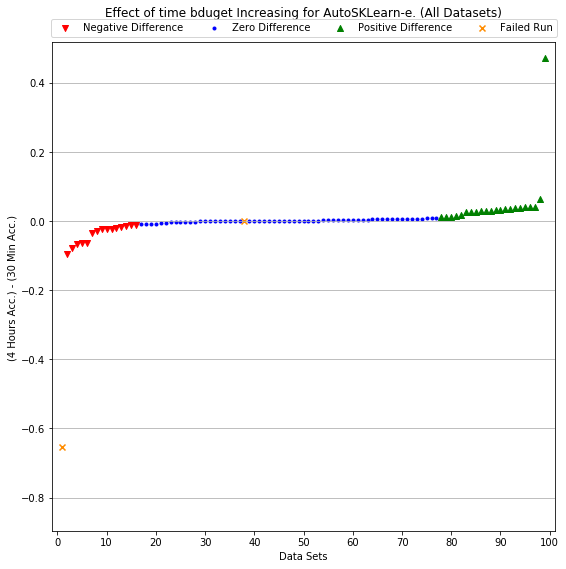

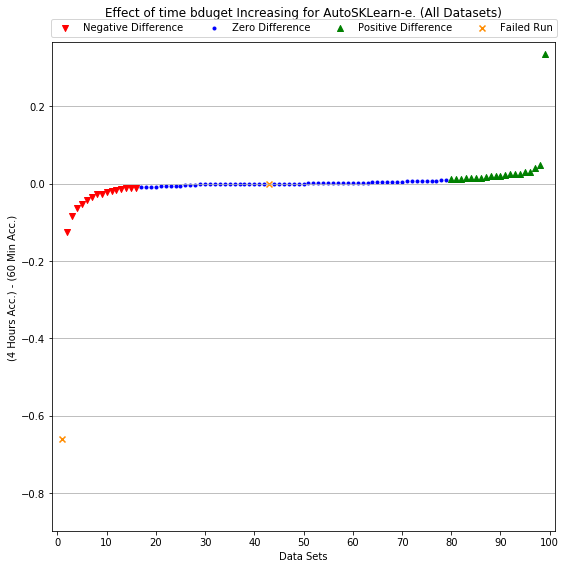

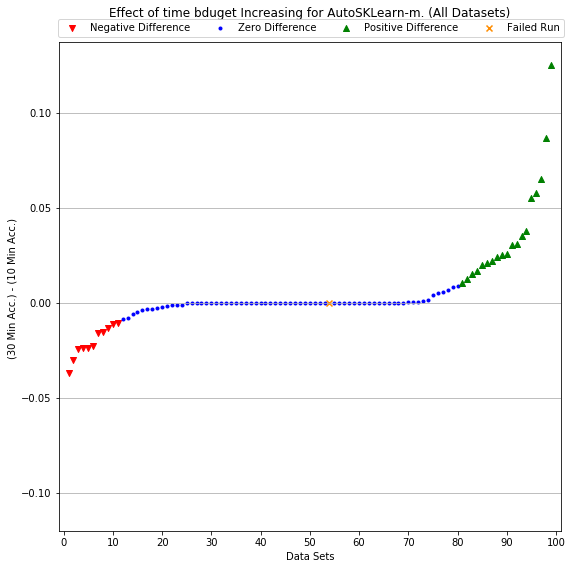

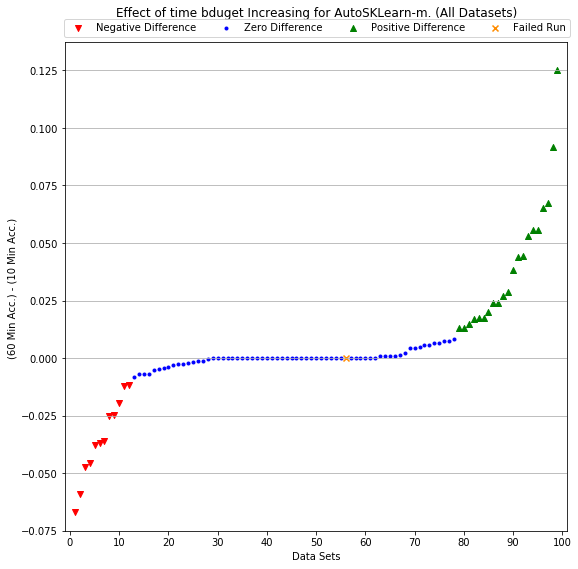

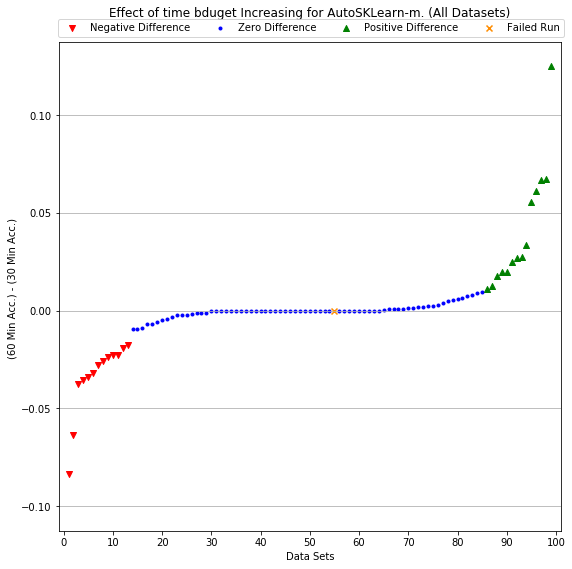

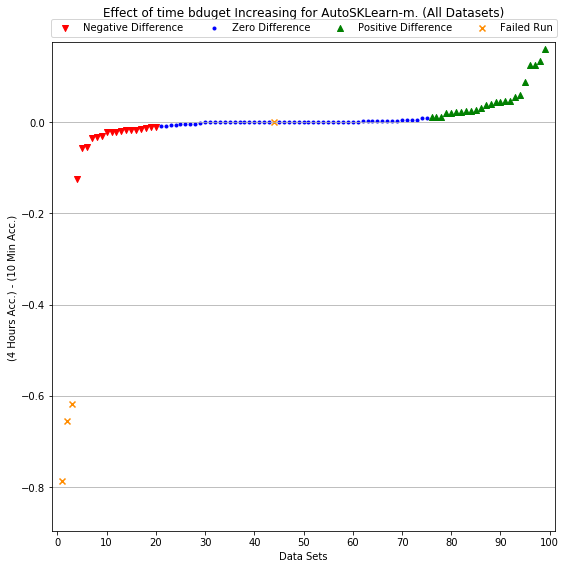

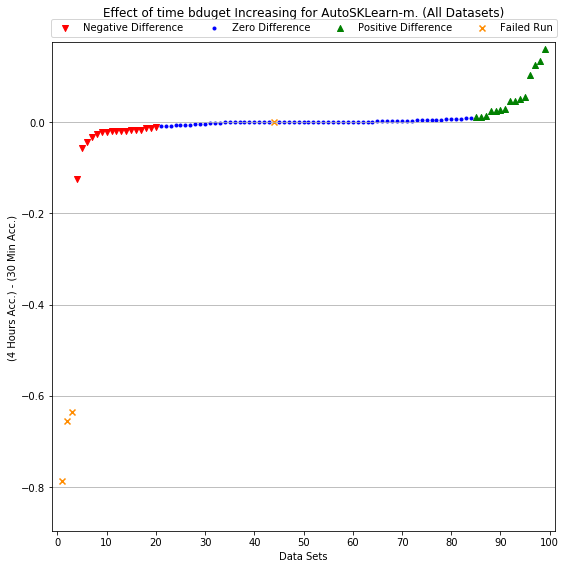

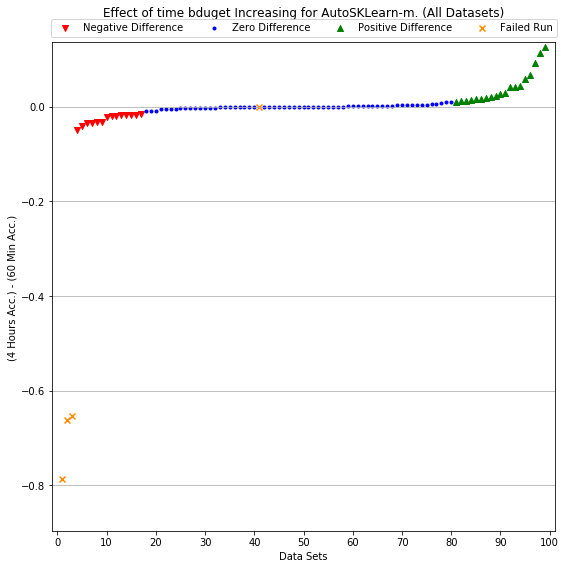

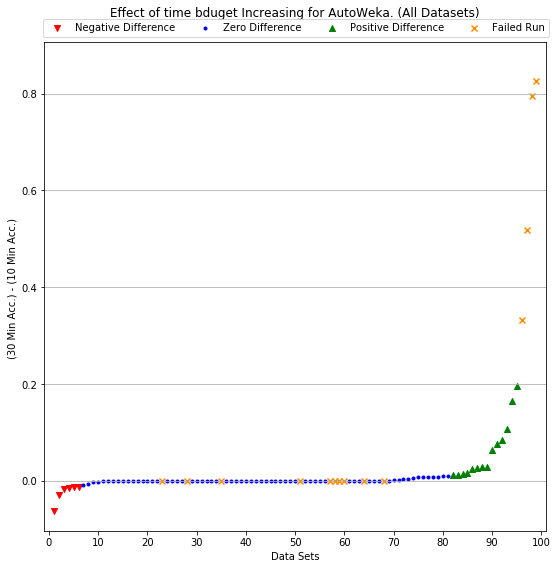

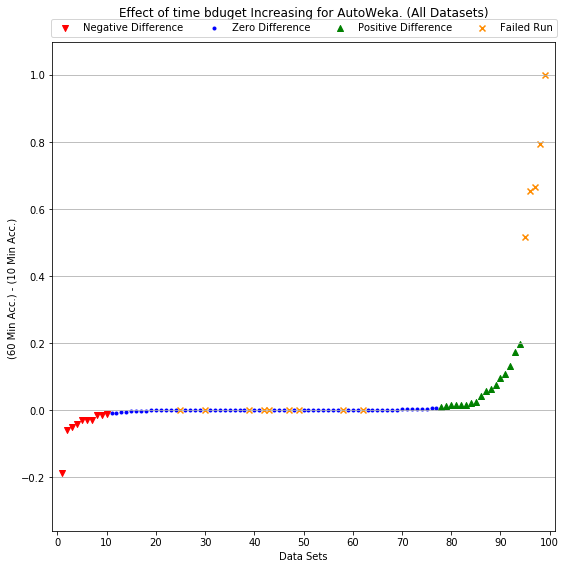

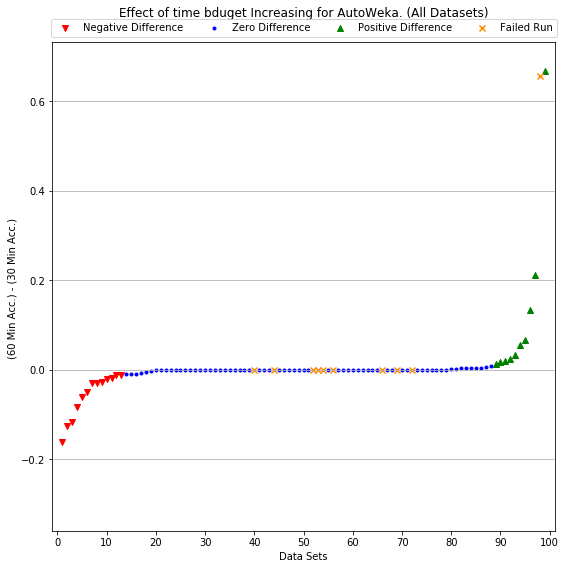

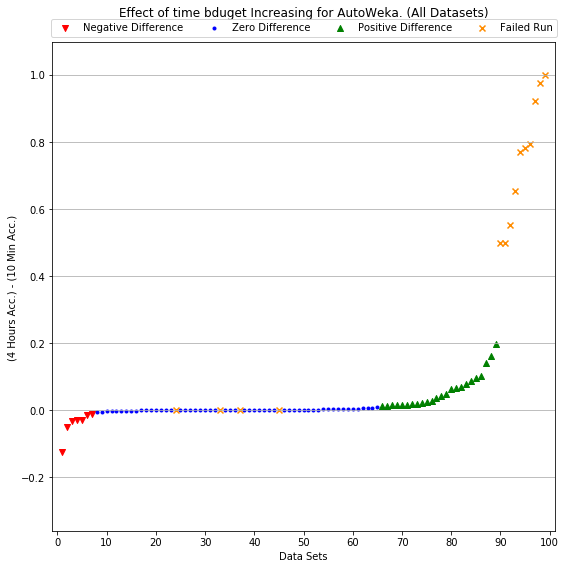

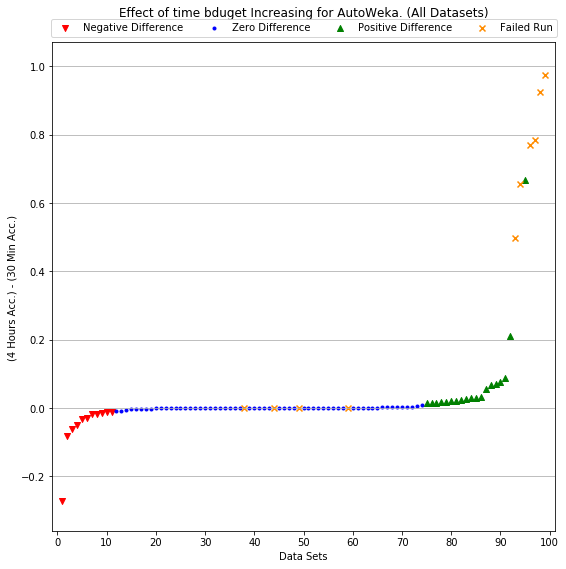

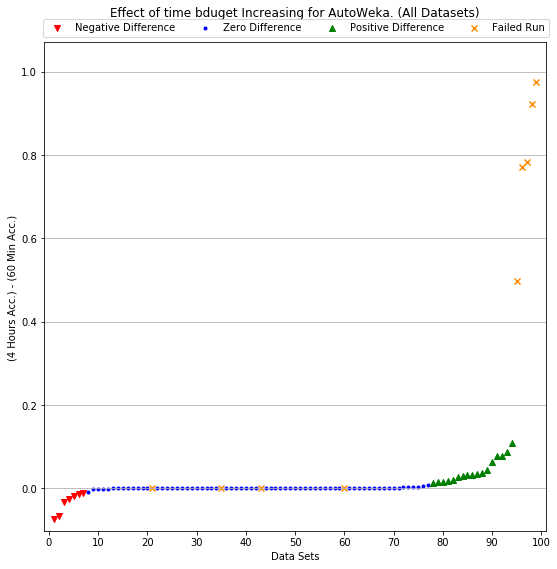

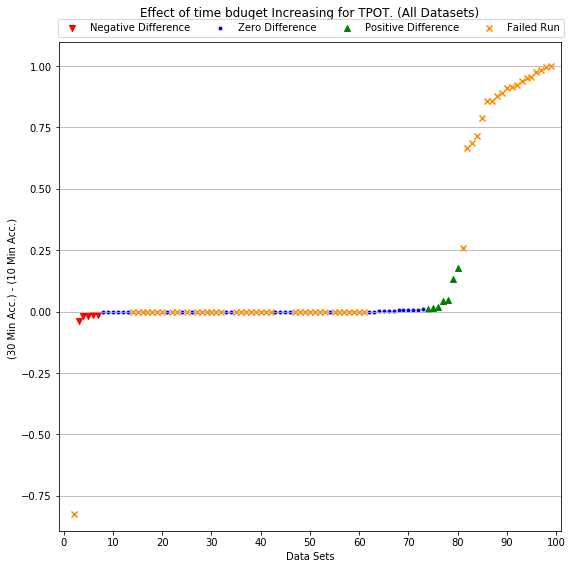

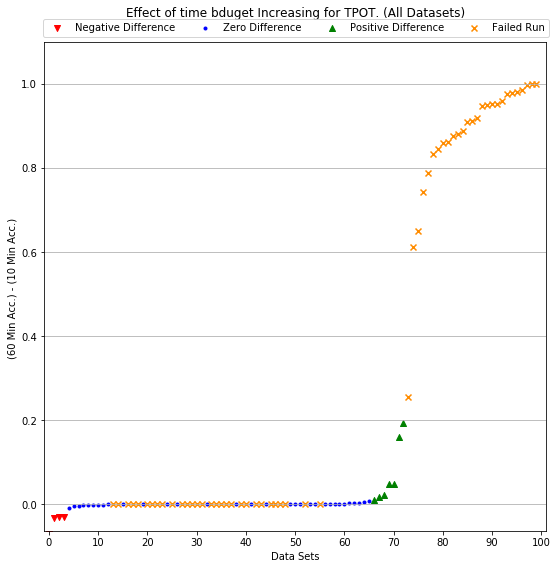

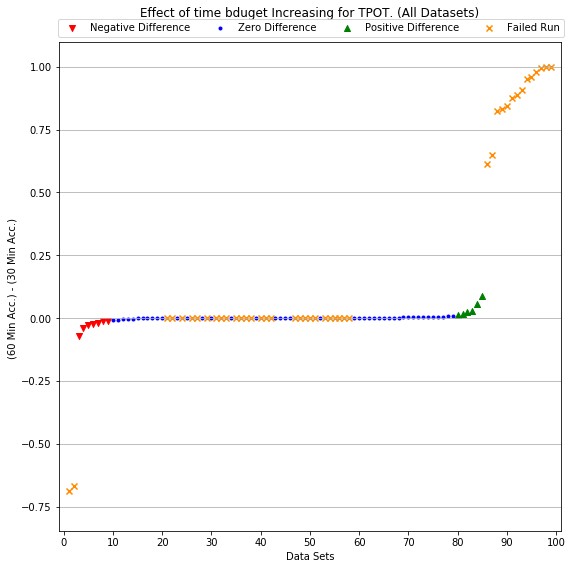

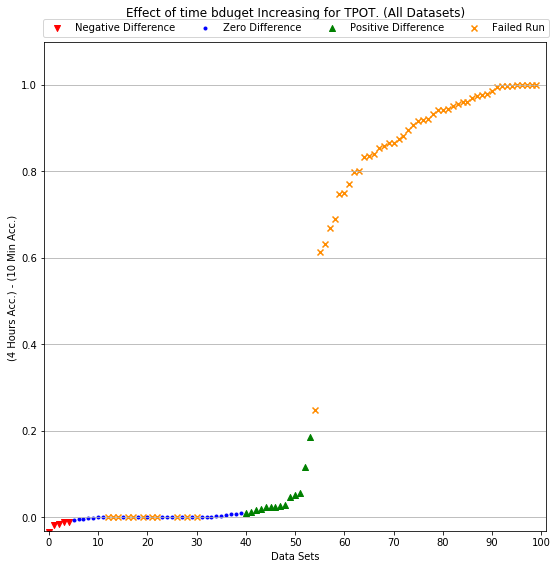

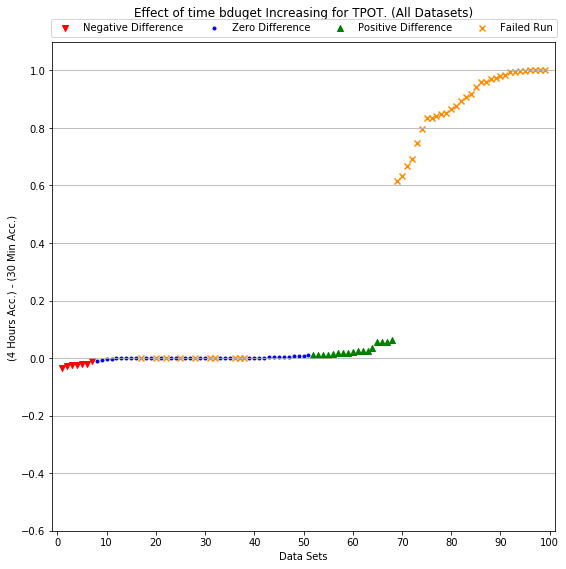

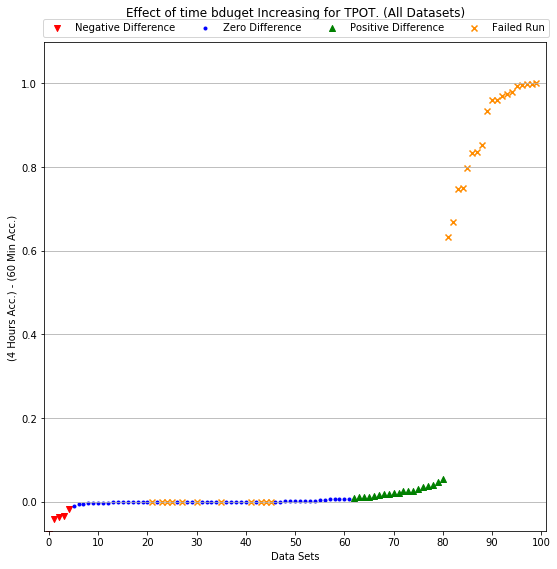

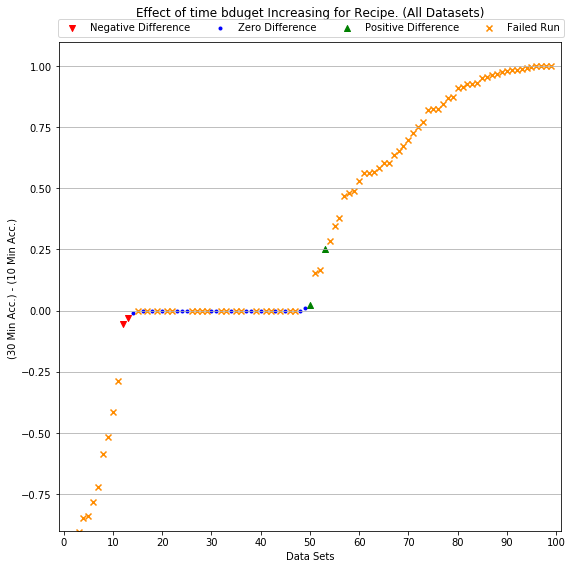

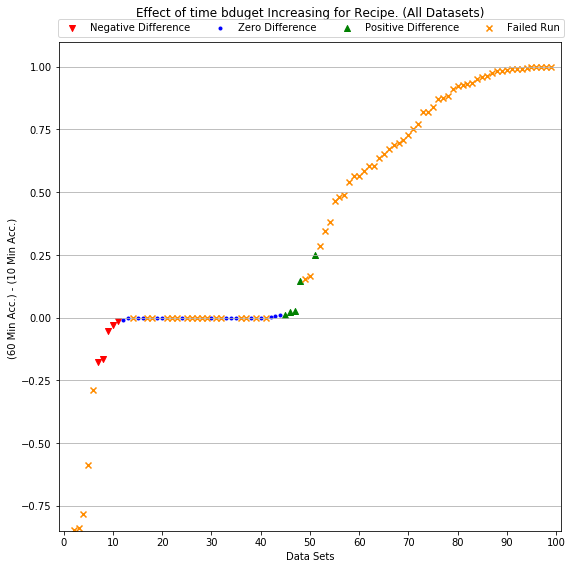

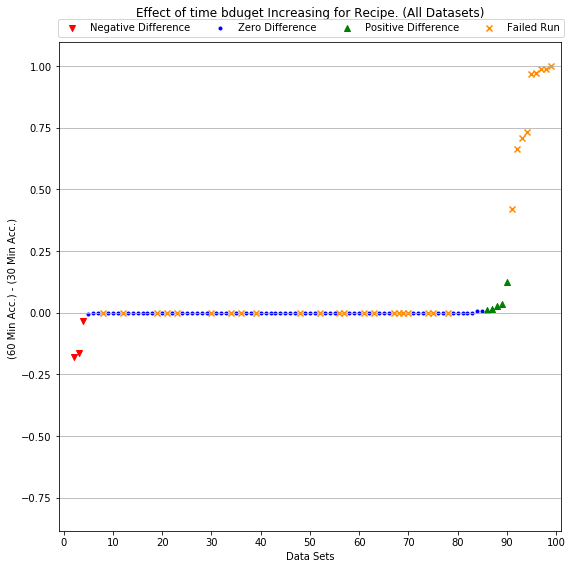

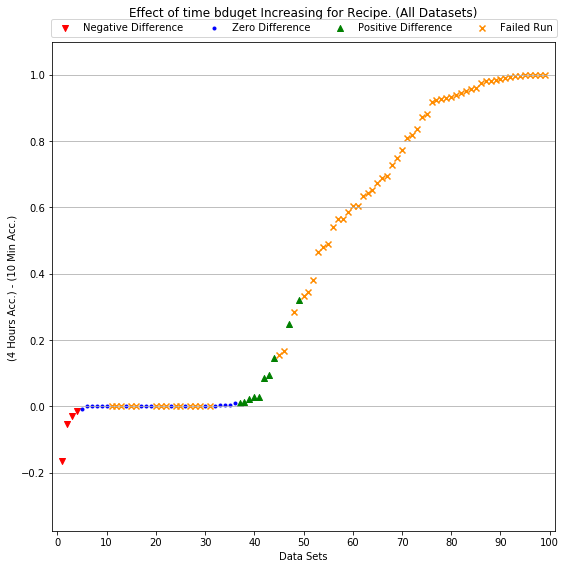

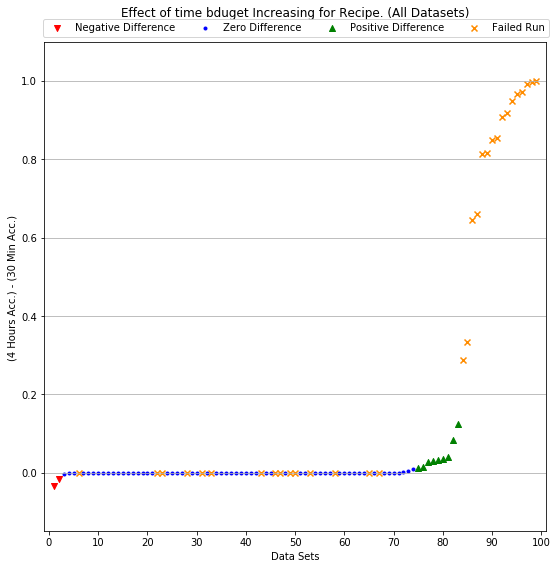

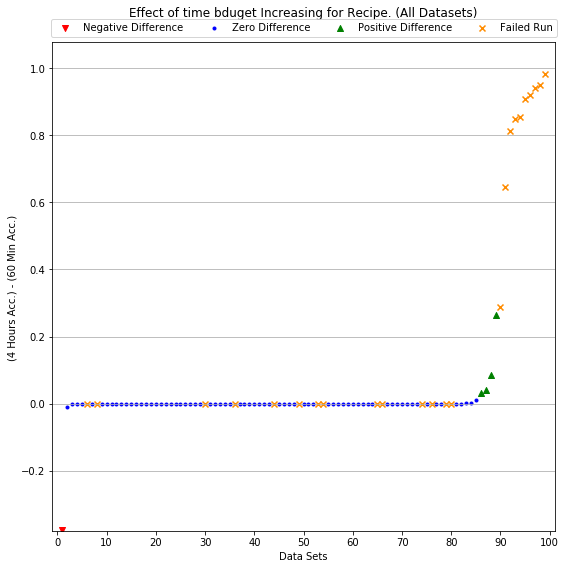

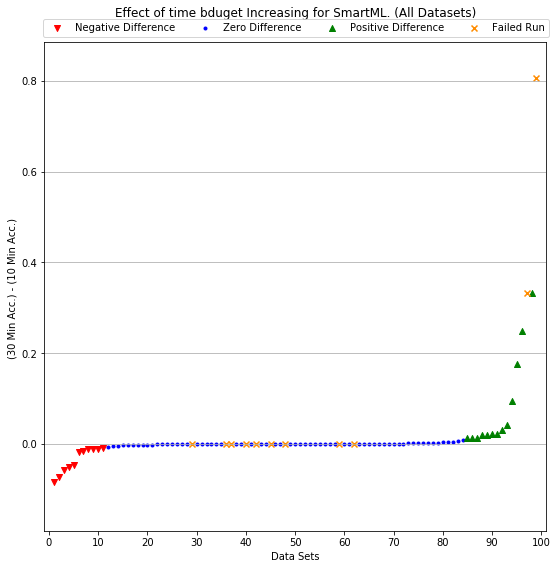

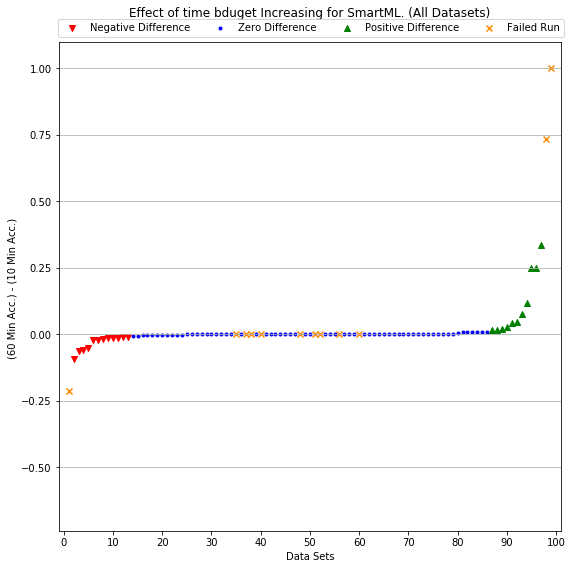

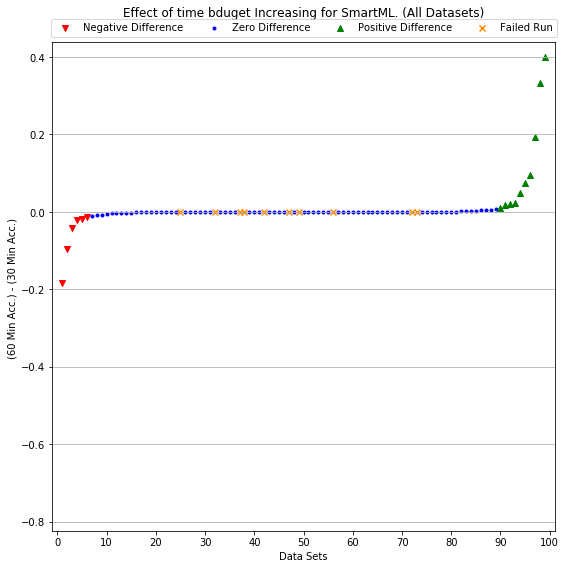

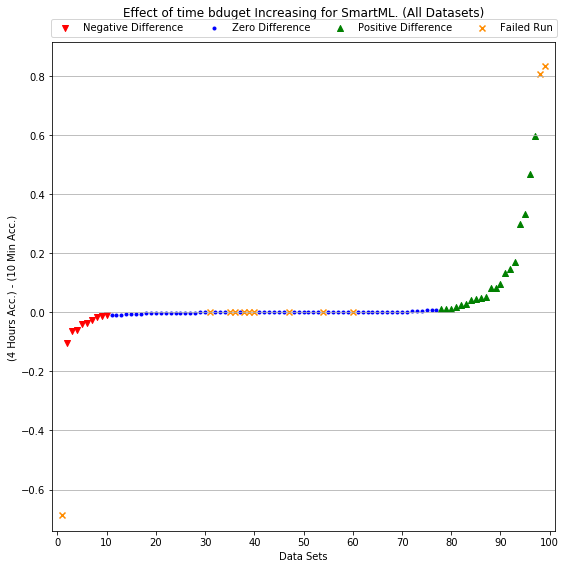

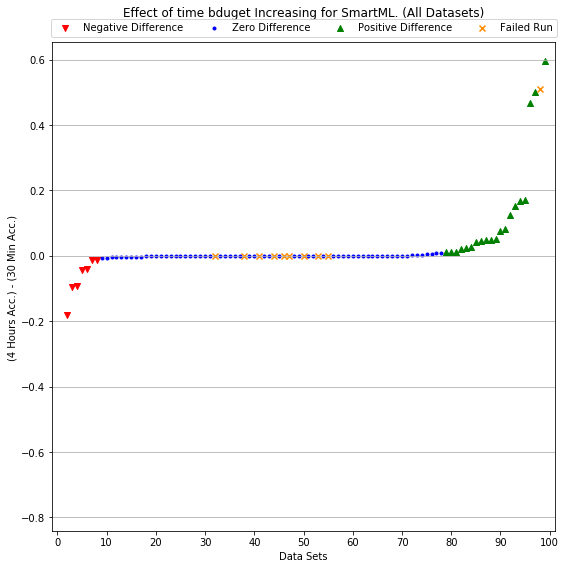

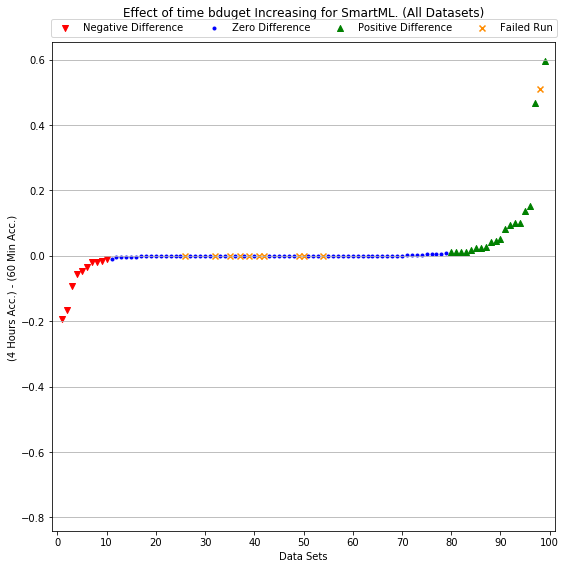

In [28]:
x_label = 'Data Sets'
tools = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m', 'AutoWeka', 'TPOT', 'Recipe', 'SmartML']
acc = ['sklearn_accuracy_mean', 'sklearn_v_accuracy_mean', 'sklearn_e_accuracy_mean', 'sklearn_m_accuracy_mean',
            'autoweka_accuracy_mean', 'tpot_accuracy_mean', 'recipe_test_acc', 'smartml_valid_acc']
t =  ['10 Min', '30 Min', '60 Min', '4 Hours']
for tool, acc in zip(tools,acc):
    for i in range(1, len(t)):
        for j in range(i):
            fig = Figure()
            first = fig.get_sheet()[t[i]].loc[:, acc]
            second = fig.get_sheet()[t[j]].loc[:, acc]
            y_lable = '(' + t[i] + ' Acc.) - (' + t[j] + ' Acc.) '
            title = 'Effect of time bduget Increasing for '+ tool +'.'
            fig.compare_acc_scatter(first, second, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=None)

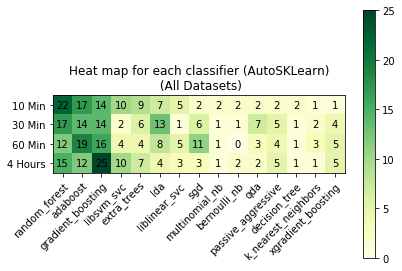

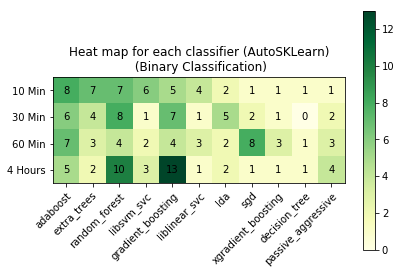

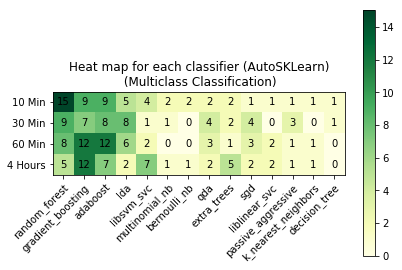

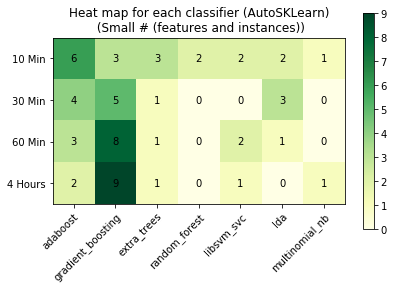

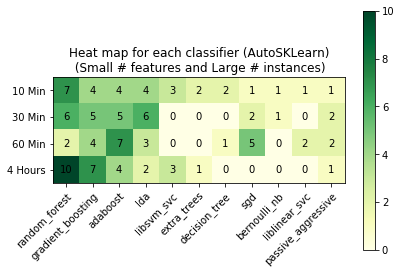

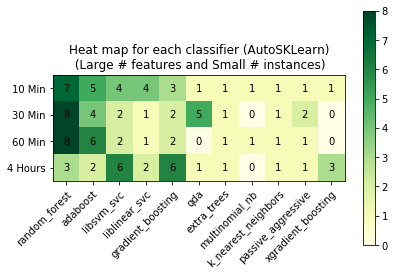

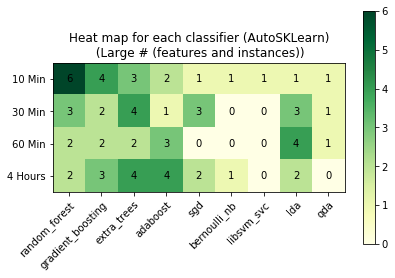

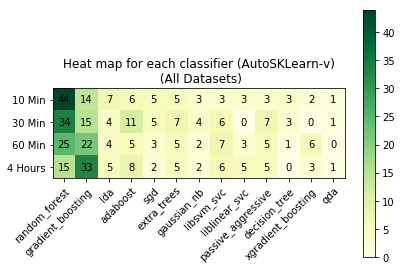

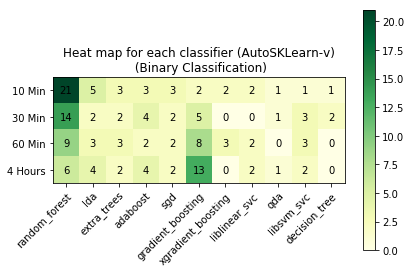

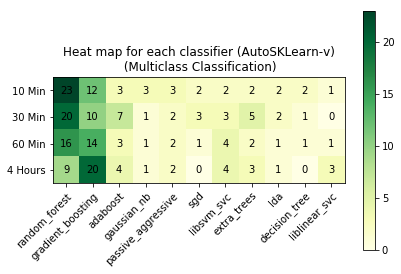

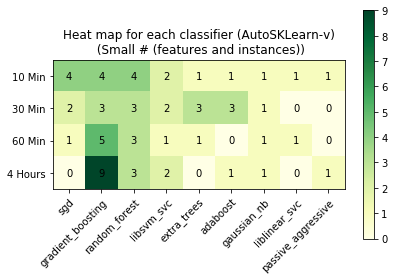

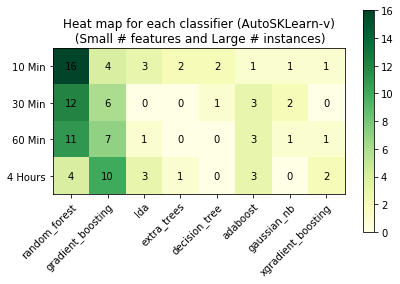

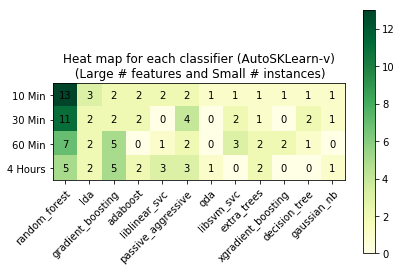

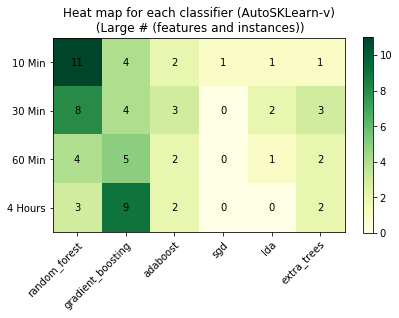

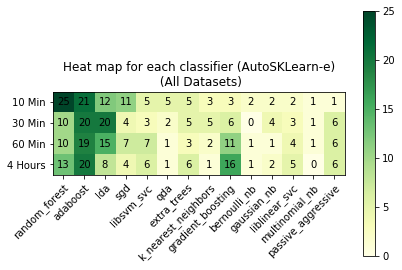

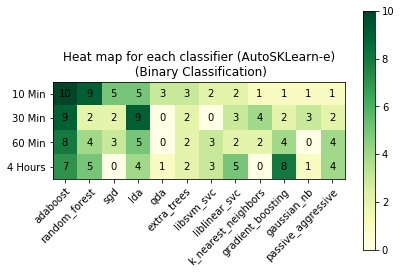

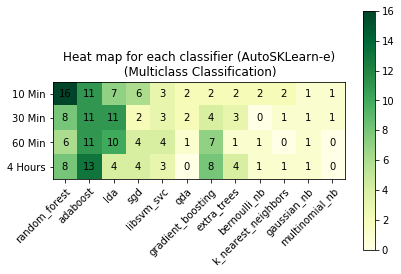

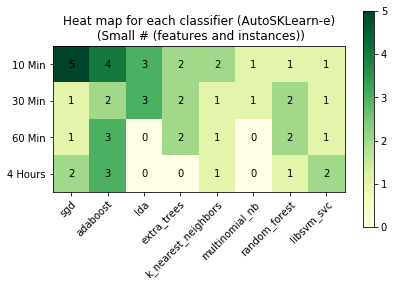

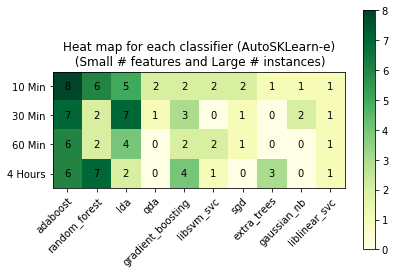

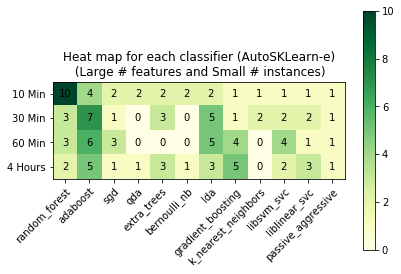

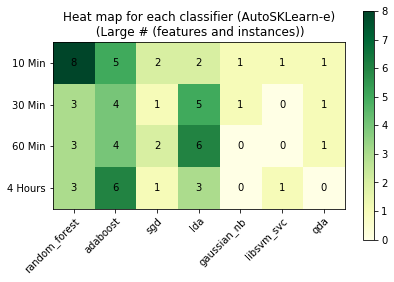

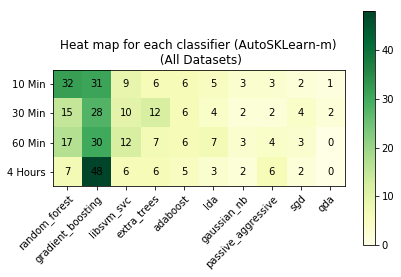

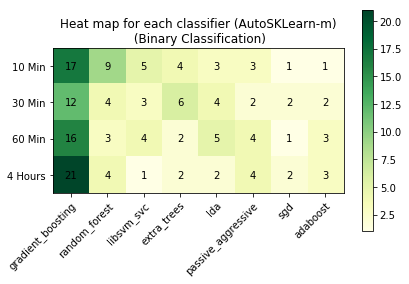

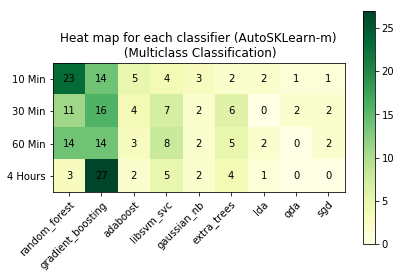

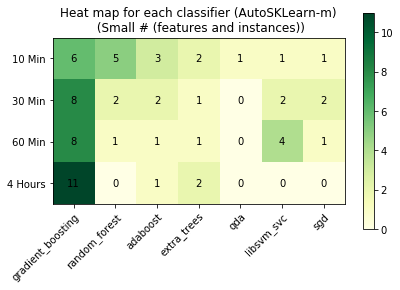

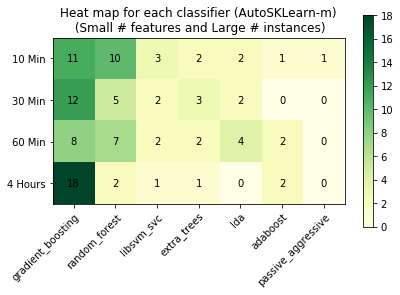

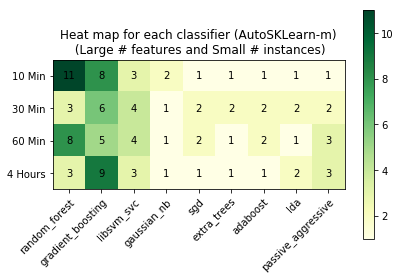

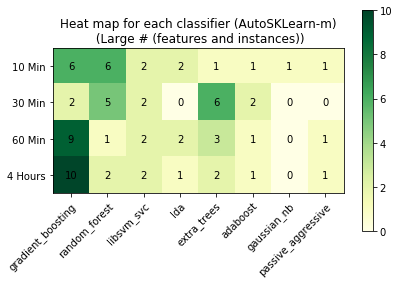

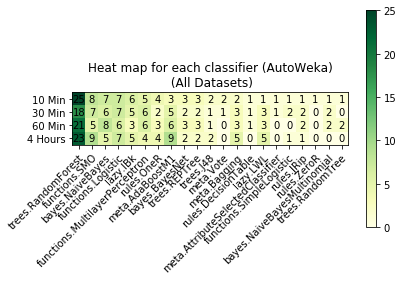

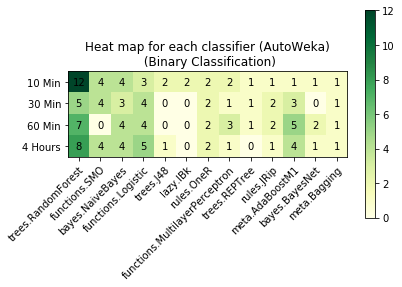

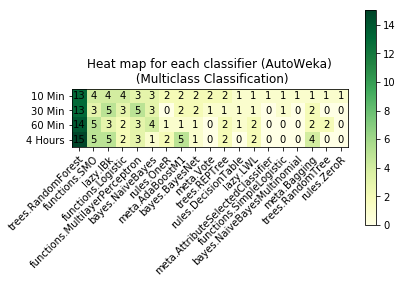

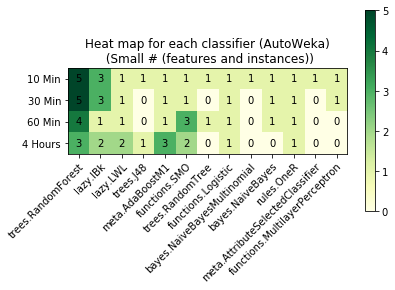

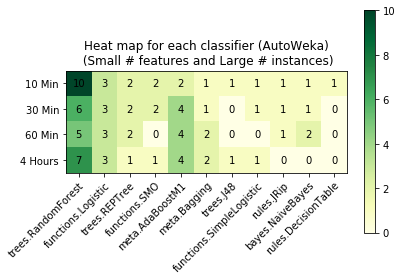

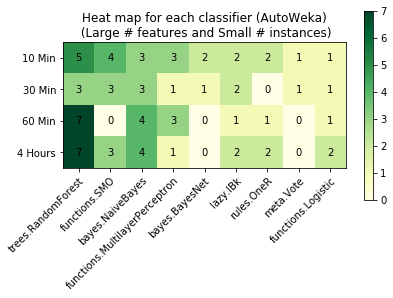

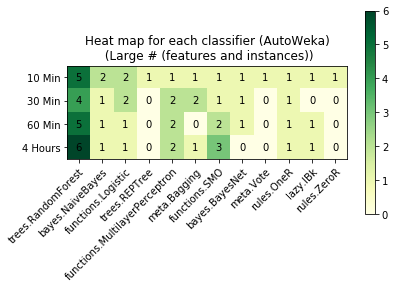

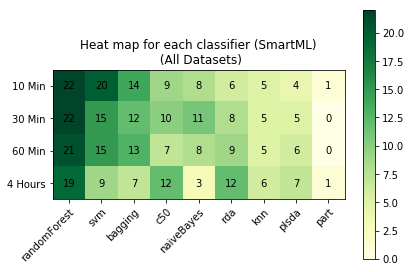

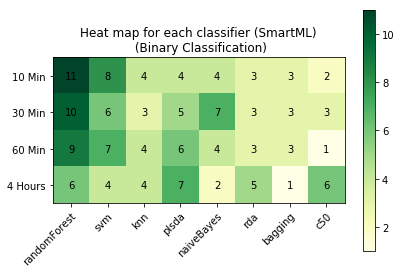

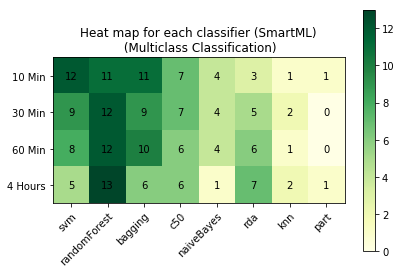

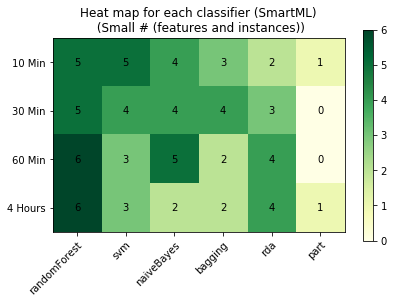

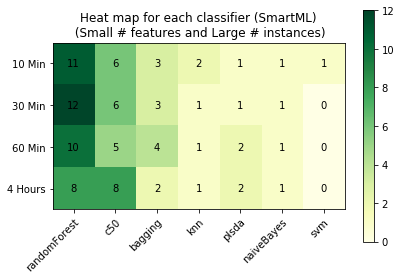

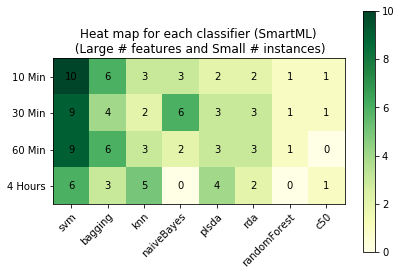

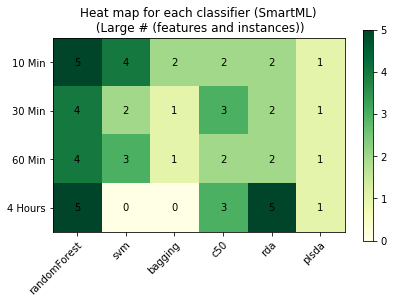

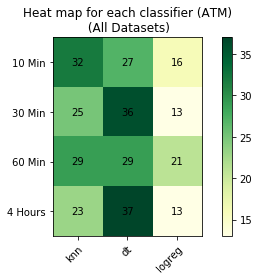

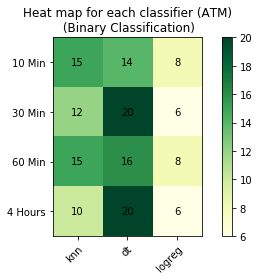

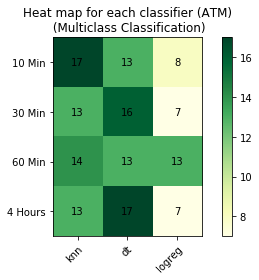

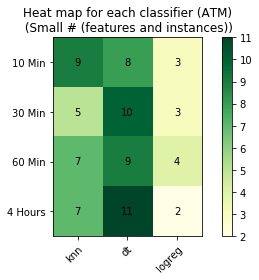

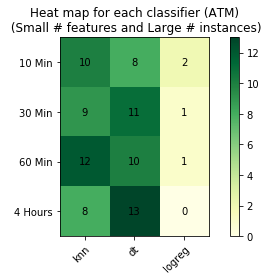

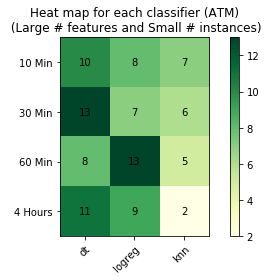

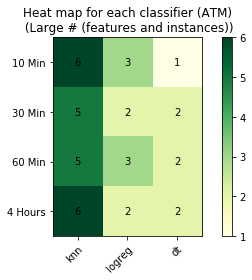

In [29]:
tools = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m', 'AutoWeka', 'SmartML', 'ATM']
models = ['sklearn_model_1', 'sklearn_v_model_1', 'sklearn_e_model_1', 'sklearn_m_model_1',
            'autoweka_model_1', 'smartml_model', 'ATM_classifier']
for tool, model in zip(tools,models):
    fig = Figure()
    fig.draw_heat_map(model, tool, divide_data=True)

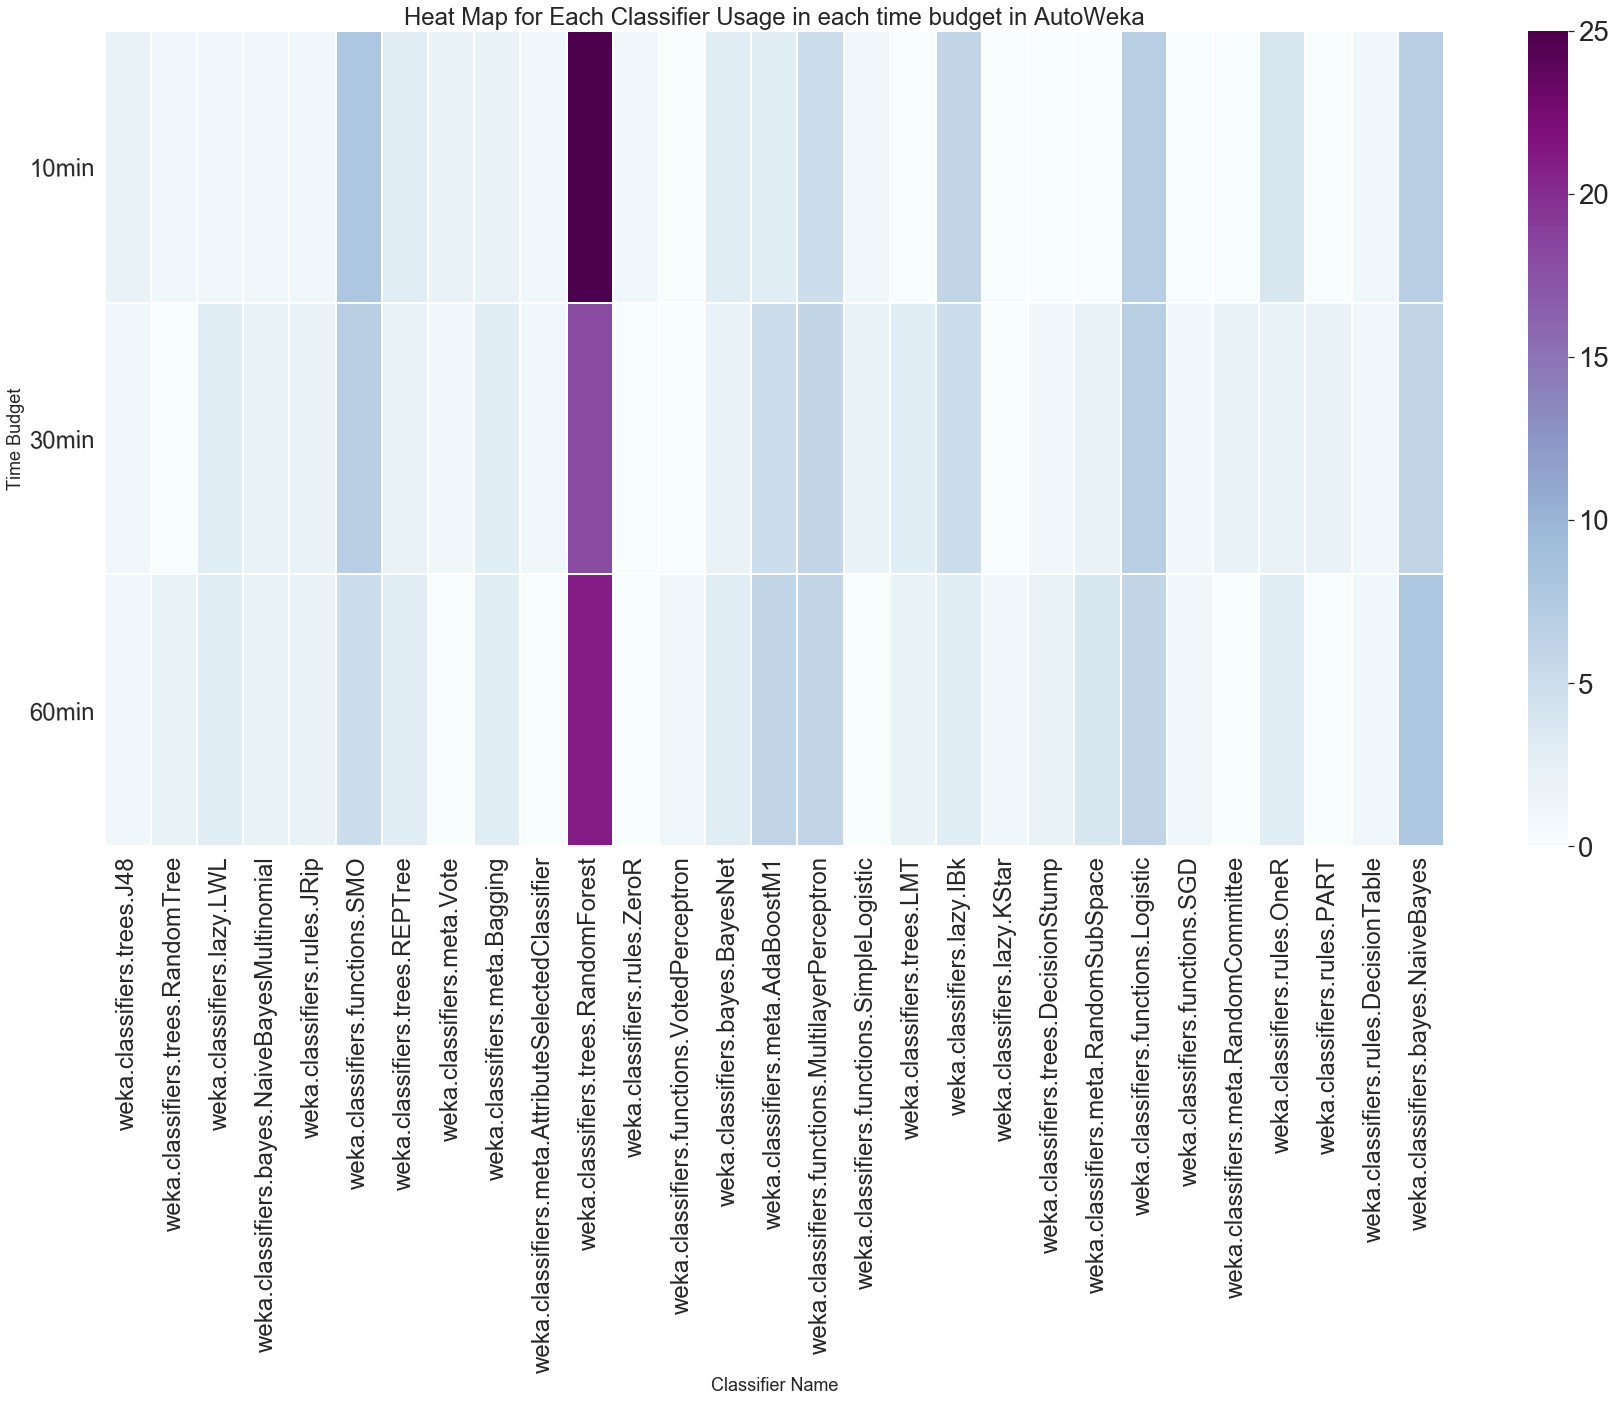

In [30]:
#### Most frequesnt classifiers chosen by AutoWeka
Image('weka_most.png')

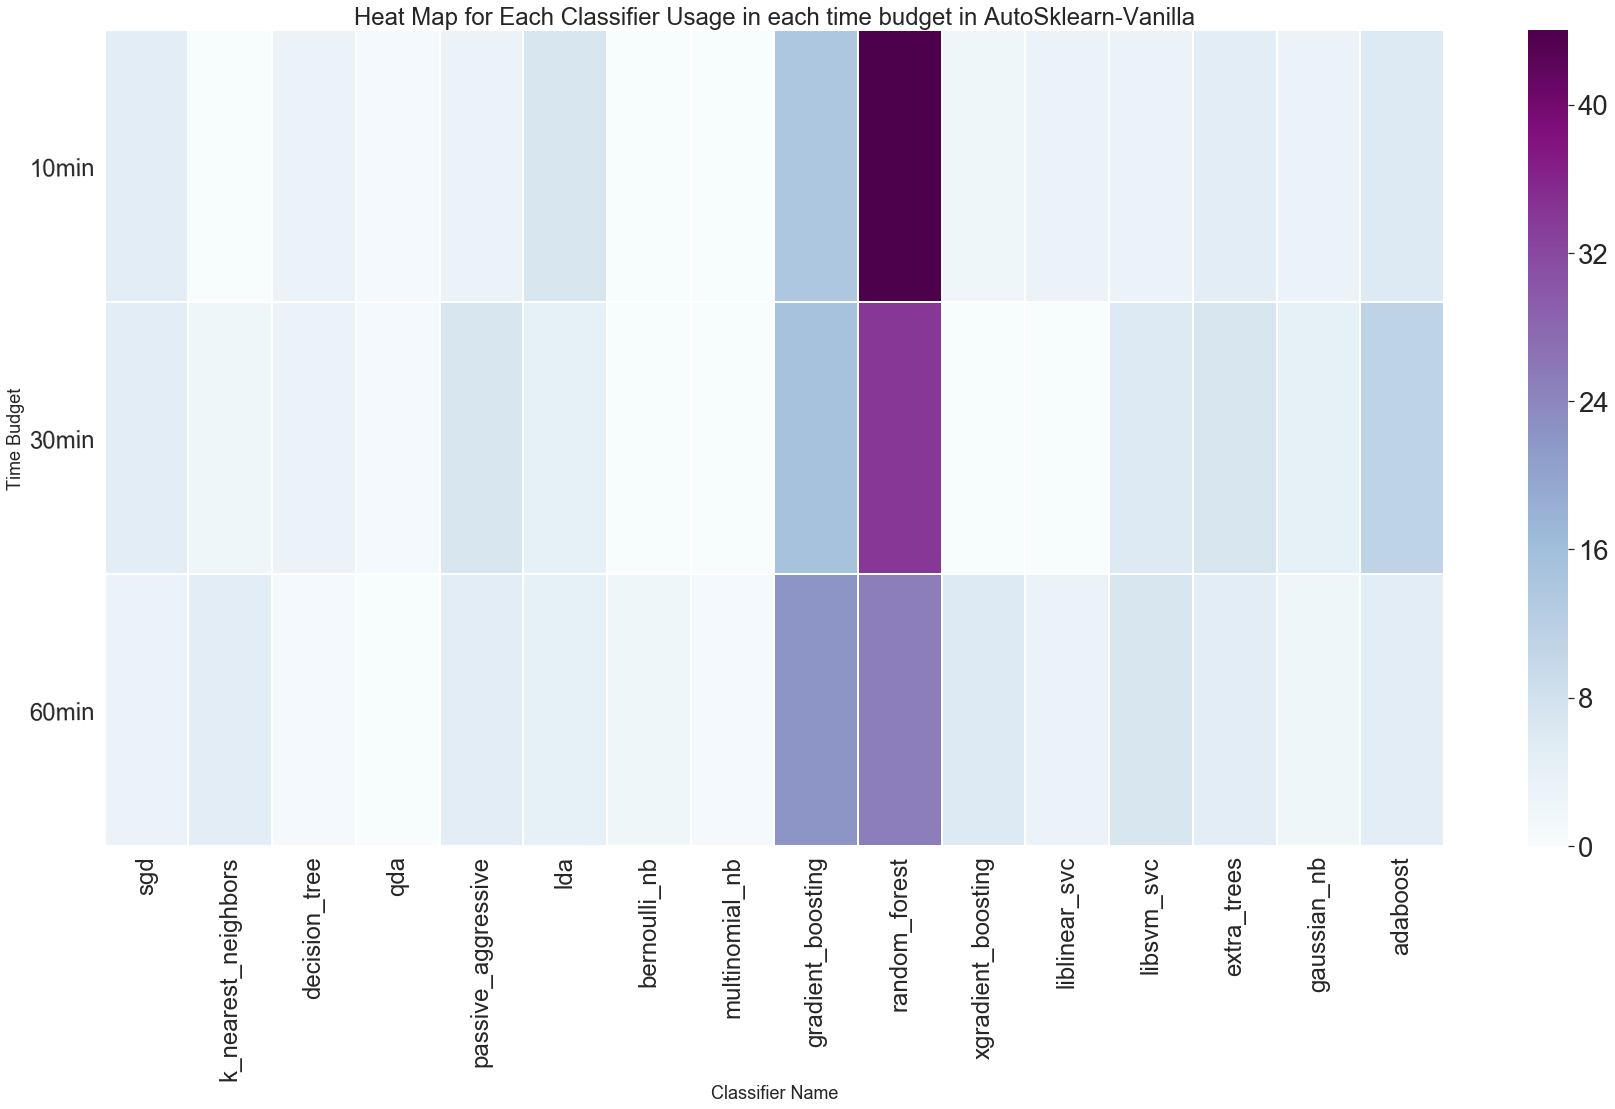

In [31]:
#### Most frequesnt classifiers chosen by AutoSklearn
Image('sklearn_most.png')

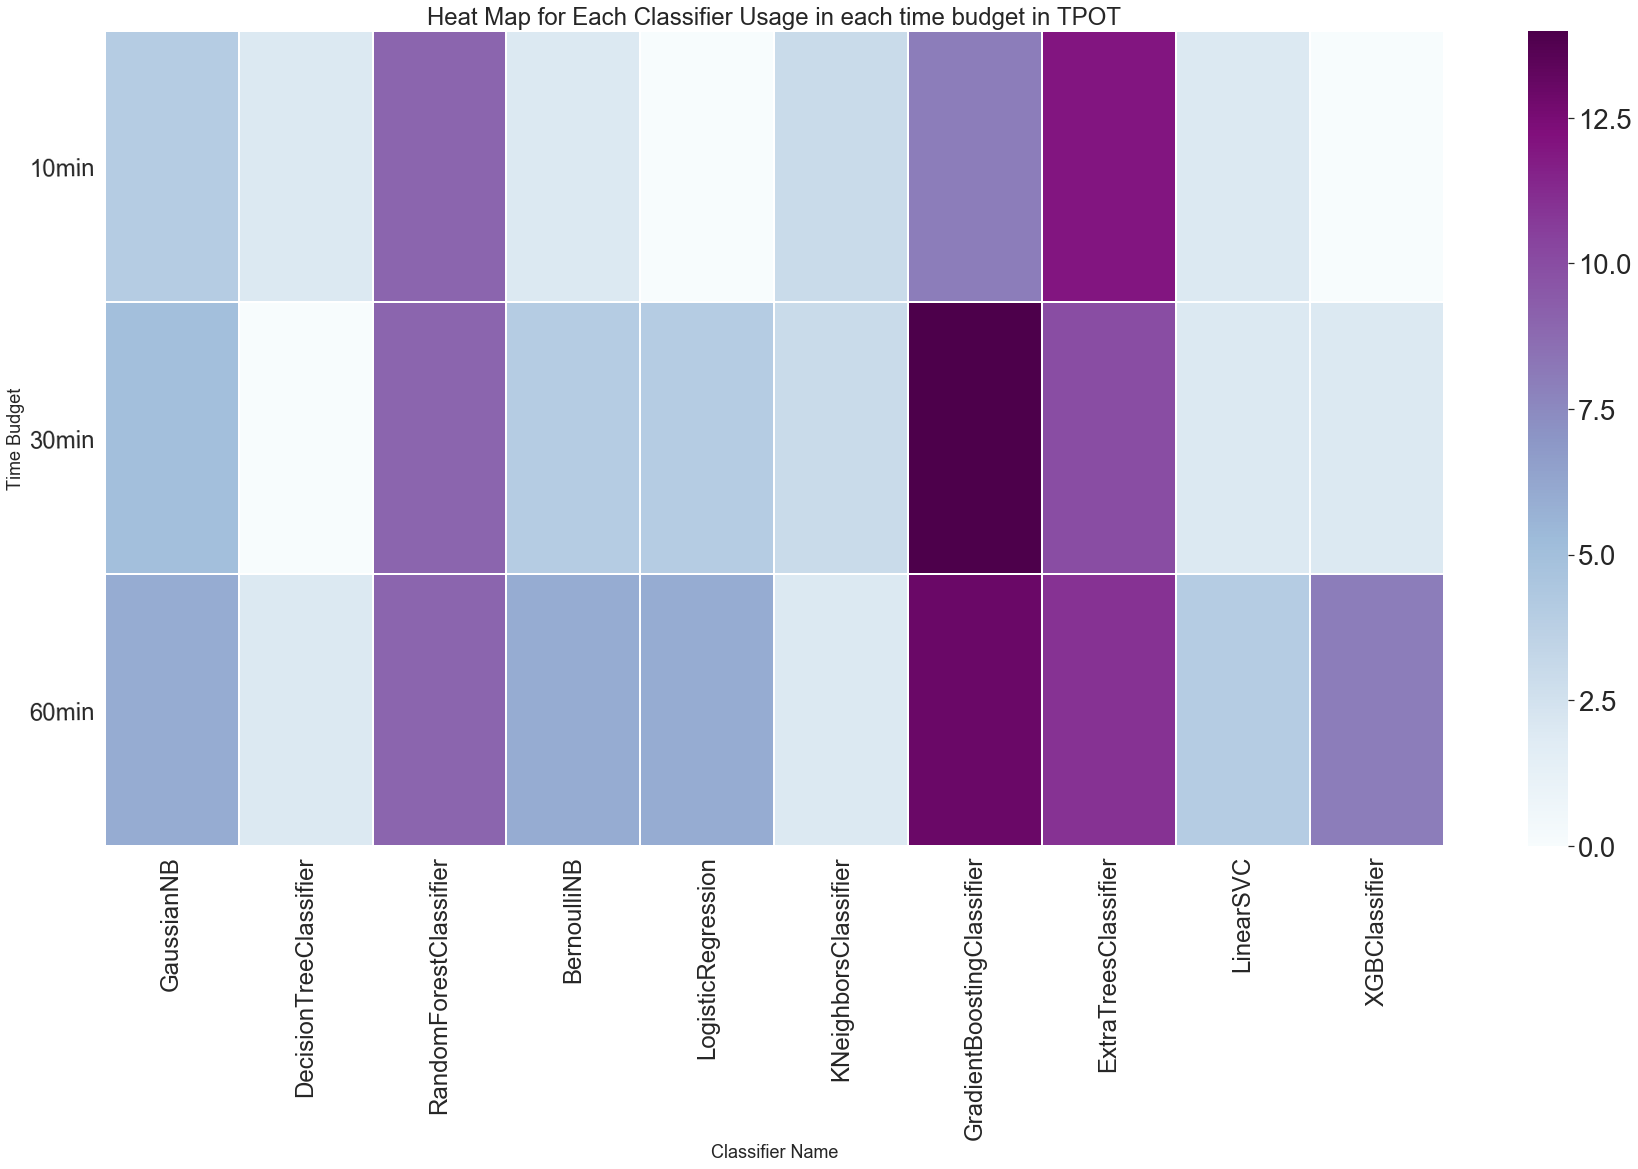

In [32]:
#### Most frequesnt classifiers chosen by TPOT
Image('tpot.png')

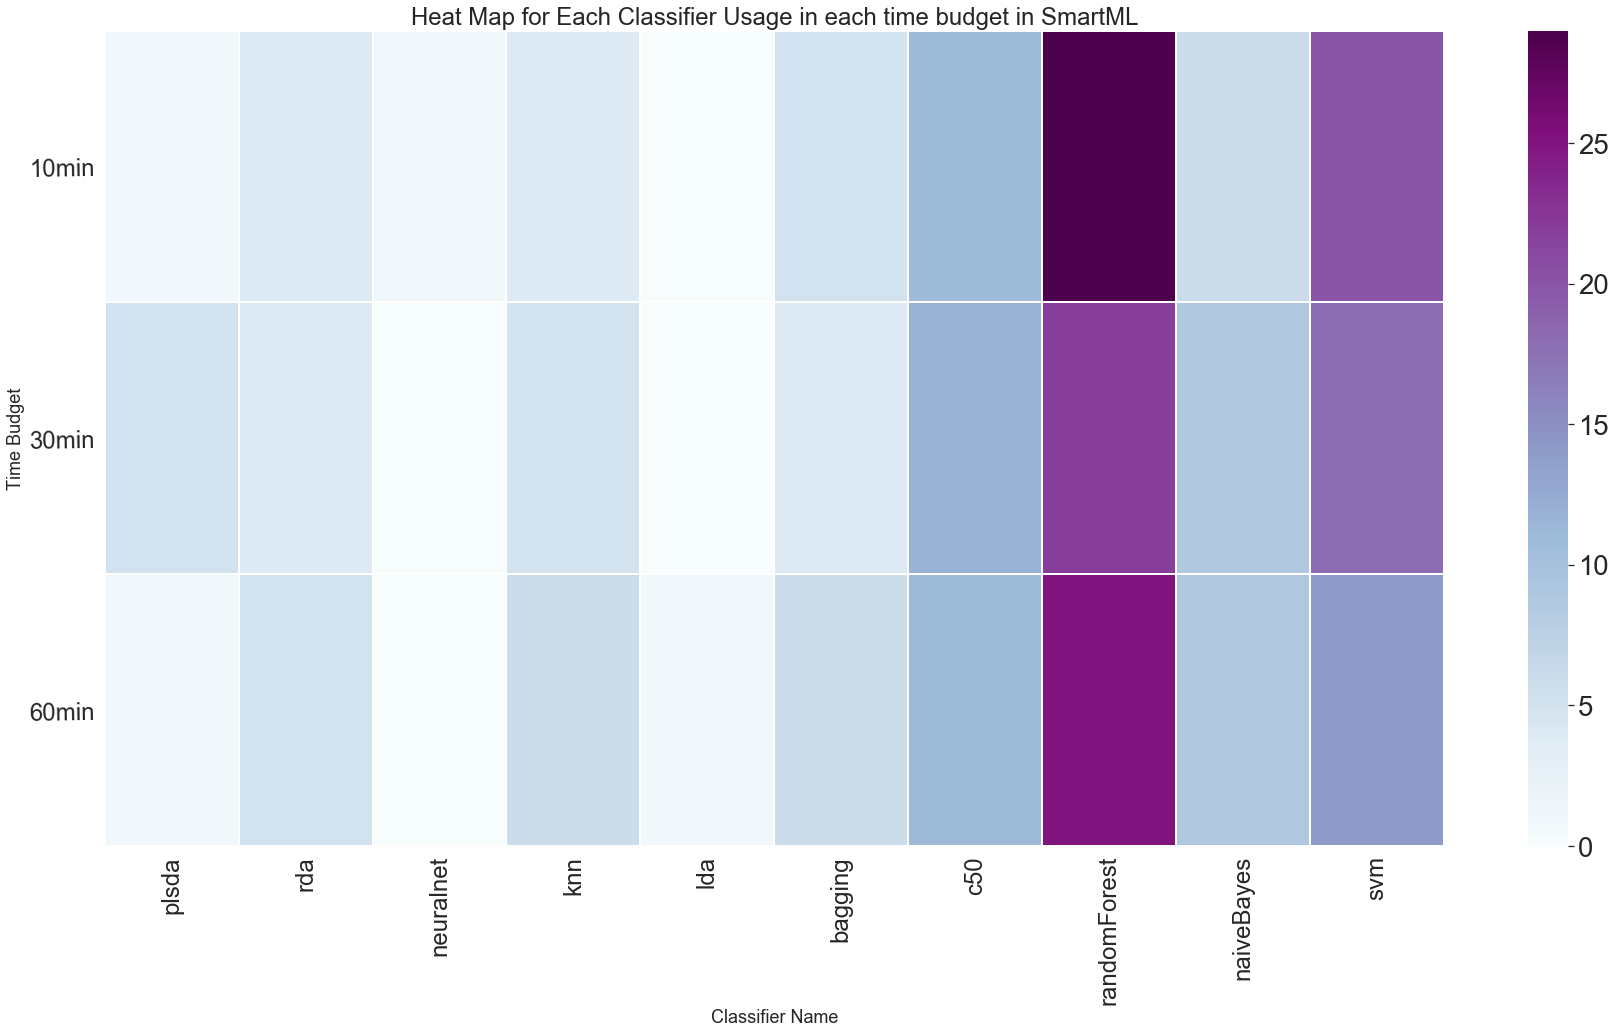

In [33]:
#### Most frequesnt classifiers chosen by SmartML
Image('smartml.png')

#  Output pipelines for datasets where TPOT outperform AutoSklearn

************ CHURN DATASET ************ <br>
<b>TPOT:</b> <br>
Pipeline(memory=None,steps=[('extratreesclassifier')]) <br><br>

<b>AutoSklearn:</b><br>
{'balancing:strategy': 'none', <br>
'categorical_encoding:__choice__': 'one_hot_encoding',  <br>
'classifier:__choice__': 'random_forest',  <br>
'imputation:strategy': 'mean', <br>
'preprocessor:__choice__': 'no_preprocessing', <br>
'rescaling:__choice__': 'standardize', <br>
'categorical_encoding:one_hot_encoding}<br><br><br>

<hr>

************ Adult DATASET ************ <br>
<b>TPOT: </b> <br>
Pipeline(memory=None, steps=[('gradientboostingclassifier')]) <br><br>

<b>AutoSklearn:</b> <br>
{'balancing:strategy': 'none', <br>
'categorical_encoding:__choice__': 'one_hot_encoding', <br>
'classifier:__choice__': 'random_forest', <br>
'imputation:strategy': 'median', <br>
'preprocessor:__choice__': 'feature_agglomeration', <br>
'rescaling:__choice__': 'robust_scaler', <br>
'categorical_encoding:one_hot_encoding} <br><br><br>

<hr>

************ Yeast DATASET ************ <br>
<b>TPOT: </b> <br>
Pipeline(memory=None, steps=[('randomforestclassifier')]) <br><br>

<b>AutoSklearn:</b> <br>
{'balancing:strategy': 'none', <br>
'categorical_encoding:__choice__': 'one_hot_encoding', <br>
'classifier:__choice__': 'extra_trees', <br>
'imputation:strategy': 'median', <br>
'preprocessor:__choice__': 'feature_agglomeration', <br>
'rescaling:__choice__': 'normalize', <br>
'categorical_encoding:one_hot_encoding } <br><br><br>

<hr>

************ Eucalputus DATASET ************<br>
<b>TPOT:</b><br>
Pipeline(memory=None, steps=[('polynomialfeatures', 'gradientboostingclassifier')])<br><br>


<b>AutoSklearn:</b><br>
({'balancing:strategy': 'none', <br>
'categorical_encoding:__choice__': 'no_encoding', <br>
'classifier:__choice__': 'extra_trees', <br>
'imputation:strategy': 'most_frequent', <br>
'preprocessor:__choice__': 'polynomial', <br>
'rescaling:__choice__': 'normalize'<br>

<hr>

************ Ecoli DATASET ************ <br>
<b>TPOT:</b><br>
Pipeline(memory=None, steps=[('featureunion', transformer_list=[('rbfsampler', 'functiontransformer')]) <br><br>

<b>AutoSklearn:</b> <br>
{'balancing:strategy': 'weighting', <br>
'categorical_encoding:__choice__': 'no_encoding', <br>
'classifier:__choice__': 'libsvm_svc', <br>
'imputation:strategy': 'median', <br>
'preprocessor:__choice__': 'random_trees_embedding', <br>
'rescaling:__choice__': 'standardize'}<br>


### AutoSklearn Search Space:
#### Classifiers (11):
1. Adaboost
2. BernoulliNB
3. GaussianNB
4. DecisionTreeClassifier
5. ExtraTreesClassifier
6. RandomForestClassifier
7. GradientBoostingClassifier
8. KNeighborsClassifier
9. svm.LinearSVC and non linear
10. LogisticRegression
11. XGBClassifier
12. LDA
13. Multinomial Naive-Bayes
14. SGD
15. QDA
16. Passive Aggressive

#### Preprocessors & Extractors (16):
1. Densifier
2. FastICA
3. cluster.FeatureAgglomeration
4. ExtraTrees
5. KernelPCA
6. Normalizer
7. Nystroem Sampler
8. PCA
9. PolynomialFeatures
10. Select Percentile
11. OneHotEncoder
12. Kitchen Sink
13. Imputation
14. Balancing
15. Variance Threshold
16. Rescaling

#### Feature Selectors (1):
1. truncated SVD

# F1 Score Analysis

# How often each tool succeeded to deliver a pipeline within the given time budget?

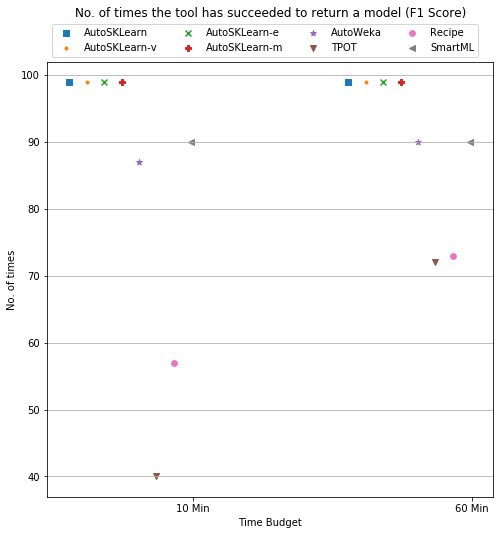

In [34]:
sheet_path = r'C:\Users\HassanEldeeb\Documents\GitHub\AutoMLBenchmarking\AutoML Benchmarking Results.xlsx'
result = pd.read_excel(sheet_path, null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
              sheet_name=['10 Min - F1 Score', '60 Min - F1 Score'])
#result[experiment_time[0]].head(10)
experiment_time = ['10 Min - F1 Score', '60 Min - F1 Score']
experiment_time1 = ['10 Min', '60 Min']
frameworks = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m','AutoWeka', 'TPOT', 'Recipe', 'SmartML']
autoSKLearn = [np.sum(result[experiment_time[0]].AutoSkLearn> 0),
            np.sum(result[experiment_time[1]].AutoSkLearn> 0)]
autoSKLearn_v = [np.sum(result[experiment_time[0]].loc[:,'AutoSkLearn - Vanilla']> 0),
            np.sum(result[experiment_time[1]].loc[:, 'AutoSkLearn - Vanilla']> 0)]
autoSKLearn_e = [np.sum(result[experiment_time[0]].loc[:, 'AutoSkLearn - Vanilla + Ensembling']> 0),
            np.sum(result[experiment_time[1]].loc[:, 'AutoSkLearn - Vanilla + Ensembling']> 0)]
autoSKLearn_m = [np.sum(result[experiment_time[0]].loc[:, 'AutoSkLearn - Vanilla + MetaLearning']> 0),
            np.sum(result[experiment_time[1]].loc[:, 'AutoSkLearn - Vanilla + MetaLearning']> 0)]
autoweka = [np.sum(result[experiment_time[0]].AutoWeka> 0),
            np.sum(result[experiment_time[1]].AutoWeka> 0)]
TPOT = [np.sum(result[experiment_time[0]].TPot> 0),
            np.sum(result[experiment_time[1]].TPot> 0)]
Recipe = [np.sum(result[experiment_time[0]].Receipe> 0),
            np.sum(result[experiment_time[1]].Receipe> 0)]
SmartML = [np.sum(result[experiment_time[0]].SmartML> 0),
            np.sum(result[experiment_time[1]].SmartML> 0)]
numerical = [autoSKLearn,
             autoSKLearn_v,
             autoSKLearn_e,
             autoSKLearn_m,
             autoweka,
             TPOT,
             Recipe,
             SmartML]
#rint(np.sum(result['10 Min'].autoweka_accuracy_mean > 0))
#rint((result['10 Min'].autoweka_accuracy_mean > 0).to_string())
number_groups = len(frameworks) 
markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'd'])
bin_width = 1.0/(len(frameworks)+8)
fig, ax = plt.subplots(figsize=(8,8))
for i in range(number_groups):
    ax.scatter(x=np.arange(len(experiment_time)) + i*bin_width, 
           y=numerical[i],
           #color= next(gray_colors),
           marker =next(markers))
ax.set_xticks(np.arange(len(experiment_time)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(experiment_time1)
l = ax.legend(frameworks[0:len(frameworks)], ncol=len(frameworks)//2, bbox_to_anchor=(0, 1), loc='lower left')
ax.set(xlabel='Time Budget', ylabel='No. of times')
ax.yaxis.grid() # horizontal lines
plt.title(label = 'No. of times the tool has succeeded to return a model (F1 Score)', pad = 45)
plt.show()

# How many times each tool has been the best performance? (F1 Score)

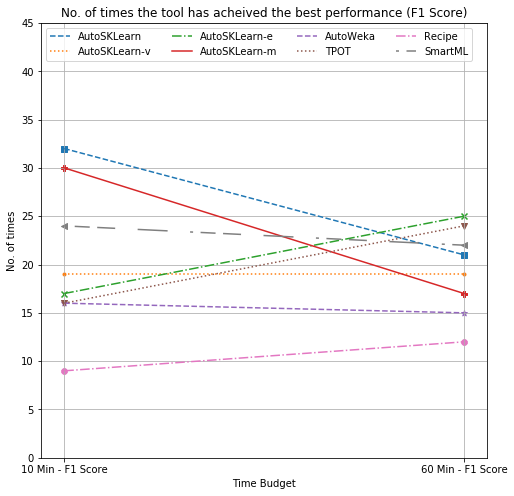

In [35]:
types= ['AutoSkLearn', 'AutoSkLearn - Vanilla', 'AutoSkLearn - Vanilla + Ensembling',
         'AutoSkLearn - Vanilla + MetaLearning', 'AutoWeka', 'TPot', 'Receipe', 'SmartML']
labels = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m','AutoWeka', 'TPOT', 'Recipe', 'SmartML', 'ATM']
T=[]
for t in experiment_time:
    total = [0,0,0,0,0,0,0,0]
    for i in range(100):
        #my_list = [result['30 Min'].smartml_valid_acc[i],result['30 Min'].sklearn_accuracy_mean[i]]
        my_list= [result[t][x][i] for x in types]
        #print(my_list)
        my_list = [0 if np.isnan(x) else x for x in my_list]
        max_value = max(my_list)
        #print(max_value,my_list)
        indices = [i for i, x in enumerate(my_list) if max_value-x<0.00001]
        for ind in indices:
            total[ind]+=1
    T.append(list(total))
#print(T)

t = experiment_time
s=[]
for u in range(len(types)):
    s.append(list([T[i][u]for i in range(len(experiment_time))]))
#print(s)
fig, ax = plt.subplots(figsize=(8,8))
#ax.plot(t, s[0],linestyle='-',label=labels[0])
style = ['--', ':', '-.', '-', '--', ':', '-.', '-']
markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'd'])
for i in range(len(types)-1):
    ax.plot(t, s[i],linestyle=style[i],label=labels[i])
    ax.scatter(x=np.arange(len(experiment_time)), 
           y=s[i],
           #color= next(gray_colors),
           marker =next(markers))

line1, = ax.plot(t, s[7],linestyle='-',label=labels[7])
line1.set_dashes([2, 5, 10, 5, 12, 15, 20, 15])
ax.scatter(x=np.arange(len(experiment_time)), 
           y=s[7],
           #color= next(gray_colors),
           marker =next(markers))
ax.set(xlabel='Time Budget', ylabel='No. of times',title='No. of times the tool has acheived the best performance (F1 Score)')
ax.grid()
#plt.xlim([-3, 3])
plt.ylim([0, 45])
plt.legend(loc='upper left', ncol=4, bbox_to_anchor=(0, 1))
plt.show()

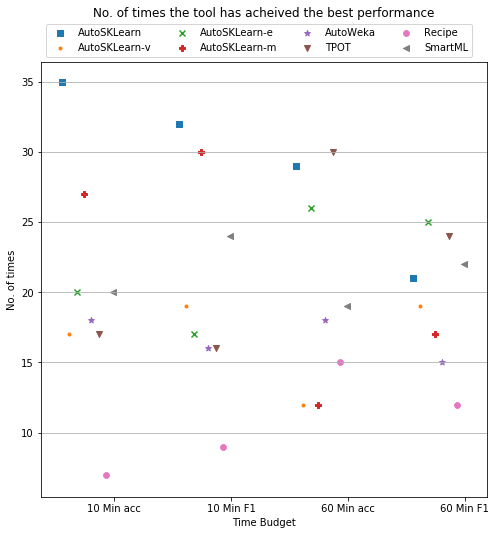

In [36]:
types= ['AutoSkLearn', 'AutoSkLearn - Vanilla', 'AutoSkLearn - Vanilla + Ensembling',
         'AutoSkLearn - Vanilla + MetaLearning', 'AutoWeka', 'TPot', 'Receipe', 'SmartML']
labels = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m','AutoWeka', 'TPOT', 'Recipe', 'SmartML']
T=[]
for t in experiment_time:
    total = [0,0,0,0,0,0,0,0]
    for i in range(100):
        #my_list = [result['30 Min'].smartml_valid_acc[i],result['30 Min'].sklearn_accuracy_mean[i]]
        my_list= [result[t][x][i] for x in types]
        #print(my_list)
        my_list = [0 if np.isnan(x) else x for x in my_list]
        max_value = max(my_list)
        #print(max_value,my_list)
        indices = [i for i, x in enumerate(my_list) if max_value-x<0.00001]
        for ind in indices:
            total[ind]+=1
    T.append(list(total))
#print(T)

t = experiment_time
s=[]
for u in range(len(types)):
    s.append(list([T[i][u]for i in range(len(experiment_time))]))


sheet_path = r'C:\Users\HassanEldeeb\Documents\GitHub\AutoMLBenchmarking\Complete_Sheet.xlsx'
result_acc = pd.read_excel(sheet_path, null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n','0', '0.0', 'None'],
              sheet_name=['10 Min',  '60 Min'])

types=[ "sklearn_accuracy_mean", "sklearn_v_accuracy_mean", "sklearn_e_accuracy_mean", "sklearn_m_accuracy_mean",
       "autoweka_accuracy_mean", "tpot_accuracy_mean", "recipe_test_acc", "smartml_valid_acc"]
T=[]
for t in ['10 Min',  '60 Min']:
    total = [0,0,0,0,0,0,0,0]
    for i in range(100):
        #my_list = [result_acc['30 Min'].smartml_valid_acc[i],result['30 Min'].sklearn_accuracy_mean[i]]
        my_list= [result_acc[t][x][i] for x in types]
        #print(my_list)
        my_list = [0 if np.isnan(x) else x for x in my_list]
        max_value = max(my_list)
        #print(max_value,my_list)
        indices = [i for i, x in enumerate(my_list) if max_value-x<0.00001]
        for ind in indices:
            total[ind]+=1
    T.append(list(total))
#print(T)

t = experiment_time
s_acc=[]
for u in range(len(types)):
    s_acc.append(list([T[i][u]for i in range(len(experiment_time))]))

numerical = []
for i in range(8):
    n = []
    for (f, a) in zip(s[i], s_acc[i]):
        n.append(a)
        n.append(f)
    numerical.append(n)

number_groups = len(frameworks) 
markers = itertools.cycle(['s','.', 'x', 'P', '*', 'v', '8', '<', 'd'])
bin_width = 1.0/(len(frameworks)+8)
fig, ax = plt.subplots(figsize=(8,8))
for i in range(number_groups):
    ax.scatter(x=np.arange(4) + i*bin_width, 
           y=numerical[i],
           #color= next(gray_colors),
           marker =next(markers))
ax.set_xticks(np.arange(4) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(['10 Min acc', '10 Min F1', '60 Min acc', '60 Min F1'])
l = ax.legend(frameworks[0:len(frameworks)], ncol=len(frameworks)//2, bbox_to_anchor=(0, 1), loc='lower left')
ax.set(xlabel='Time Budget', ylabel='No. of times')
ax.yaxis.grid() # horizontal lines
plt.title(label = 'No. of times the tool has acheived the best performance', pad = 45)
plt.show()

# How much is the performance gain increase by increasing time budget? (F1 Score)

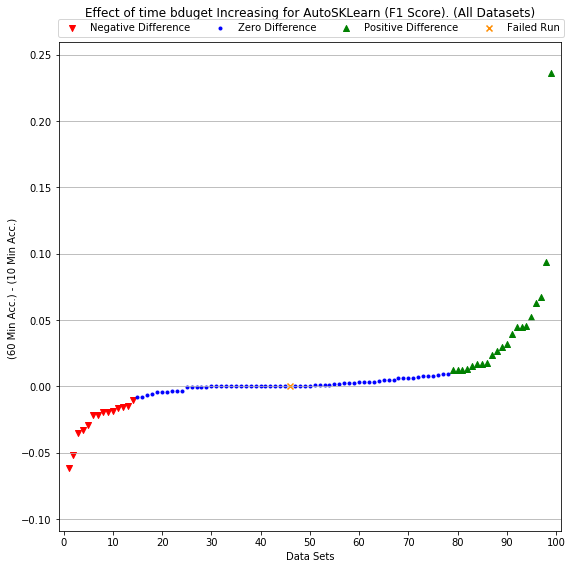

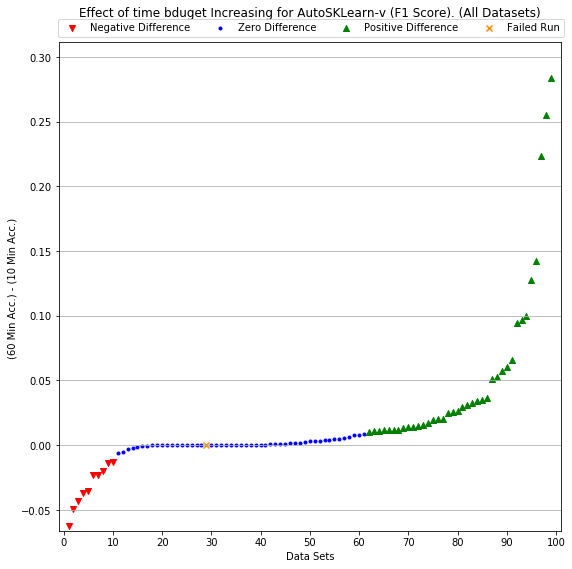

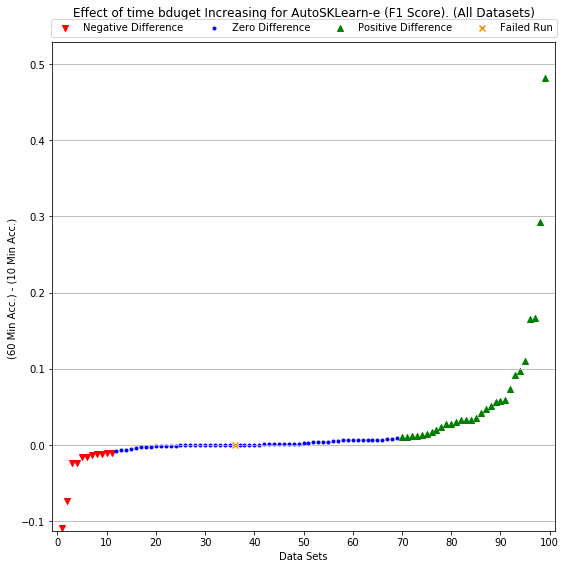

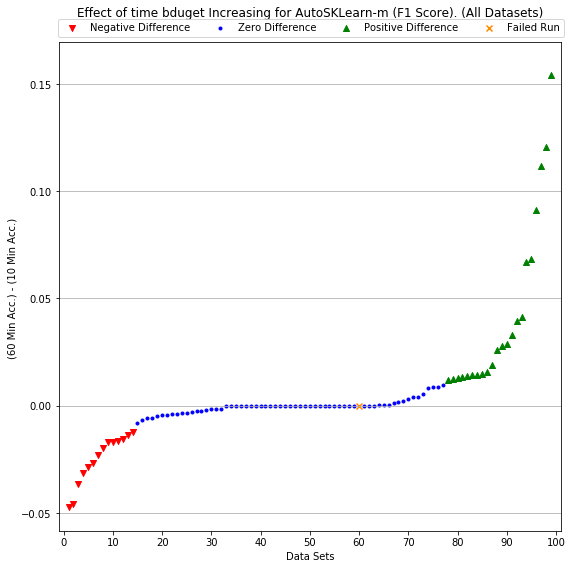

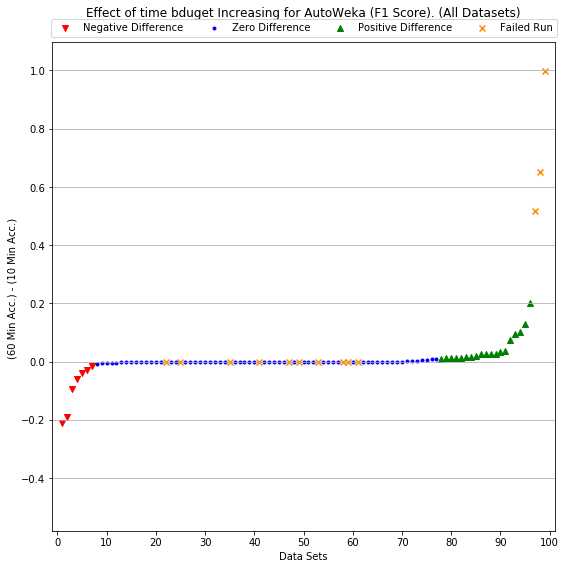

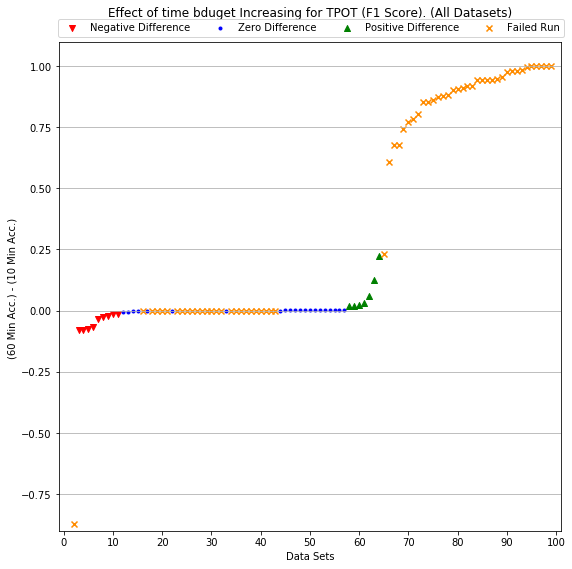

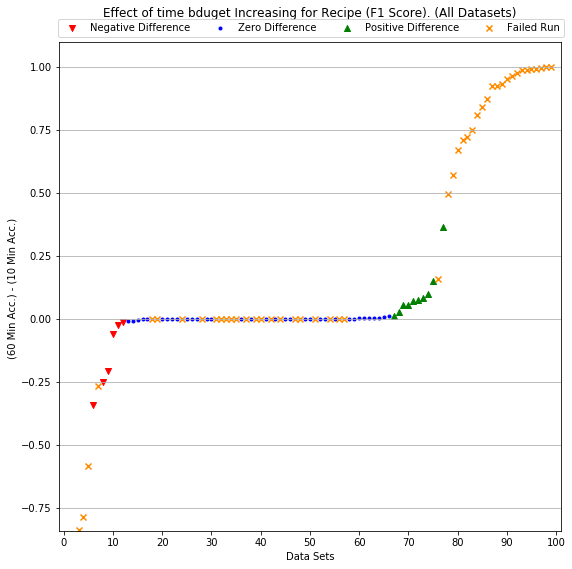

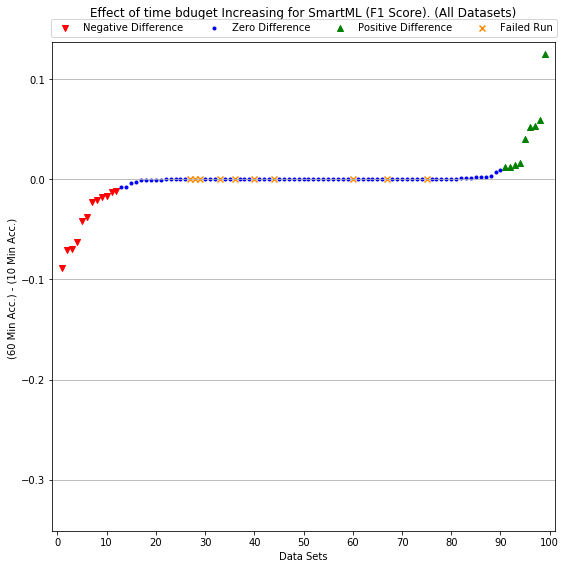

In [37]:
x_label = 'Data Sets'
tools = ['AutoSKLearn', 'AutoSKLearn-v', 'AutoSKLearn-e', 'AutoSKLearn-m', 'AutoWeka', 'TPOT', 'Recipe', 'SmartML']
acc = ['AutoSkLearn', 'AutoSkLearn - Vanilla', 'AutoSkLearn - Vanilla + Ensembling',
         'AutoSkLearn - Vanilla + MetaLearning', 'AutoWeka', 'TPot', 'Receipe', 'SmartML']
t =  ['10 Min - F1 Score', '60 Min - F1 Score']
t1 =  ['10 Min', '60 Min']
sheet_path = r'C:\Users\HassanEldeeb\Documents\GitHub\AutoMLBenchmarking\AutoML Benchmarking Results.xlsx'
for tool, acc in zip(tools,acc):
    for i in range(1, len(t)):
        for j in range(i):
            fig = Figure(sheet_path, sheet_names=t)
            first = fig.get_sheet()[t[i]].loc[:, acc]
            second = fig.get_sheet()[t[j]].loc[:, acc]
            y_lable = '(' + t1[i] + ' Acc.) - (' + t1[j] + ' Acc.) '
            title = 'Effect of time bduget Increasing for '+ tool +' (F1 Score).'
            fig=Figure()
            fig.compare_acc_scatter(first, second, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=None)

# How many times Meta-learning improved the performance and what is the average improvement in AutoSKLearn? (F1 Score)

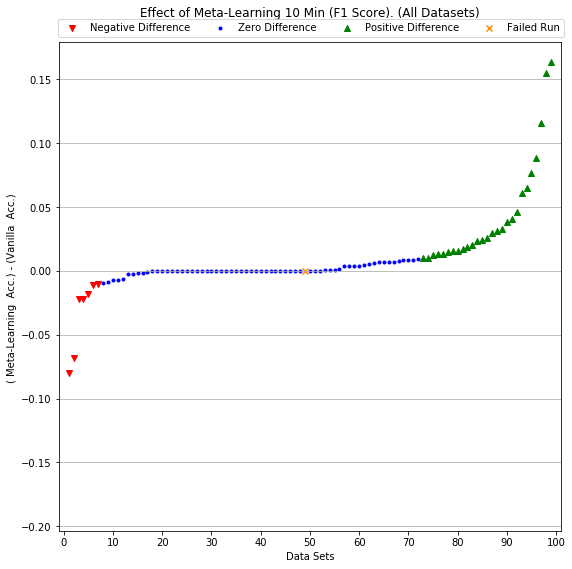

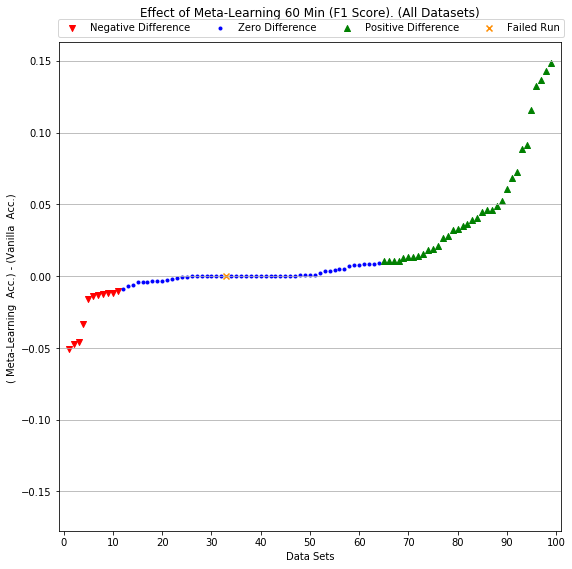

In [38]:
for i in range(len(t)):
    fig = Figure(sheet_path, sheet_names=t)
    meta = fig.get_sheet()[t[i]].loc[:, 'AutoSkLearn - Vanilla + MetaLearning']
    vanilla = fig.get_sheet()[t[j]].loc[:, 'AutoSkLearn - Vanilla']
    y_lable = '( Meta-Learning  Acc.) - (Vanilla  Acc.) '
    title = 'Effect of Meta-Learning '+ t1[i] +' (F1 Score).'
    fig = Figure()
    fig.compare_acc_scatter(meta, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=None)

# How many times Esembling improved the performance and what is the average improvement in AutoSKLearn? (F1 Score)

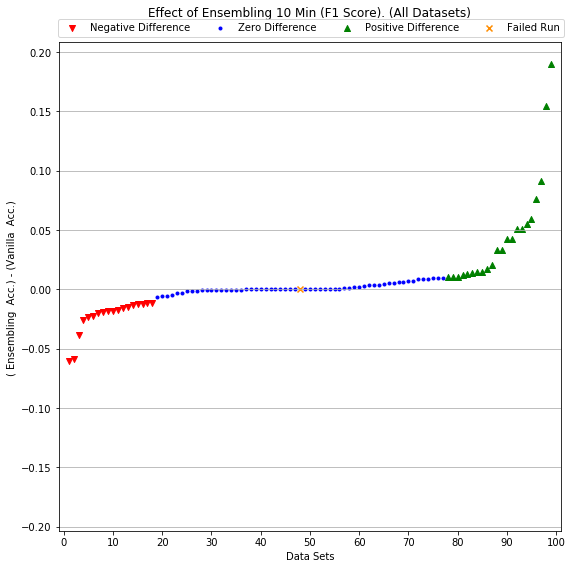

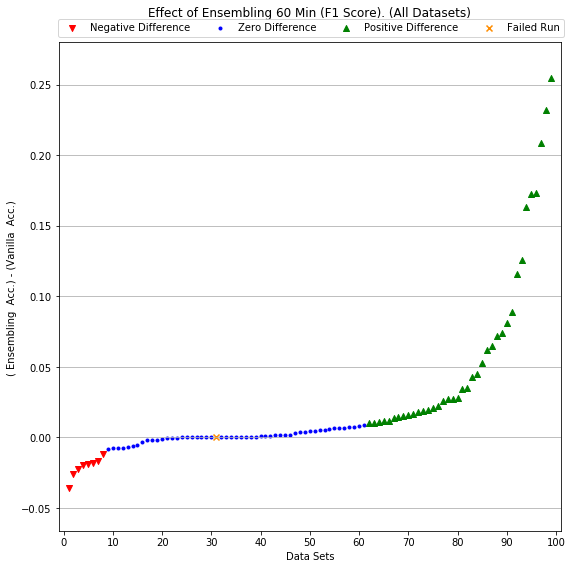

In [39]:
for i in range(len(t)):
    fig = Figure(sheet_path, sheet_names=t)
    ensembling = fig.get_sheet()[t[i]].loc[:, 'AutoSkLearn - Vanilla + Ensembling']
    vanilla = fig.get_sheet()[t[j]].loc[:, 'AutoSkLearn - Vanilla']
    y_lable = '( Ensembling  Acc.) - (Vanilla  Acc.) '
    title = 'Effect of Ensembling '+ t1[i] +' (F1 Score).'
    fig=Figure()
    fig.compare_acc_scatter(ensembling, vanilla, x_label, y_lable, title, fig_size=(9,9), legend_x_shift=-0.012, y_limit=None)